In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files
import time
import urllib.request  
import requests # library to handle requests

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

!pip -q install geocoder
import geocoder

from bs4 import BeautifulSoup

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [12]:
listBiggest = urllib.request.urlopen("https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland")
listBiggest_bytes = listBiggest.read()

listBiggest_bytes_htmlAll = listBiggest_bytes.decode("utf8")

#Using a Version, without References
listBiggest_bytes_htmlAll = '<!DOCTYPE html>\n<html class="client-nojs" lang="de" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Liste der Großstädte in Deutschland – Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Liste_der_Großstädte_in_Deutschland","wgTitle":"Liste der Großstädte in Deutschland","wgCurRevisionId":193834955,"wgRevisionId":193256407,"wgArticleId":74802,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Informative Liste","Liste (Gemeinden in Deutschland)","Liste (Städte nach Staat)"],"wgBreakFrames":!1,"wgPageContentLanguage":"de","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\\t.",".\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Januar","Februar","März","April","Mai","Juni","Juli","August","September","Oktober","November","Dezember"],"wgMonthNamesShort":["","Jan.","Feb.","Mär.","Apr.","Mai","Jun.","Jul.","Aug.","Sep.","Okt.","Nov.","Dez."],"wgRelevantPageName":\n"Liste_der_Großstädte_in_Deutschland","wgRelevantArticleId":74802,"wgRequestId":"XcPi1gpAIC8AALlbQd4AAABH","wgCSPNonce":!1,"wgIsProbablyEditable":!0,"wgRelevantPageIsProbablyEditable":!0,"wgRestrictionEdit":[],"wgRestrictionMove":[],"wgFlaggedRevsParams":{"tags":{"accuracy":{"levels":1,"quality":2,"pristine":4}}},"wgStableRevisionId":193256407,"wgMediaViewerOnClick":!0,"wgMediaViewerEnabledByDefault":!0,"wgPopupsReferencePreviews":!1,"wgPopupsConflictsWithNavPopupGadget":!1,"wgVisualEditor":{"pageLanguageCode":"de","pageLanguageDir":"ltr","pageVariantFallbacks":"de"},"wgMFDisplayWikibaseDescriptions":{"search":!0,"nearby":!0,"watchlist":!0,"tagline":!0},"wgWMESchemaEditAttemptStepOversample":!1,"wgULSCurrentAutonym":"Deutsch","wgNoticeProject":"wikipedia","wgWikibaseItemId":"Q4242225","wgCentralAuthMobileDomain":!1,"wgEditSubmitButtonLabelPublish":!0,"wgFlaggedRevsEditLatestRevision":!0};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":\n"ready","noscript":"ready","user.styles":"ready","ext.globalCssJs.user":"ready","user":"ready","user.options":"loading","user.tokens":"loading","ext.flaggedRevs.icons":"ready","oojs-ui-core.styles":"ready","oojs-ui.styles.indicators":"ready","mediawiki.widgets.styles":"ready","oojs-ui-core.icons":"ready","ext.cite.styles":"ready","mediawiki.legacy.shared":"ready","mediawiki.legacy.commonPrint":"ready","jquery.tablesorter.styles":"ready","mediawiki.toc.styles":"ready","wikibase.client.init":"ready","ext.flaggedRevs.basic":"ready","ext.visualEditor.desktopArticleTarget.noscript":"ready","ext.uls.interlanguage":"ready","ext.wikimediaBadges":"ready","ext.3d.styles":"ready","mediawiki.skinning.interface":"ready","skins.vector.styles":"ready"};RLPAGEMODULES=["ext.cite.ux-enhancements","site","mediawiki.page.startup","mediawiki.page.ready","jquery.tablesorter","mediawiki.toc","mediawiki.searchSuggest","ext.flaggedRevs.advanced","ext.gadget.editMenus","ext.gadget.WikiMiniAtlas",\n"ext.gadget.OpenStreetMap","ext.gadget.CommonsDirekt","ext.centralauth.centralautologin","mmv.head","mmv.bootstrap.autostart","ext.popups","ext.visualEditor.desktopArticleTarget.init","ext.visualEditor.targetLoader","ext.eventLogging","ext.wikimediaEvents","ext.navigationTiming","ext.uls.compactlinks","ext.uls.interface","ext.cx.eventlogging.campaigns","ext.quicksurveys.init","ext.centralNotice.geoIP","ext.centralNotice.startUp","skins.vector.js"];</script>\n<script>(RLQ=window.RLQ||[]).push(function(){mw.loader.implement("user.options@1wzrr",function($,jQuery,require,module){/*@nomin*/mw.user.options.set({"variant":"de"});\n});mw.loader.implement("user.tokens@tffin",function($,jQuery,require,module){/*@nomin*/mw.user.tokens.set({"patrolToken":"+\\\\","watchToken":"+\\\\","csrfToken":"+\\\\"});\n});});</script>\n<link rel="stylesheet" href="/w/load.php?lang=de&amp;modules=ext.3d.styles%7Cext.cite.styles%7Cext.flaggedRevs.basic%2Cicons%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cjquery.tablesorter.styles%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.skinning.interface%7Cmediawiki.toc.styles%7Cmediawiki.widgets.styles%7Coojs-ui-core.icons%2Cstyles%7Coojs-ui.styles.indicators%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector"/>\n<script async="" src="/w/load.php?lang=de&amp;modules=startup&amp;only=scripts&amp;raw=1&amp;skin=vector"></script>\n<meta name="ResourceLoaderDynamicStyles" content=""/>\n<link rel="stylesheet" href="/w/load.php?lang=de&amp;modules=site.styles&amp;only=styles&amp;skin=vector"/>\n<meta name="generator" content="MediaWiki 1.35.0-wmf.4"/>\n<meta name="referrer" content="origin"/>\n<meta name="referrer" content="origin-when-crossorigin"/>\n<meta name="referrer" content="origin-when-cross-origin"/>\n<meta property="og:image" content="https://upload.wikimedia.org/wikipedia/commons/b/ba/Gro%C3%9Fst%C3%A4dte_historisch.png"/>\n<link rel="alternate" href="android-app://org.wikipedia/http/de.m.wikipedia.org/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland"/>\n<link rel="alternate" type="application/x-wiki" title="Seite bearbeiten" href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit"/>\n<link rel="edit" title="Seite bearbeiten" href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit"/>\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png"/>\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico"/>\n<link rel="search" type="application/opensearchdescription+xml" href="/w/opensearch_desc.php" title="Wikipedia (de)"/>\n<link rel="EditURI" type="application/rsd+xml" href="//de.wikipedia.org/w/api.php?action=rsd"/>\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/"/>\n<link rel="canonical" href="https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland"/>\n<link rel="dns-prefetch" href="//login.wikimedia.org"/>\n<link rel="dns-prefetch" href="//meta.wikimedia.org" />\n<!--[if lt IE 9]><script src="/w/resources/lib/html5shiv/html5shiv.js"></script><![endif]-->\n</head>\n<body class="mediawiki ltr sitedir-ltr capitalize-all-nouns mw-hide-empty-elt ns-0 ns-subject mw-editable page-Liste_der_Großstädte_in_Deutschland rootpage-Liste_der_Großstädte_in_Deutschland skin-vector action-view">\n<div id="mw-page-base" class="noprint"></div>\n<div id="mw-head-base" class="noprint"></div>\n<div id="content" class="mw-body" role="main">\n\t<a id="top"></a>\n\t<div id="siteNotice" class="mw-body-content"><!-- CentralNotice --></div>\n\t<div class="mw-indicators mw-body-content">\n<div id="mw-indicator-topicon-Vorlage_Informativ" class="mw-indicator"><div class="noprint"><a href="#Vorlage_Informativ" title="Diese Seite wurde als informative Liste oder Portal ausgezeichnet."><img alt="Diese Seite wurde als informative Liste oder Portal ausgezeichnet." src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/15px-Qsicon_informativ.svg.png" decoding="async" width="15" height="15" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/23px-Qsicon_informativ.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/30px-Qsicon_informativ.svg.png 2x" data-file-width="24" data-file-height="24" /></a></div></div>\n</div>\n\n\t<h1 id="firstHeading" class="firstHeading" lang="de">Liste der Großstädte in Deutschland</h1>\n\t\n\t<div id="bodyContent" class="mw-body-content">\n\t\t<div id="siteSub" class="noprint">aus Wikipedia, der freien Enzyklop&auml;die</div>\n\t\t<div id="contentSub"><div id="mw-fr-revisiontag" class="flaggedrevs_short flaggedrevs_stable_notsynced plainlinks noprint"><div class="flaggedrevs_short_basic"><span aria-disabled=\'false\' title=\'Dies ist eine gesichtete Version dieser Seite\' class=\'flaggedrevs-icon oo-ui-widget oo-ui-widget-enabled oo-ui-iconElement-icon oo-ui-icon-eye oo-ui-iconElement oo-ui-labelElement-invisible oo-ui-iconWidget\'></span><span id=\'mw-fr-revisiontoggle\' aria-disabled=\'false\' title=\'Details zeigen/verstecken\' class=\'fr-toggle-arrow oo-ui-widget oo-ui-widget-enabled oo-ui-indicatorElement-indicator oo-ui-indicator-down oo-ui-indicatorElement oo-ui-labelElement-invisible oo-ui-indicatorWidget\'></span></div>\n<div id="mw-fr-revisiondetails-wrapper" style="position:relative;"><div id="mw-fr-revisiondetails" class="flaggedrevs_short_details" style="display:none">Dies ist die <a href="/wiki/Hilfe:Gesichtete_Versionen" title="Hilfe:Gesichtete Versionen">gesichtete Version</a>, die am <i>19. Oktober 2019</i> <a class="external text" href="https://de.wikipedia.org/w/index.php?title=Spezial:Logbuch&amp;type=review&amp;page=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland">markiert</a> wurde.\nEs gibt <a class="external text" href="https://de.wikipedia.org/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;oldid=193256407&amp;diff=cur">1 ausstehende Änderung</a>, die noch gesichtet werden muss.</div>\n</div>\n</div>\n</div>\n\t\t\n\t\t\n\t\t\n\t\t<div id="jump-to-nav"></div>\n\t\t<a class="mw-jump-link" href="#mw-head">Zur Navigation springen</a>\n\t\t<a class="mw-jump-link" href="#p-search">Zur Suche springen</a>\n\t\t<div id="mw-content-text" lang="de" dir="ltr" class="mw-content-ltr"><div class="mw-parser-output"><p>Diese <b>Liste der Großstädte in Deutschland</b> bietet einen Überblick über alle aktuellen und ehemaligen <a href="/wiki/Gro%C3%9Fstadt" title="Großstadt">Großstädte</a> in <a href="/wiki/Deutschland" title="Deutschland">Deutschland</a>.\n</p><p>Großstädte sind nach einer Begriffsbestimmung der Internationalen Statistikkonferenz von 1887 alle Städte mit mehr als 100.000 Einwohnern. Indes <a href="/wiki/Liste_der_gr%C3%B6%C3%9Ften_deutschen_St%C3%A4dte#Die_größten_deutschen_Städte_1880" title="Liste der größten deutschen Städte">erfüllten z.&#160;B. im Jahr 1880 nur zehn</a> heute im Gebiet der Bundesrepublik Deutschland liegende Städte dieses Kriterium, was andeutet, dass es sich früher um einen deutlich exklusiveren „Titel“ gehandelt hat. Eine Sonderstellung neben den Großstädten nehmen die <a href="/wiki/Metropolregion#In_Deutschland" title="Metropolregion">deutschen Metropolregionen</a> ein, bzw. die <a href="/wiki/Regiopole" title="Regiopole">Regiopolen</a> in einem regionalen Kontext.\n</p><p>Seit 2018 gibt es in Deutschland 81 Großstädte, von denen 30 (entspricht 37&#160;%) in <a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a> liegen, 9 (11&#160;%) in <a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>, je 8 (10&#160;%) in <a href="/wiki/Bayern" title="Bayern">Bayern</a> und <a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>, 5 in <a href="/wiki/Hessen" title="Hessen">Hessen</a>, 4 in <a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a> und 3 in <a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>, ansonsten je Bundesland nur 2 oder 1. \n</p><p>Vier der deutschen Großstädte sind <a href="/wiki/Millionenstadt" title="Millionenstadt">Millionenstädte</a>, weitere elf haben rund eine halbe Million Einwohner oder mehr. Die hohe Anzahl an Halbmillionenstädten ist im Vergleich zu anderen einwohnerreichen Ländern der Europäischen Union auffällig. Die fünftgrößte Stadt hat etwa eine Dreiviertelmillion Einwohner, zehn Städte (Rang 6 bis 15) haben Einwohnerzahlen zwischen 635.000 und 495.000. Mit deutlichem Abstand folgen die nächstkleineren Großstädte mit weniger als 370.000 Einwohnern. Rund die Hälfte der deutschen Großstädte haben weniger als 200.000 Einwohner. Die 15 Städte mit aktuell mehr als 495.000 Einwohnern waren bereits in jedem Jahr seit 1960 die 15 Städte mit mehr als 425.000 Einwohnern.\n</p>\n<div class="thumb tright"><div class="thumbinner" style="width:352px;"><a href="/wiki/Datei:Gro%C3%9Fst%C3%A4dte_historisch.png" class="image"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Gro%C3%9Fst%C3%A4dte_historisch.png/350px-Gro%C3%9Fst%C3%A4dte_historisch.png" decoding="async" width="350" height="462" class="thumbimage" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Gro%C3%9Fst%C3%A4dte_historisch.png/525px-Gro%C3%9Fst%C3%A4dte_historisch.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Gro%C3%9Fst%C3%A4dte_historisch.png/700px-Gro%C3%9Fst%C3%A4dte_historisch.png 2x" data-file-width="756" data-file-height="998" /></a>  <div class="thumbcaption"><div class="magnify"><a href="/wiki/Datei:Gro%C3%9Fst%C3%A4dte_historisch.png" class="internal" title="vergrößern und Informationen zum Bild anzeigen"></a></div>Historische Entwicklung</div></div></div>\n<p>In der Übersicht der „ehemaligen Großstädte“ sind die Städte aufgeführt, die früher einmal mehr als 100.000 Einwohner hatten, darunter auch Städte, die inzwischen in benachbarte Großstädte eingegliedert wurden. Weitere Übersichten enthalten Großstädte, die vom 18. Januar 1871, der Gründung des <a href="/wiki/Deutsches_Reich" title="Deutsches Reich">Deutschen Reiches</a>, bis zum 31. August 1939, einen Tag vor Beginn des <a href="/wiki/Zweiter_Weltkrieg" title="Zweiter Weltkrieg">Zweiten Weltkrieges</a>, nach dem jeweiligen <a href="/wiki/Gebietsstand" title="Gebietsstand">Gebietsstand</a> des Reiches zu Deutschland gehörten.\n</p>\n<div id="toc" class="toc"><input type="checkbox" role="button" id="toctogglecheckbox" class="toctogglecheckbox" style="display:none" /><div class="toctitle" lang="de" dir="ltr"><h2>Inhaltsverzeichnis</h2><span class="toctogglespan"><label class="toctogglelabel" for="toctogglecheckbox"></label></span></div>\n<ul>\n<li class="toclevel-1 tocsection-1"><a href="#Aktuelle_Großstädte"><span class="tocnumber">1</span> <span class="toctext">Aktuelle Großstädte</span></a>\n<ul>\n<li class="toclevel-2 tocsection-2"><a href="#Vorbemerkungen"><span class="tocnumber">1.1</span> <span class="toctext">Vorbemerkungen</span></a></li>\n<li class="toclevel-2 tocsection-3"><a href="#Tabelle"><span class="tocnumber">1.2</span> <span class="toctext">Tabelle</span></a></li>\n</ul>\n</li>\n<li class="toclevel-1 tocsection-4"><a href="#Ehemalige_Großstädte"><span class="tocnumber">2</span> <span class="toctext">Ehemalige Großstädte</span></a>\n<ul>\n<li class="toclevel-2 tocsection-5"><a href="#Heutige_Mittelstädte"><span class="tocnumber">2.1</span> <span class="toctext">Heutige Mittelstädte</span></a></li>\n<li class="toclevel-2 tocsection-6"><a href="#Weitere_ehemalige_Großstädte"><span class="tocnumber">2.2</span> <span class="toctext">Weitere ehemalige Großstädte</span></a></li>\n</ul>\n</li>\n<li class="toclevel-1 tocsection-7"><a href="#Großstädte,_die_früher_zu_Deutschland_gehörten"><span class="tocnumber">3</span> <span class="toctext">Großstädte, die früher zu Deutschland gehörten</span></a>\n<ul>\n<li class="toclevel-2 tocsection-8"><a href="#Von_1871_bis_1937"><span class="tocnumber">3.1</span> <span class="toctext">Von 1871 bis 1937</span></a></li>\n<li class="toclevel-2 tocsection-9"><a href="#Vom_12._März_1938_bis_31._August_1939_dazu_gekommen"><span class="tocnumber">3.2</span> <span class="toctext">Vom 12. März 1938 bis 31. August 1939 dazu gekommen</span></a></li>\n</ul>\n</li>\n<li class="toclevel-1 tocsection-10"><a href="#Siehe_auch"><span class="tocnumber">4</span> <span class="toctext">Siehe auch</span></a></li>\n<li class="toclevel-1 tocsection-11"><a href="#Literatur"><span class="tocnumber">5</span> <span class="toctext">Literatur</span></a></li>\n<li class="toclevel-1 tocsection-12"><a href="#Weblinks"><span class="tocnumber">6</span> <span class="toctext">Weblinks</span></a></li>\n<li class="toclevel-1 tocsection-13"><a href="#Einzelnachweise"><span class="tocnumber">7</span> <span class="toctext">Einzelnachweise</span></a></li>\n</ul>\n</div>\n\n<h2><span id="Aktuelle_Gro.C3.9Fst.C3.A4dte"></span><span class="mw-headline" id="Aktuelle_Großstädte">Aktuelle Großstädte</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=1" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Aktuelle Großstädte">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=1" title="Abschnitt bearbeiten: Aktuelle Großstädte">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<h3><span class="mw-headline" id="Vorbemerkungen">Vorbemerkungen</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=2" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Vorbemerkungen">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=2" title="Abschnitt bearbeiten: Vorbemerkungen">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<p>Die Tabelle enthält alle Städte, die am Ende des Jahres 2018 mehr als 100.000 Einwohner hatten, außerdem die Ergebnisse der Volkszählungen von 1939 und 1950, die Ergebnisse der Fortschreibung der <a href="/wiki/Einwohnerzahl#Amtliche_Einwohnerzahl" title="Einwohnerzahl">amtlichen Einwohnerzahlen</a> durch die <a href="/wiki/Statistisches_Landesamt" title="Statistisches Landesamt">Statistischen Landesämter</a> (nur <a href="/wiki/Wohnsitz_(Deutschland)#Haupt-_und_Zweitwohnsitz" title="Wohnsitz (Deutschland)">Hauptwohnsitze</a>) der Jahre 1960, 1970, 1980, 1990, 2000, 2010 und 2017 (jeweils 31. Dezember), sowie die Fläche und die <a href="/wiki/Bev%C3%B6lkerungsdichte" title="Bevölkerungsdichte">Bevölkerungsdichte</a> (Stand 2018).\n</p><p>Aufgeführt sind auch die <a href="/wiki/Bev%C3%B6lkerungsentwicklung" title="Bevölkerungsentwicklung">Bevölkerungsentwicklung</a> zwischen 2017 und 2018, das <a href="/wiki/Land_(Deutschland)" title="Land (Deutschland)">Land</a>, zu dem die Stadt gehört, und das Jahr der erstmaligen Überschreitung der Grenze von 100.000 Einwohnern. Zahlreiche Städte unterschritten seitdem diese Grenze zeitweise und verloren somit den Status als Großstadt vorübergehend. Diese sind gesondert mit <span class="reference"></span> gekennzeichnet. Die Einwohnerzahlen beziehen sich auf den jeweils gültigen Gebietsstand der Gemeinde ohne die politisch selbstständigen Vororte.\n</p><p>Durch <a href="/wiki/Gebietsreform" title="Gebietsreform">Gebietsreformen</a> verursachte Veränderungen von Raum und Bevölkerung führen bei Zeitreihen zum Bevölkerungswachstum zu unterschiedlichen Ergebnissen, wenn die Daten der zurückliegenden Jahre zum jeweiligen oder aktuellen Gebietsstand berechnet werden. Bei Berücksichtigung des jeweiligen Gebietsstandes hatte Potsdam aufgrund der <a href="/wiki/Eingemeindung" title="Eingemeindung">Eingemeindungen</a> im Jahr 2003 zwischen 2000 und 2010 unter den deutschen Großstädten mit 1,95&#160;% das höchste jährliche Bevölkerungswachstum, gefolgt von München (1,12&#160;%), Dresden (0,91&#160;%), Freiburg im Breisgau (0,89&#160;%) und Mainz (0,86&#160;%). Wird dagegen der Gebietsstand von 2010 als Grundlage genommen, lag München im gleichen Zeitraum mit einem jährlichen Wachstum von 1,12&#160;% auf dem ersten Rang. Auf den Plätzen folgen Potsdam (1,10&#160;%),<sup id="cite_ref-1" class="reference"><a href="#cite_note-1">&#91;1&#93;</a></sup>\nDresden (0,91&#160;%), Freiburg im Breisgau (0,89&#160;%) und Mainz (0,86&#160;%).\n</p><p>Seit etwa 2010 zieht das Bevölkerungswachstum der Großstädte durch Zuwanderung insgesamt merklich an, sodass ihre Gewinne auch 2013, 2014 und 2015 zu einer steigenden Gesamtbevölkerungszahl in der Bundesrepublik führten. Besonders die <a href="/wiki/Metropole" title="Metropole">Metropolen</a> mit über 500.000 Einwohnern wuchsen kräftig, aber auch kleinere Großstädte konnten profitieren. 2015 war das erste Jahr seit langer Zeit, in dem sämtliche Großstädte Bevölkerungszuwächse verbuchen konnten.\n</p><p>Es gibt 13 Großstädte in Deutschland, die einem Landkreis oder einem <a href="/wiki/Kommunalverband_besonderer_Art" title="Kommunalverband besonderer Art">Kommunalverband besonderer Art</a> angehören. Diese sind:\n</p>\n<ul><li><a href="/wiki/Aachen" title="Aachen">Aachen</a></li>\n<li><a href="/wiki/Bergisch_Gladbach" title="Bergisch Gladbach">Bergisch Gladbach</a></li>\n<li><a href="/wiki/G%C3%B6ttingen" title="Göttingen">Göttingen</a></li>\n<li><a href="/wiki/G%C3%BCtersloh" title="Gütersloh">Gütersloh</a></li>\n<li><a href="/wiki/Hannover" title="Hannover">Hannover</a></li>\n<li><a href="/wiki/Hildesheim" title="Hildesheim">Hildesheim</a></li>\n<li><a href="/wiki/Moers" title="Moers">Moers</a></li>\n<li><a href="/wiki/Neuss" title="Neuss">Neuss</a></li>\n<li><a href="/wiki/Paderborn" title="Paderborn">Paderborn</a></li>\n<li><a href="/wiki/Recklinghausen" title="Recklinghausen">Recklinghausen</a></li>\n<li><a href="/wiki/Reutlingen" title="Reutlingen">Reutlingen</a></li>\n<li><a href="/wiki/Saarbr%C3%BCcken" title="Saarbrücken">Saarbrücken</a></li>\n<li><a href="/wiki/Siegen" title="Siegen">Siegen</a></li></ul>\n<p>Bis auf die Stadt Moers, welche Teil des <a href="/wiki/Kreis_Wesel" title="Kreis Wesel">Kreises Wesel</a> ist, handelt es sich um <a href="/wiki/Kreisstadt" title="Kreisstadt">Kreisstädte</a> oder den Sitz eines Kommunalverbandes.\n</p>\n<h3><span class="mw-headline" id="Tabelle">Tabelle</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=3" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Tabelle">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=3" title="Abschnitt bearbeiten: Tabelle">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<div style="clear:both"></div>\n<table class="wikitable sortable zebra mw-datatable" style="text-align:right; font-size:90%">\n\n<tbody><tr class="hintergrundfarbe6" style="font-size:90%">\n<th rowspan="2">Rang (2018)\n</th>\n<th rowspan="2">Name\n</th>\n<th colspan="10">Einwohnerzahl\n</th>\n<th rowspan="2">Fläche<br />in km²<br /><small>(2016)</small>\n</th>\n<th rowspan="2">Ew./km²<br /><small>(2018)</small>\n</th>\n<th rowspan="2">Be&#173;völ&#173;ke&#173;rungs&#173;ent&#173;wick&#173;lung [%] <br /><small>(2018 ggü. 2017)</small>\n</th>\n<th rowspan="2">Großstadt <br />erst&#173;mals<span class="reference"></span>\n</th>\n<th rowspan="2">Bun&#173;des&#173;land\n</th></tr>\n<tr class="hintergrundfarbe6" style="font-size:90%">\n<th>1939<sup id="cite_ref-dr1939_2-0" class="reference"><a href="#cite_note-dr1939-2">&#91;2&#93;</a></sup>\n</th>\n<th>1950\n</th>\n<th>1960\n</th>\n<th>1970\n</th>\n<th>1980\n</th>\n<th>1990\n</th>\n<th>2000\n</th>\n<th>2010\n</th>\n<th>2017\n</th>\n<th>2018\n</th></tr>\n<tr>\n<td>1</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Berlin" title="Einwohnerentwicklung von Berlin">Berlin</a><span class="reference"></span></td>\n<td><span style="display:none">000000004321521.0000000000</span>4.321.521</td>\n<td><span style="display:none">000000003336026.0000000000</span>3.336.026</td>\n<td><span style="display:none">000000003274016.0000000000</span>3.274.016</td>\n<td><span style="display:none">000000003208719.0000000000</span>3.208.719</td>\n<td><span style="display:none">000000003048759.0000000000</span>3.048.759</td>\n<td><span style="display:none">000000003433695.0000000000</span>3.433.695</td>\n<td><span style="display:none">000000003382169.0000000000</span>3.382.169</td>\n<td><span style="display:none">000000003460725.0000000000</span>3.460.725</td>\n<td>3.613.495\n</td>\n<td>3.644.826\n</td>\n<td>891,68</td>\n<td>4.088</td>\n<td align="center">0,87\n</td>\n<td align="center">1747</td>\n<td align="left"><span style="display:none;">Berlin</span><a href="/wiki/Berlin" title="Berlin"><img alt="Berlin" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Berlin.svg/18px-Flag_of_Berlin.svg.png" decoding="async" width="18" height="11" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Berlin.svg/27px-Flag_of_Berlin.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Berlin.svg/36px-Flag_of_Berlin.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Berlin" title="Berlin">Berlin</a>\n</td></tr>\n<tr>\n<td>2</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Hamburg" title="Einwohnerentwicklung von Hamburg">Hamburg</a><span class="reference"></span></td>\n<td><span style="display:none">000000001698388.0000000000</span>1.698.388</td>\n<td><span style="display:none">000000001605606.0000000000</span>1.605.606</td>\n<td><span style="display:none">000000001836958.0000000000</span>1.836.958</td>\n<td><span style="display:none">000000001793640.0000000000</span>1.793.640</td>\n<td><span style="display:none">000000001645095.0000000000</span>1.645.095</td>\n<td><span style="display:none">000000001652363.0000000000</span>1.652.363</td>\n<td><span style="display:none">000000001715392.0000000000</span>1.715.392</td>\n<td><span style="display:none">000000001786448.0000000000</span>1.786.448</td>\n<td>1.830.584\n</td>\n<td>1.841.179\n</td>\n<td>755,22</td>\n<td>2.438</td>\n<td align="center">0,58\n</td>\n<td align="center">1787</td>\n<td align="left"><span style="display:none;">Hamburg</span><a href="/wiki/Datei:Flag_of_Hamburg.svg" class="image" title="Hamburg"><img alt="Hamburg" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Hamburg.svg/20px-Flag_of_Hamburg.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Hamburg.svg/30px-Flag_of_Hamburg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Hamburg.svg/40px-Flag_of_Hamburg.svg.png 2x" data-file-width="600" data-file-height="400" /></a>&#160;<a href="/wiki/Hamburg" title="Hamburg">Hamburg</a>\n</td></tr>\n<tr>\n<td>3</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_M%C3%BCnchen" title="Einwohnerentwicklung von München">München</a></td>\n<td><span style="display:none">000000000815212.0000000000</span>815.212</td>\n<td><span style="display:none">000000000831937.0000000000</span>831.937</td>\n<td><span style="display:none">000000001101384.0000000000</span>1.101.384</td>\n<td><span style="display:none">000000001311978.0000000000</span>1.311.978</td>\n<td><span style="display:none">000000001298941.0000000000</span>1.298.941</td>\n<td><span style="display:none">000000001229026.0000000000</span>1.229.026</td>\n<td><span style="display:none">000000001210223.0000000000</span>1.210.223</td>\n<td><span style="display:none">000000001353186.0000000000</span>1.353.186</td>\n<td>1.456.039\n</td>\n<td>1.471.508\n</td>\n<td>310,70</td>\n<td>4.736</td>\n<td align="center">1,06\n</td>\n<td align="center">1852</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>4</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_K%C3%B6ln" title="Einwohnerentwicklung von Köln">Köln</a><span class="reference"></span></td>\n<td><span style="display:none">000000000768352.0000000000</span>768.352</td>\n<td><span style="display:none">000000000594941.0000000000</span>594.941</td>\n<td><span style="display:none">000000000801142.0000000000</span>801.142</td>\n<td><span style="display:none">000000000849451.0000000000</span>849.451</td>\n<td><span style="display:none">000000000976694.0000000000</span>976.694</td>\n<td><span style="display:none">000000000953551.0000000000</span>953.551</td>\n<td><span style="display:none">000000000962884.0000000000</span>962.884</td>\n<td><span style="display:none">000000001007119.0000000000</span>1.007.119</td>\n<td>1.080.394\n</td>\n<td>1.085.664\n</td>\n<td>405,02</td>\n<td>2.681</td>\n<td align="center">0,49\n</td>\n<td align="center">1852</td>\n<td align="left"><span style="white-space:nowrap"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a></span>\n</td></tr>\n<tr>\n<td>5</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Frankfurt_am_Main" title="Einwohnerentwicklung von Frankfurt am Main">Frankfurt am Main</a></td>\n<td><span style="display:none">000000000548220.0000000000</span>548.220</td>\n<td><span style="display:none">000000000532037.0000000000</span>532.037</td>\n<td><span style="display:none">000000000675009.0000000000</span>675.009</td>\n<td><span style="display:none">000000000666179.0000000000</span>666.179</td>\n<td><span style="display:none">000000000629375.0000000000</span>629.375</td>\n<td><span style="display:none">000000000644865.0000000000</span>644.865</td>\n<td><span style="display:none">000000000648550.0000000000</span>648.550</td>\n<td><span style="display:none">000000000679664.0000000000</span>679.664</td>\n<td>746.878\n</td>\n<td>753.056\n</td>\n<td>248,31</td>\n<td>3.033</td>\n<td align="center">0,83\n</td>\n<td align="center">1875</td>\n<td align="left"><span style="display:none;">Hessen</span><a href="/wiki/Datei:Flag_of_Hesse.svg" class="image" title="Hessen"><img alt="Hessen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/18px-Flag_of_Hesse.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/27px-Flag_of_Hesse.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/36px-Flag_of_Hesse.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Hessen" title="Hessen">Hessen</a>\n</td></tr>\n<tr>\n<td>6</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Stuttgart" title="Einwohnerentwicklung von Stuttgart">Stuttgart</a></td>\n<td><span style="display:none">000000000454346.0000000000</span>454.346</td>\n<td><span style="display:none">000000000497677.0000000000</span>497.677</td>\n<td><span style="display:none">000000000637366.0000000000</span>637.366</td>\n<td><span style="display:none">000000000634202.0000000000</span>634.202</td>\n<td><span style="display:none">000000000580648.0000000000</span>580.648</td>\n<td><span style="display:none">000000000579988.0000000000</span>579.988</td>\n<td><span style="display:none">000000000583874.0000000000</span>583.874</td>\n<td><span style="display:none">000000000606588.0000000000</span>606.588</td>\n<td>632.743\n</td>\n<td>634.830\n</td>\n<td>207,35</td>\n<td>3.062</td>\n<td align="center">0,33\n</td>\n<td align="center">1874</td>\n<td align="left"><span style="white-space:nowrap"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a></span>\n</td></tr>\n<tr>\n<td>7</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_D%C3%BCsseldorf" title="Einwohnerentwicklung von Düsseldorf">Düsseldorf</a></td>\n<td><span style="display:none">000000000535753.0000000000</span>535.753</td>\n<td><span style="display:none">000000000500516.0000000000</span>500.516</td>\n<td><span style="display:none">000000000697891.0000000000</span>697.891</td>\n<td><span style="display:none">000000000660963.0000000000</span>660.963</td>\n<td><span style="display:none">000000000590479.0000000000</span>590.479</td>\n<td><span style="display:none">000000000575794.0000000000</span>575.794</td>\n<td><span style="display:none">000000000569364.0000000000</span>569.364</td>\n<td><span style="display:none">000000000588735.0000000000</span>588.735</td>\n<td>617.280\n</td>\n<td>619.294\n</td>\n<td>217,41</td>\n<td>2.849</td>\n<td align="center">0,33\n</td>\n<td align="center">1882</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>8</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Leipzig" title="Einwohnerentwicklung von Leipzig">Leipzig</a></td>\n<td><span style="display:none">000000000702155.0000000000</span>702.155</td>\n<td><span style="display:none">000000000617574.0000000000</span>617.574</td>\n<td><span style="display:none">000000000589632.0000000000</span>589.632</td>\n<td><span style="display:none">000000000583885.0000000000</span>583.885</td>\n<td><span style="display:none">000000000562480.0000000000</span>562.480</td>\n<td><span style="display:none">000000000511079.0000000000</span>511.079</td>\n<td><span style="display:none">000000000493208.0000000000</span>493.208</td>\n<td><span style="display:none">000000000522883.0000000000</span>522.883</td>\n<td>581.980\n</td>\n<td>587.857\n</td>\n<td>297,80</td>\n<td>1.974</td>\n<td align="center">1,01\n</td>\n<td align="center">1871</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr>\n<tr>\n<td>9</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Dortmund" title="Einwohnerentwicklung von Dortmund">Dortmund</a></td>\n<td><span style="display:none">000000000537865.0000000000</span>537.865</td>\n<td><span style="display:none">000000000507349.0000000000</span>507.349</td>\n<td><span style="display:none">000000000640802.0000000000</span>640.802</td>\n<td><span style="display:none">000000000640642.0000000000</span>640.642</td>\n<td><span style="display:none">000000000608297.0000000000</span>608.297</td>\n<td><span style="display:none">000000000599055.0000000000</span>599.055</td>\n<td><span style="display:none">000000000588994.0000000000</span>588.994</td>\n<td><span style="display:none">000000000580444.0000000000</span>580.444</td>\n<td>586.600\n</td>\n<td>587.010\n</td>\n<td>280,71</td>\n<td>2.091</td>\n<td align="center">0,07\n</td>\n<td align="center">1894</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>10</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Essen" title="Einwohnerentwicklung von Essen">Essen</a></td>\n<td><span style="display:none">000000000664523.0000000000</span>664.523</td>\n<td><span style="display:none">000000000605411.0000000000</span>605.411</td>\n<td><span style="display:none">000000000729462.0000000000</span>729.462</td>\n<td><span style="display:none">000000000696419.0000000000</span>696.419</td>\n<td><span style="display:none">000000000647643.0000000000</span>647.643</td>\n<td><span style="display:none">000000000626973.0000000000</span>626.973</td>\n<td><span style="display:none">000000000595243.0000000000</span>595.243</td>\n<td><span style="display:none">000000000574635.0000000000</span>574.635</td>\n<td>583.393\n</td>\n<td>583.109\n</td>\n<td>210,34</td>\n<td>2.772</td>\n<td align="center">-0,05\n</td>\n<td align="center">1896</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>11</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Bremen" title="Einwohnerentwicklung von Bremen">Bremen</a></td>\n<td><span style="display:none">000000000354109.0000000000</span>354.109</td>\n<td><span style="display:none">000000000444549.0000000000</span>444.549</td>\n<td><span style="display:none">000000000563270.0000000000</span>563.270</td>\n<td><span style="display:none">000000000592533.0000000000</span>592.533</td>\n<td><span style="display:none">000000000555118.0000000000</span>555.118</td>\n<td><span style="display:none">000000000551219.0000000000</span>551.219</td>\n<td><span style="display:none">000000000539403.0000000000</span>539.403</td>\n<td><span style="display:none">000000000547340.0000000000</span>547.340</td>\n<td>568.006\n</td>\n<td>569.352\n</td>\n<td>325,56</td>\n<td>1.749</td>\n<td align="center">0,24\n</td>\n<td align="center">1875</td>\n<td align="left"><span style="display:none;">Bremen</span><a href="/wiki/Datei:Flag_of_Bremen.svg" class="image" title="Bremen"><img alt="Bremen" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/18px-Flag_of_Bremen.svg.png" decoding="async" width="18" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/27px-Flag_of_Bremen.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/36px-Flag_of_Bremen.svg.png 2x" data-file-width="600" data-file-height="400" /></a>&#160;<a href="/wiki/Freie_Hansestadt_Bremen" title="Freie Hansestadt Bremen">Bremen</a>\n</td></tr>\n<tr>\n<td>12</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Dresden" title="Einwohnerentwicklung von Dresden">Dresden</a></td>\n<td><span style="display:none">000000000629713.0000000000</span>629.713</td>\n<td><span style="display:none">000000000494187.0000000000</span>494.187</td>\n<td><span style="display:none">000000000493603.0000000000</span>493.603</td>\n<td><span style="display:none">000000000502432.0000000000</span>502.432</td>\n<td><span style="display:none">000000000516225.0000000000</span>516.225</td>\n<td><span style="display:none">000000000490571.0000000000</span>490.571</td>\n<td><span style="display:none">000000000477807.0000000000</span>477.807</td>\n<td><span style="display:none">000000000523058.0000000000</span>523.058</td>\n<td>551.072\n</td>\n<td>554.649\n</td>\n<td>328,48</td>\n<td>1.689</td>\n<td align="center">0,65\n</td>\n<td align="center">1852</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr>\n<tr>\n<td>13</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Hannover" title="Einwohnerentwicklung von Hannover">Hannover</a></td>\n<td><span style="display:none">000000000464646.0000000000</span>464.646</td>\n<td><span style="display:none">000000000444296.0000000000</span>444.296</td>\n<td><span style="display:none">000000000574672.0000000000</span>574.672</td>\n<td><span style="display:none">000000000521003.0000000000</span>521.003</td>\n<td><span style="display:none">000000000534623.0000000000</span>534.623</td>\n<td><span style="display:none">000000000513010.0000000000</span>513.010</td>\n<td><span style="display:none">000000000515001.0000000000</span>515.001</td>\n<td><span style="display:none">000000000522686.0000000000</span>522.686</td>\n<td>535.061\n</td>\n<td>538.068\n</td>\n<td>204,14</td>\n<td>2.636</td>\n<td align="center">0,56\n</td>\n<td align="center">1875</td>\n<td align="left"><span style="white-space:nowrap"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a></span>\n</td></tr>\n<tr>\n<td>14</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_N%C3%BCrnberg" title="Einwohnerentwicklung von Nürnberg">Nürnberg</a></td>\n<td><span style="display:none">000000000420349.0000000000</span>420.349</td>\n<td><span style="display:none">000000000362459.0000000000</span>362.459</td>\n<td><span style="display:none">000000000458401.0000000000</span>458.401</td>\n<td><span style="display:none">000000000478181.0000000000</span>478.181</td>\n<td><span style="display:none">000000000484405.0000000000</span>484.405</td>\n<td><span style="display:none">000000000493692.0000000000</span>493.692</td>\n<td><span style="display:none">000000000488400.0000000000</span>488.400</td>\n<td><span style="display:none">000000000505664.0000000000</span>505.664</td>\n<td>515.201\n</td>\n<td>518.365\n</td>\n<td>186,38</td>\n<td>2.781</td>\n<td align="center">0,61\n</td>\n<td align="center">1881</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>15</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Duisburg" title="Einwohnerentwicklung von Duisburg">Duisburg</a><span class="reference"></span></td>\n<td><span style="display:none">000000000433530.0000000000</span>433.530</td>\n<td><span style="display:none">000000000410783.0000000000</span>410.783</td>\n<td><span style="display:none">000000000503641.0000000000</span>503.641</td>\n<td><span style="display:none">000000000452721.0000000000</span>452.721</td>\n<td><span style="display:none">000000000558089.0000000000</span>558.089</td>\n<td><span style="display:none">000000000535447.0000000000</span>535.447</td>\n<td><span style="display:none">000000000514915.0000000000</span>514.915</td>\n<td><span style="display:none">000000000489599.0000000000</span>489.599</td>\n<td>498.110\n</td>\n<td>498.590\n</td>\n<td>232,80</td>\n<td>2.142</td>\n<td align="center">0,10\n</td>\n<td align="center">1903</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>16</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Bochum" title="Einwohnerentwicklung von Bochum">Bochum</a></td>\n<td><span style="display:none">000000000305469.0000000000</span>305.469</td>\n<td><span style="display:none">000000000289804.0000000000</span>289.804</td>\n<td><span style="display:none">000000000362490.0000000000</span>362.490</td>\n<td><span style="display:none">000000000343809.0000000000</span>343.809</td>\n<td><span style="display:none">000000000400757.0000000000</span>400.757</td>\n<td><span style="display:none">000000000396486.0000000000</span>396.486</td>\n<td><span style="display:none">000000000391147.0000000000</span>391.147</td>\n<td><span style="display:none">000000000374737.0000000000</span>374.737</td>\n<td>365.529\n</td>\n<td>364.628\n</td>\n<td>145,66</td>\n<td>2.503</td>\n<td align="center">-0,25\n</td>\n<td align="center">1904</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>17</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Wuppertal" title="Einwohnerentwicklung von Wuppertal">Wuppertal</a><span class="reference"></span></td>\n<td><span style="display:none">000000000399718.0000000000</span>399.718</td>\n<td><span style="display:none">000000000363224.0000000000</span>363.224</td>\n<td><span style="display:none">000000000421378.0000000000</span>421.378</td>\n<td><span style="display:none">000000000417694.0000000000</span>417.694</td>\n<td><span style="display:none">000000000393381.0000000000</span>393.381</td>\n<td><span style="display:none">000000000383660.0000000000</span>383.660</td>\n<td><span style="display:none">000000000366434.0000000000</span>366.434</td>\n<td><span style="display:none">000000000349721.0000000000</span>349.721</td>\n<td>353.590\n</td>\n<td>354.382\n</td>\n<td>168,39</td>\n<td>2.105</td>\n<td align="center">0,22\n</td>\n<td align="center">1884</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>18</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Bielefeld" title="Einwohnerentwicklung von Bielefeld">Bielefeld</a><span class="reference"></span></td>\n<td><span style="display:none">000000000126711.0000000000</span>126.711</td>\n<td><span style="display:none">000000000153613.0000000000</span>153.613</td>\n<td><span style="display:none">000000000174527.0000000000</span>174.527</td>\n<td><span style="display:none">000000000168609.0000000000</span>168.609</td>\n<td><span style="display:none">000000000312708.0000000000</span>312.708</td>\n<td><span style="display:none">000000000319037.0000000000</span>319.037</td>\n<td><span style="display:none">000000000321758.0000000000</span>321.758</td>\n<td><span style="display:none">000000000323270.0000000000</span>323.270</td>\n<td>332.552\n</td>\n<td>333.786\n</td>\n<td>258,82</td>\n<td>1.290</td>\n<td align="center">0,37\n</td>\n<td align="center">1930</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>19</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Bonn" title="Einwohnerentwicklung von Bonn">Bonn</a><span class="reference"></span></td>\n<td><span style="display:none">000000000098702.0000000000</span>98.702</td>\n<td><span style="display:none">000000000115394.0000000000</span>115.394</td>\n<td><span style="display:none">000000000146889.0000000000</span>146.889</td>\n<td><span style="display:none">000000000275722.0000000000</span>275.722</td>\n<td><span style="display:none">000000000288148.0000000000</span>288.148</td>\n<td><span style="display:none">000000000292234.0000000000</span>292.234</td>\n<td><span style="display:none">000000000302247.0000000000</span>302.247</td>\n<td><span style="display:none">000000000324899.0000000000</span>324.899</td>\n<td>325.490\n</td>\n<td>327.258\n</td>\n<td>141,06</td>\n<td>2.320</td>\n<td align="center">0,54\n</td>\n<td align="center">1934</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>20</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_M%C3%BCnsters" title="Einwohnerentwicklung Münsters">Münster</a><span class="reference"></span></td>\n<td><span style="display:none">000000000132760.0000000000</span>132.760</td>\n<td><span style="display:none">000000000118496.0000000000</span>118.496</td>\n<td><span style="display:none">000000000180871.0000000000</span>180.871</td>\n<td><span style="display:none">000000000198878.0000000000</span>198.878</td>\n<td><span style="display:none">000000000269696.0000000000</span>269.696</td>\n<td><span style="display:none">000000000259438.0000000000</span>259.438</td>\n<td><span style="display:none">000000000265609.0000000000</span>265.609</td>\n<td><span style="display:none">000000000279803.0000000000</span>279.803</td>\n<td>313.559\n</td>\n<td>314.319\n</td>\n<td>303,28</td>\n<td>1.036</td>\n<td align="center">0,24\n</td>\n<td align="center">1915</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>21</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Karlsruhe" title="Einwohnerentwicklung von Karlsruhe">Karlsruhe</a></td>\n<td><span style="display:none">000000000184489.0000000000</span>184.489</td>\n<td><span style="display:none">000000000198840.0000000000</span>198.840</td>\n<td><span style="display:none">000000000240450.0000000000</span>240.450</td>\n<td><span style="display:none">000000000259091.0000000000</span>259.091</td>\n<td><span style="display:none">000000000271892.0000000000</span>271.892</td>\n<td><span style="display:none">000000000275061.0000000000</span>275.061</td>\n<td><span style="display:none">000000000278558.0000000000</span>278.558</td>\n<td><span style="display:none">000000000294761.0000000000</span>294.761</td>\n<td>311.919\n</td>\n<td>313.092\n</td>\n<td>173,46</td>\n<td>1.805</td>\n<td align="center">0,38\n</td>\n<td align="center">1901</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>22</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Mannheim" title="Einwohnerentwicklung von Mannheim">Mannheim</a></td>\n<td><span style="display:none">000000000280365.0000000000</span>280.365</td>\n<td><span style="display:none">000000000245634.0000000000</span>245.634</td>\n<td><span style="display:none">000000000311383.0000000000</span>311.383</td>\n<td><span style="display:none">000000000332378.0000000000</span>332.378</td>\n<td><span style="display:none">000000000304303.0000000000</span>304.303</td>\n<td><span style="display:none">000000000310411.0000000000</span>310.411</td>\n<td><span style="display:none">000000000306729.0000000000</span>306.729</td>\n<td><span style="display:none">000000000313174.0000000000</span>313.174</td>\n<td>307.997\n</td>\n<td>309.370\n</td>\n<td>144,96</td>\n<td>2.134</td>\n<td align="center">0,45\n</td>\n<td align="center">1897</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>23</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Augsburg" title="Einwohnerentwicklung von Augsburg">Augsburg</a></td>\n<td><span style="display:none">000000000180039.0000000000</span>180.039</td>\n<td><span style="display:none">000000000185183.0000000000</span>185.183</td>\n<td><span style="display:none">000000000206422.0000000000</span>206.422</td>\n<td><span style="display:none">000000000213230.0000000000</span>213.230</td>\n<td><span style="display:none">000000000248346.0000000000</span>248.346</td>\n<td><span style="display:none">000000000256877.0000000000</span>256.877</td>\n<td><span style="display:none">000000000254982.0000000000</span>254.982</td>\n<td><span style="display:none">000000000264708.0000000000</span>264.708</td>\n<td>292.851\n</td>\n<td>295.135\n</td>\n<td>146,84</td>\n<td>2.010</td>\n<td align="center">0,78\n</td>\n<td align="center">1909</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>24</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Wiesbaden" title="Einwohnerentwicklung von Wiesbaden">Wiesbaden</a><span class="reference"></span></td>\n<td><span style="display:none">000000000165646.0000000000</span>165.646</td>\n<td><span style="display:none">000000000220741.0000000000</span>220.741</td>\n<td><span style="display:none">000000000257293.0000000000</span>257.293</td>\n<td><span style="display:none">000000000250715.0000000000</span>250.715</td>\n<td><span style="display:none">000000000274464.0000000000</span>274.464</td>\n<td><span style="display:none">000000000260301.0000000000</span>260.301</td>\n<td><span style="display:none">000000000270109.0000000000</span>270.109</td>\n<td><span style="display:none">000000000275976.0000000000</span>275.976</td>\n<td>278.654\n</td>\n<td>278.342\n</td>\n<td>203,93</td>\n<td>1.365</td>\n<td align="center">-0,11\n</td>\n<td align="center">1905</td>\n<td align="left"><span style="display:none;">Hessen</span><a href="/wiki/Datei:Flag_of_Hesse.svg" class="image" title="Hessen"><img alt="Hessen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/18px-Flag_of_Hesse.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/27px-Flag_of_Hesse.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/36px-Flag_of_Hesse.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Hessen" title="Hessen">Hessen</a>\n</td></tr>\n<tr>\n<td>25</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_M%C3%B6nchengladbach" title="Einwohnerentwicklung von Mönchengladbach">Mönchen&#173;gladbach</a><span class="reference"></span> <span class="reference"></span></td>\n<td><span style="display:none">000000000128418.0000000000</span>128.418</td>\n<td><span style="display:none">000000000124879.0000000000</span>124.879</td>\n<td><span style="display:none">000000000152414.0000000000</span>152.414</td>\n<td><span style="display:none">000000000151085.0000000000</span>151.085</td>\n<td><span style="display:none">000000000128329.0000000000</span>128.329</td>\n<td><span style="display:none">000000000259436.0000000000</span>259.436</td>\n<td><span style="display:none">000000000263014.0000000000</span>263.014</td>\n<td><span style="display:none">000000000257993.0000000000</span>257.993</td>\n<td>262.188\n</td>\n<td>261.454\n</td>\n<td>170,47</td>\n<td>1.534</td>\n<td align="center">-0,28\n</td>\n<td align="center">1921</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>26</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Gelsenkirchen" title="Einwohnerentwicklung von Gelsenkirchen">Gelsenkirchen</a><span class="reference"></span></td>\n<td><span style="display:none">000000000317505.0000000000</span>317.505</td>\n<td><span style="display:none">000000000315460.0000000000</span>315.460</td>\n<td><span style="display:none">000000000388608.0000000000</span>388.608</td>\n<td><span style="display:none">000000000347074.0000000000</span>347.074</td>\n<td><span style="display:none">000000000304386.0000000000</span>304.386</td>\n<td><span style="display:none">000000000293714.0000000000</span>293.714</td>\n<td><span style="display:none">000000000278695.0000000000</span>278.695</td>\n<td><span style="display:none">000000000257981.0000000000</span>257.981</td>\n<td>260.305\n</td>\n<td>260.654\n</td>\n<td>104,94</td>\n<td>2.484</td>\n<td align="center">0,13\n</td>\n<td align="center">1903</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>27</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Braunschweig" title="Einwohnerentwicklung von Braunschweig">Braunschweig</a></td>\n<td><span style="display:none">000000000189628.0000000000</span>189.628</td>\n<td><span style="display:none">000000000223760.0000000000</span>223.760</td>\n<td><span style="display:none">000000000242489.0000000000</span>242.489</td>\n<td><span style="display:none">000000000223275.0000000000</span>223.275</td>\n<td><span style="display:none">000000000261141.0000000000</span>261.141</td>\n<td><span style="display:none">000000000258833.0000000000</span>258.833</td>\n<td><span style="display:none">000000000245816.0000000000</span>245.816</td>\n<td><span style="display:none">000000000248867.0000000000</span>248.867</td>\n<td>248.023\n</td>\n<td>248.292\n</td>\n<td>192,18</td>\n<td>1.292</td>\n<td align="center">0,11\n</td>\n<td align="center">1890</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>28</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Kiel" title="Einwohnerentwicklung von Kiel">Kiel</a></td>\n<td><span style="display:none">000000000261298.0000000000</span>261.298</td>\n<td><span style="display:none">000000000254449.0000000000</span>254.449</td>\n<td><span style="display:none">000000000271610.0000000000</span>271.610</td>\n<td><span style="display:none">000000000271070.0000000000</span>271.070</td>\n<td><span style="display:none">000000000250062.0000000000</span>250.062</td>\n<td><span style="display:none">000000000245567.0000000000</span>245.567</td>\n<td><span style="display:none">000000000232612.0000000000</span>232.612</td>\n<td><span style="display:none">000000000239526.0000000000</span>239.526</td>\n<td>247.943\n</td>\n<td>247.548\n</td>\n<td>118,65</td>\n<td>2.086</td>\n<td align="center">-0,16\n</td>\n<td align="center">1900</td>\n<td align="left"><span style="display:none;">Schleswig-Holstein</span><a href="/wiki/Datei:Flag_of_Schleswig-Holstein.svg" class="image" title="Schleswig-Holstein"><img alt="Schleswig-Holstein" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/20px-Flag_of_Schleswig-Holstein.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/30px-Flag_of_Schleswig-Holstein.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/40px-Flag_of_Schleswig-Holstein.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Schleswig-Holstein" title="Schleswig-Holstein">Schleswig-Holstein</a>\n</td></tr>\n<tr>\n<td>29</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Aachen" title="Einwohnerentwicklung von Aachen">Aachen</a><span class="reference"></span></td>\n<td><span style="display:none">000000000159631.0000000000</span>159.631</td>\n<td><span style="display:none">000000000129811.0000000000</span>129.811</td>\n<td><span style="display:none">000000000170367.0000000000</span>170.367</td>\n<td><span style="display:none">000000000175451.0000000000</span>175.451</td>\n<td><span style="display:none">000000000243947.0000000000</span>243.947</td>\n<td><span style="display:none">000000000241861.0000000000</span>241.861</td>\n<td><span style="display:none">000000000244386.0000000000</span>244.386</td>\n<td><span style="display:none">000000000258664.0000000000</span>258.664</td>\n<td>246.272\n</td>\n<td>247.380\n</td>\n<td>160,85</td>\n<td>1.538</td>\n<td align="center">0,45\n</td>\n<td align="center">1888</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>30</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Chemnitz" title="Einwohnerentwicklung von Chemnitz">Chemnitz</a><span class="reference"></span></td>\n<td><span style="display:none">000000000334713.0000000000</span>334.713</td>\n<td><span style="display:none">000000000293373.0000000000</span>293.373</td>\n<td><span style="display:none">000000000286329.0000000000</span>286.329</td>\n<td><span style="display:none">000000000299411.0000000000</span>299.411</td>\n<td><span style="display:none">000000000317644.0000000000</span>317.644</td>\n<td><span style="display:none">000000000294244.0000000000</span>294.244</td>\n<td><span style="display:none">000000000259246.0000000000</span>259.246</td>\n<td><span style="display:none">000000000243248.0000000000</span>243.248</td>\n<td>246.855\n</td>\n<td>247.237\n</td>\n<td>221,05</td>\n<td>1.118</td>\n<td align="center">0,15\n</td>\n<td align="center">1883</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr>\n<tr>\n<td>31</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Halle_(Saale)" title="Einwohnerentwicklung von Halle (Saale)">Halle (Saale)</a><span class="reference"></span></td>\n<td><span style="display:none">000000000217480.0000000000</span>217.480</td>\n<td><span style="display:none">000000000289119.0000000000</span>289.119</td>\n<td><span style="display:none">000000000277855.0000000000</span>277.855</td>\n<td><span style="display:none">000000000257261.0000000000</span>257.261</td>\n<td><span style="display:none">000000000232294.0000000000</span>232.294</td>\n<td><span style="display:none">000000000310234.0000000000</span>310.234</td>\n<td><span style="display:none">000000000247736.0000000000</span>247.736</td>\n<td><span style="display:none">000000000232963.0000000000</span>232.963</td>\n<td>239.173\n</td>\n<td>239.257\n</td>\n<td>135,02</td>\n<td>1.772</td>\n<td align="center">0,53\n</td>\n<td align="center">1890</td>\n<td align="left"><span style="display:none;">Sachsen-Anhalt</span><a href="/wiki/Datei:Flag_of_Saxony-Anhalt_(state).svg" class="image" title="Sachsen-Anhalt"><img alt="Sachsen-Anhalt" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/20px-Flag_of_Saxony-Anhalt_%28state%29.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/30px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/40px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Sachsen-Anhalt" title="Sachsen-Anhalt">Sachsen-Anhalt</a>\n</td></tr>\n<tr>\n<td>32</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Magdeburg" title="Einwohnerentwicklung von Magdeburg">Magdeburg</a></td>\n<td><span style="display:none">000000000329824.0000000000</span>329.824</td>\n<td><span style="display:none">000000000260305.0000000000</span>260.305</td>\n<td><span style="display:none">000000000261594.0000000000</span>261.594</td>\n<td><span style="display:none">000000000272237.0000000000</span>272.237</td>\n<td><span style="display:none">000000000289032.0000000000</span>289.032</td>\n<td><span style="display:none">000000000278807.0000000000</span>278.807</td>\n<td><span style="display:none">000000000231450.0000000000</span>231.450</td>\n<td><span style="display:none">000000000231549.0000000000</span>231.549</td>\n<td>238.136\n</td>\n<td>238.697\n</td>\n<td>201,00</td>\n<td>1.188</td>\n<td align="center">0,24\n</td>\n<td align="center">1882</td>\n<td align="left"><span style="display:none;">Sachsen-Anhalt</span><a href="/wiki/Datei:Flag_of_Saxony-Anhalt_(state).svg" class="image" title="Sachsen-Anhalt"><img alt="Sachsen-Anhalt" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/20px-Flag_of_Saxony-Anhalt_%28state%29.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/30px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/40px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Sachsen-Anhalt" title="Sachsen-Anhalt">Sachsen-Anhalt</a>\n</td></tr>\n<tr>\n<td>33</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Freiburg_im_Breisgau" title="Einwohnerentwicklung von Freiburg im Breisgau">Freiburg im Breisgau</a><span class="reference"></span></td>\n<td><span style="display:none">000000000108487.0000000000</span>108.487</td>\n<td><span style="display:none">000000000109717.0000000000</span>109.717</td>\n<td><span style="display:none">000000000141637.0000000000</span>141.637</td>\n<td><span style="display:none">000000000163568.0000000000</span>163.568</td>\n<td><span style="display:none">000000000175106.0000000000</span>175.106</td>\n<td><span style="display:none">000000000191029.0000000000</span>191.029</td>\n<td><span style="display:none">000000000205102.0000000000</span>205.102</td>\n<td><span style="display:none">000000000224191.0000000000</span>224.191</td>\n<td>229.636\n</td>\n<td>230.241\n</td>\n<td>153,06</td>\n<td>1.504</td>\n<td align="center">0,26\n</td>\n<td align="center">1934</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>34</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Krefeld" title="Einwohnerentwicklung von Krefeld">Krefeld</a><span class="reference"></span></td>\n<td><span style="display:none">000000000170205.0000000000</span>170.205</td>\n<td><span style="display:none">000000000171875.0000000000</span>171.875</td>\n<td><span style="display:none">000000000211479.0000000000</span>211.479</td>\n<td><span style="display:none">000000000222666.0000000000</span>222.666</td>\n<td><span style="display:none">000000000223969.0000000000</span>223.969</td>\n<td><span style="display:none">000000000244020.0000000000</span>244.020</td>\n<td><span style="display:none">000000000239916.0000000000</span>239.916</td>\n<td><span style="display:none">000000000235076.0000000000</span>235.076</td>\n<td>226.699\n</td>\n<td>227.020\n</td>\n<td>137,77</td>\n<td>1.648</td>\n<td align="center">0,14\n</td>\n<td align="center">1888</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>35</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_L%C3%BCbeck" title="Einwohnerentwicklung von Lübeck">Lübeck</a></td>\n<td><span style="display:none">000000000149502.0000000000</span>149.502</td>\n<td><span style="display:none">000000000238276.0000000000</span>238.276</td>\n<td><span style="display:none">000000000232140.0000000000</span>232.140</td>\n<td><span style="display:none">000000000239955.0000000000</span>239.955</td>\n<td><span style="display:none">000000000220588.0000000000</span>220.588</td>\n<td><span style="display:none">000000000214758.0000000000</span>214.758</td>\n<td><span style="display:none">000000000213399.0000000000</span>213.399</td>\n<td><span style="display:none">000000000210232.0000000000</span>210.232</td>\n<td>216.318\n</td>\n<td>217.198\n</td>\n<td>214,21</td>\n<td>1.014</td>\n<td align="center">0,41\n</td>\n<td align="center">1912</td>\n<td align="left"><span style="display:none;">Schleswig-Holstein</span><a href="/wiki/Datei:Flag_of_Schleswig-Holstein.svg" class="image" title="Schleswig-Holstein"><img alt="Schleswig-Holstein" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/20px-Flag_of_Schleswig-Holstein.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/30px-Flag_of_Schleswig-Holstein.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/40px-Flag_of_Schleswig-Holstein.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Schleswig-Holstein" title="Schleswig-Holstein">Schleswig-Holstein</a>\n</td></tr>\n<tr>\n<td>36</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Mainz" title="Einwohnerentwicklung von Mainz">Mainz</a><span class="reference"></span></td>\n<td><span style="display:none">000000000154033.0000000000</span>154.033</td>\n<td><span style="display:none">000000000088369.0000000000</span>88.369</td>\n<td><span style="display:none">000000000133089.0000000000</span>133.089</td>\n<td><span style="display:none">000000000174858.0000000000</span>174.858</td>\n<td><span style="display:none">000000000187392.0000000000</span>187.392</td>\n<td><span style="display:none">000000000179486.0000000000</span>179.486</td>\n<td><span style="display:none">000000000182870.0000000000</span>182.870</td>\n<td><span style="display:none">000000000199237.0000000000</span>199.237</td>\n<td>215.110\n</td>\n<td>217.118\n</td>\n<td>97,74</td>\n<td>2.221</td>\n<td align="center">0,93\n</td>\n<td align="center">1908</td>\n<td align="left"><span style="display:none;">Rheinland-Pfalz</span><a href="/wiki/Datei:Flag_of_Rhineland-Palatinate.svg" class="image" title="Rheinland-Pfalz"><img alt="Rheinland-Pfalz" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/20px-Flag_of_Rhineland-Palatinate.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/30px-Flag_of_Rhineland-Palatinate.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/40px-Flag_of_Rhineland-Palatinate.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a>\n</td></tr>\n<tr>\n<td>37</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Erfurt" title="Einwohnerentwicklung von Erfurt">Erfurt</a></td>\n<td><span style="display:none">000000000159201.0000000000</span>159.201</td>\n<td><span style="display:none">000000000188650.0000000000</span>188.650</td>\n<td><span style="display:none">000000000186448.0000000000</span>186.448</td>\n<td><span style="display:none">000000000195994.0000000000</span>195.994</td>\n<td><span style="display:none">000000000211575.0000000000</span>211.575</td>\n<td><span style="display:none">000000000208989.0000000000</span>208.989</td>\n<td><span style="display:none">000000000200564.0000000000</span>200.564</td>\n<td><span style="display:none">000000000204994.0000000000</span>204.994</td>\n<td>212.988\n</td>\n<td>213.699\n</td>\n<td>269,88</td>\n<td>792</td>\n<td align="center">0,33\n</td>\n<td align="center">1906</td>\n<td align="left"><span style="display:none;">Thüringen</span><a href="/wiki/Datei:Flag_of_Thuringia.svg" class="image" title="Thüringen"><img alt="Thüringen" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/18px-Flag_of_Thuringia.svg.png" decoding="async" width="18" height="9" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/27px-Flag_of_Thuringia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/36px-Flag_of_Thuringia.svg.png 2x" data-file-width="500" data-file-height="250" /></a>&#160;<a href="/wiki/Th%C3%BCringen" title="Thüringen">Thüringen</a>\n</td></tr>\n<tr>\n<td>38</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Oberhausen" title="Einwohnerentwicklung von Oberhausen">Oberhausen</a><span class="reference"></span></td>\n<td><span style="display:none">000000000191829.0000000000</span>191.829</td>\n<td><span style="display:none">000000000202808.0000000000</span>202.808</td>\n<td><span style="display:none">000000000258626.0000000000</span>258.626</td>\n<td><span style="display:none">000000000246199.0000000000</span>246.199</td>\n<td><span style="display:none">000000000228947.0000000000</span>228.947</td>\n<td><span style="display:none">000000000223840.0000000000</span>223.840</td>\n<td><span style="display:none">000000000222151.0000000000</span>222.151</td>\n<td><span style="display:none">000000000212945.0000000000</span>212.945</td>\n<td>211.422\n</td>\n<td>210.829\n</td>\n<td>77,09</td>\n<td>2.735</td>\n<td align="center">-0,28\n</td>\n<td align="center">1914</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>39</td>\n<td align="left"><a href="/wiki/Demografie_Rostocks" title="Demografie Rostocks">Rostock</a><span class="reference"></span></td>\n<td><span style="display:none">000000000118048.0000000000</span>118.048</td>\n<td><span style="display:none">000000000133109.0000000000</span>133.109</td>\n<td><span style="display:none">000000000158630.0000000000</span>158.630</td>\n<td><span style="display:none">000000000198636.0000000000</span>198.636</td>\n<td><span style="display:none">000000000232506.0000000000</span>232.506</td>\n<td><span style="display:none">000000000248088.0000000000</span>248.088</td>\n<td><span style="display:none">000000000200506.0000000000</span>200.506</td>\n<td><span style="display:none">000000000202735.0000000000</span>202.735</td>\n<td>208.409\n</td>\n<td>208.886\n</td>\n<td>181,26</td>\n<td>1.152</td>\n<td align="center">0,23\n</td>\n<td align="center">1935</td>\n<td align="left"><span style="white-space:nowrap"><span style="display:none;">Mecklenburg-Vorpommern</span><a href="/wiki/Datei:Flag_of_Mecklenburg-Western_Pomerania.svg" class="image" title="Mecklenburg-Vorpommern"><img alt="Mecklenburg-Vorpommern" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/20px-Flag_of_Mecklenburg-Western_Pomerania.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/30px-Flag_of_Mecklenburg-Western_Pomerania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/40px-Flag_of_Mecklenburg-Western_Pomerania.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Mecklenburg-Vorpommern" title="Mecklenburg-Vorpommern">Mecklenburg-Vorpommern</a></span>\n</td></tr>\n<tr>\n<td>40</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Kassel" title="Einwohnerentwicklung von Kassel">Kassel</a><span class="reference"></span></td>\n<td><span style="display:none">000000000211624.0000000000</span>211.624</td>\n<td><span style="display:none">000000000162132.0000000000</span>162.132</td>\n<td><span style="display:none">000000000206354.0000000000</span>206.354</td>\n<td><span style="display:none">000000000214785.0000000000</span>214.785</td>\n<td><span style="display:none">000000000195912.0000000000</span>195.912</td>\n<td><span style="display:none">000000000194268.0000000000</span>194.268</td>\n<td><span style="display:none">000000000194766.0000000000</span>194.766</td>\n<td><span style="display:none">000000000195530.0000000000</span>195.530</td>\n<td>200.736\n</td>\n<td>201.585\n</td>\n<td>106,78</td>\n<td>1.888</td>\n<td align="center">0,42\n</td>\n<td align="center">1899</td>\n<td align="left"><span style="display:none;">Hessen</span><a href="/wiki/Datei:Flag_of_Hesse.svg" class="image" title="Hessen"><img alt="Hessen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/18px-Flag_of_Hesse.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/27px-Flag_of_Hesse.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/36px-Flag_of_Hesse.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Hessen" title="Hessen">Hessen</a>\n</td></tr>\n<tr>\n<td>41</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Hagen" title="Einwohnerentwicklung von Hagen">Hagen</a></td>\n<td><span style="display:none">000000000151481.0000000000</span>151.481</td>\n<td><span style="display:none">000000000146401.0000000000</span>146.401</td>\n<td><span style="display:none">000000000195500.0000000000</span>195.500</td>\n<td><span style="display:none">000000000201042.0000000000</span>201.042</td>\n<td><span style="display:none">000000000218927.0000000000</span>218.927</td>\n<td><span style="display:none">000000000214449.0000000000</span>214.449</td>\n<td><span style="display:none">000000000203151.0000000000</span>203.151</td>\n<td><span style="display:none">000000000188526.0000000000</span>188.526</td>\n<td>187.730\n</td>\n<td>188.814\n</td>\n<td>160,45</td>\n<td>1.177</td>\n<td align="center">0,58\n</td>\n<td align="center">1928</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>42</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Saarbr%C3%BCcken" title="Einwohnerentwicklung von Saarbrücken">Saarbrücken</a><span class="reference"></span></td>\n<td><span style="display:none">000000000131285.0000000000</span>131.285</td>\n<td><span style="display:none">000000000111450.0000000000</span>111.450</td>\n<td><span style="display:none">000000000129801.0000000000</span>129.801</td>\n<td><span style="display:none">000000000128251.0000000000</span>128.251</td>\n<td><span style="display:none">000000000193554.0000000000</span>193.554</td>\n<td><span style="display:none">000000000191694.0000000000</span>191.694</td>\n<td><span style="display:none">000000000183257.0000000000</span>183.257</td>\n<td><span style="display:none">000000000175741.0000000000</span>175.741</td>\n<td>180.966\n</td>\n<td>180.741\n</td>\n<td>167,09</td>\n<td>1.082</td>\n<td align="center">-0,12\n</td>\n<td align="center">1909</td>\n<td align="left"><span style="display:none;">Saarland</span><a href="/wiki/Datei:Flag_of_Saarland.svg" class="image" title="Saarland"><img alt="Saarland" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Saarland.svg/20px-Flag_of_Saarland.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Saarland.svg/30px-Flag_of_Saarland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Saarland.svg/40px-Flag_of_Saarland.svg.png 2x" data-file-width="512" data-file-height="307" /></a>&#160;<a href="/wiki/Saarland" title="Saarland">Saarland</a>\n</td></tr>\n<tr>\n<td>43</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Hamm" title="Einwohnerentwicklung von Hamm">Hamm</a></td>\n<td><span style="display:none">000000000056684.0000000000</span>56.684</td>\n<td><span style="display:none">000000000059866.0000000000</span>59.866</td>\n<td><span style="display:none">000000000068775.0000000000</span>68.775</td>\n<td><span style="display:none">000000000084629.0000000000</span>84.629</td>\n<td><span style="display:none">000000000171869.0000000000</span>171.869</td>\n<td><span style="display:none">000000000179639.0000000000</span>179.639</td>\n<td><span style="display:none">000000000182427.0000000000</span>182.427</td>\n<td><span style="display:none">000000000181783.0000000000</span>181.783</td>\n<td>179.185\n</td>\n<td>179.111\n</td>\n<td>226,43</td>\n<td>791</td>\n<td align="center">-0,04\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>44</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Potsdam" title="Einwohnerentwicklung von Potsdam">Potsdam</a></td>\n<td><span style="display:none">000000000126241.0000000000</span>126.241</td>\n<td><span style="display:none">000000000118180.0000000000</span>118.180</td>\n<td><span style="display:none">000000000115004.0000000000</span>115.004</td>\n<td><span style="display:none">000000000111336.0000000000</span>111.336</td>\n<td><span style="display:none">000000000130900.0000000000</span>130.900</td>\n<td><span style="display:none">000000000139794.0000000000</span>139.794</td>\n<td><span style="display:none">000000000129324.0000000000</span>129.324</td>\n<td><span style="display:none">000000000156906.0000000000</span>156.906</td>\n<td>175.710\n</td>\n<td>178.089\n</td>\n<td>188,61</td>\n<td>944</td>\n<td align="center">1,35\n</td>\n<td align="center">1939</td>\n<td align="left"><span style="display:none;">Brandenburg</span><a href="/wiki/Brandenburg" title="Brandenburg"><img alt="Brandenburg" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/18px-Flag_of_Brandenburg.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/27px-Flag_of_Brandenburg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/36px-Flag_of_Brandenburg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Brandenburg" title="Brandenburg">Brandenburg</a>\n</td></tr>\n<tr>\n<td>45</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Ludwigshafen_am_Rhein" title="Einwohnerentwicklung von Ludwigshafen am Rhein">Ludwigshafen am Rhein</a><span class="reference"></span></td>\n<td><span style="display:none">000000000143934.0000000000</span>143.934</td>\n<td><span style="display:none">000000000123869.0000000000</span>123.869</td>\n<td><span style="display:none">000000000164657.0000000000</span>164.657</td>\n<td><span style="display:none">000000000176257.0000000000</span>176.257</td>\n<td><span style="display:none">000000000159399.0000000000</span>159.399</td>\n<td><span style="display:none">000000000162233.0000000000</span>162.233</td>\n<td><span style="display:none">000000000163383.0000000000</span>163.383</td>\n<td><span style="display:none">000000000164177.0000000000</span>164.177</td>\n<td>168.497\n</td>\n<td>171.061\n</td>\n<td>77,55</td>\n<td>2.206</td>\n<td align="center">1,52\n</td>\n<td align="center">1921</td>\n<td align="left"><span style="display:none;">Rheinland-Pfalz</span><a href="/wiki/Datei:Flag_of_Rhineland-Palatinate.svg" class="image" title="Rheinland-Pfalz"><img alt="Rheinland-Pfalz" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/20px-Flag_of_Rhineland-Palatinate.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/30px-Flag_of_Rhineland-Palatinate.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/40px-Flag_of_Rhineland-Palatinate.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a>\n</td></tr>\n<tr>\n<td>46</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_M%C3%BClheim_an_der_Ruhr" title="Einwohnerentwicklung von Mülheim an der Ruhr">Mülheim an der&#160;Ruhr</a></td>\n<td><span style="display:none">000000000136828.0000000000</span>136.828</td>\n<td><span style="display:none">000000000149589.0000000000</span>149.589</td>\n<td><span style="display:none">000000000183979.0000000000</span>183.979</td>\n<td><span style="display:none">000000000192183.0000000000</span>192.183</td>\n<td><span style="display:none">000000000181279.0000000000</span>181.279</td>\n<td><span style="display:none">000000000177681.0000000000</span>177.681</td>\n<td><span style="display:none">000000000172862.0000000000</span>172.862</td>\n<td><span style="display:none">000000000167344.0000000000</span>167.344</td>\n<td>171.265\n</td>\n<td>170.880\n</td>\n<td>91,28</td>\n<td>1.872</td>\n<td align="center">-0,22\n</td>\n<td align="center">1908</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>47</td>\n<td align="left"><a href="/wiki/Oldenburg_(Oldb)#Einwohnerentwicklung" title="Oldenburg (Oldb)">Oldenburg (Oldb)</a></td>\n<td><span style="display:none">000000000074141.0000000000</span>74.141</td>\n<td><span style="display:none">000000000122809.0000000000</span>122.809</td>\n<td><span style="display:none">000000000122337.0000000000</span>122.337</td>\n<td><span style="display:none">000000000131545.0000000000</span>131.545</td>\n<td><span style="display:none">000000000136764.0000000000</span>136.764</td>\n<td><span style="display:none">000000000143131.0000000000</span>143.131</td>\n<td><span style="display:none">000000000154832.0000000000</span>154.832</td>\n<td><span style="display:none">000000000162173.0000000000</span>162.173</td>\n<td>167.081\n</td>\n<td>168.210\n</td>\n<td>102,99</td>\n<td>1.633</td>\n<td align="center">0,68\n</td>\n<td align="center">1946</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>48</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Osnabr%C3%BCck" title="Einwohnerentwicklung von Osnabrück">Osnabrück</a><span class="reference"></span></td>\n<td><span style="display:none">000000000097918.0000000000</span>97.918</td>\n<td><span style="display:none">000000000109538.0000000000</span>109.538</td>\n<td><span style="display:none">000000000135821.0000000000</span>135.821</td>\n<td><span style="display:none">000000000144864.0000000000</span>144.864</td>\n<td><span style="display:none">000000000157367.0000000000</span>157.367</td>\n<td><span style="display:none">000000000163168.0000000000</span>163.168</td>\n<td><span style="display:none">000000000164101.0000000000</span>164.101</td>\n<td><span style="display:none">000000000164119.0000000000</span>164.119</td>\n<td>164.374\n</td>\n<td>164.748\n</td>\n<td>119,80</td>\n<td>1.375</td>\n<td align="center">0,23\n</td>\n<td align="center">1939</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>49</td>\n<td align="left"><a href="/wiki/Leverkusen#Bevölkerung" title="Leverkusen">Leverkusen</a></td>\n<td><span style="display:none">000000000049927.0000000000</span>49.927</td>\n<td><span style="display:none">000000000065531.0000000000</span>65.531</td>\n<td><span style="display:none">000000000093940.0000000000</span>93.940</td>\n<td><span style="display:none">000000000107626.0000000000</span>107.626</td>\n<td><span style="display:none">000000000160825.0000000000</span>160.825</td>\n<td><span style="display:none">000000000160919.0000000000</span>160.919</td>\n<td><span style="display:none">000000000161047.0000000000</span>161.047</td>\n<td><span style="display:none">000000000160772.0000000000</span>160.772</td>\n<td>163.577\n</td>\n<td>163.838\n</td>\n<td>78,87</td>\n<td>2.077</td>\n<td align="center">0,16\n</td>\n<td align="center">1963</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>50</td>\n<td align="left"><a href="/wiki/Heidelberg#Einwohnerentwicklung" title="Heidelberg">Heidelberg</a></td>\n<td><span style="display:none">000000000084273.0000000000</span>84.273</td>\n<td><span style="display:none">000000000116488.0000000000</span>116.488</td>\n<td><span style="display:none">000000000127595.0000000000</span>127.595</td>\n<td><span style="display:none">000000000121398.0000000000</span>121.398</td>\n<td><span style="display:none">000000000133227.0000000000</span>133.227</td>\n<td><span style="display:none">000000000136796.0000000000</span>136.796</td>\n<td><span style="display:none">000000000140259.0000000000</span>140.259</td>\n<td><span style="display:none">000000000147312.0000000000</span>147.312</td>\n<td>160.601\n</td>\n<td>160.355\n</td>\n<td>108,84</td>\n<td>1.473</td>\n<td align="center">-0,15\n</td>\n<td align="center">1946</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>51</td>\n<td align="left"><a href="/wiki/Solingen#Demografie" title="Solingen">Solingen</a></td>\n<td><span style="display:none">000000000140453.0000000000</span>140.453</td>\n<td><span style="display:none">000000000147845.0000000000</span>147.845</td>\n<td><span style="display:none">000000000170619.0000000000</span>170.619</td>\n<td><span style="display:none">000000000177124.0000000000</span>177.124</td>\n<td><span style="display:none">000000000166085.0000000000</span>166.085</td>\n<td><span style="display:none">000000000165401.0000000000</span>165.401</td>\n<td><span style="display:none">000000000164973.0000000000</span>164.973</td>\n<td><span style="display:none">000000000159927.0000000000</span>159.927</td>\n<td>158.803\n</td>\n<td>159.360\n</td>\n<td>89,54</td>\n<td>1.780</td>\n<td align="center">0,35\n</td>\n<td align="center">1929</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>52</td>\n<td align="left"><a href="/wiki/Darmstadt#Einwohnerentwicklung" title="Darmstadt">Darmstadt</a><span class="reference"></span></td>\n<td><span style="display:none">000000000110552.0000000000</span>110.552</td>\n<td><span style="display:none">000000000094788.0000000000</span>94.788</td>\n<td><span style="display:none">000000000138736.0000000000</span>138.736</td>\n<td><span style="display:none">000000000141847.0000000000</span>141.847</td>\n<td><span style="display:none">000000000138201.0000000000</span>138.201</td>\n<td><span style="display:none">000000000138920.0000000000</span>138.920</td>\n<td><span style="display:none">000000000138242.0000000000</span>138.242</td>\n<td><span style="display:none">000000000144402.0000000000</span>144.402</td>\n<td>158.254\n</td>\n<td>159.207\n</td>\n<td>122,09</td>\n<td>1.304</td>\n<td align="center">0,60\n</td>\n<td align="center">1937</td>\n<td align="left"><span style="display:none;">Hessen</span><a href="/wiki/Datei:Flag_of_Hesse.svg" class="image" title="Hessen"><img alt="Hessen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/18px-Flag_of_Hesse.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/27px-Flag_of_Hesse.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/36px-Flag_of_Hesse.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Hessen" title="Hessen">Hessen</a>\n</td></tr>\n<tr>\n<td>53</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Herne" title="Einwohnerentwicklung von Herne">Herne</a><span class="reference"></span></td>\n<td><span style="display:none">000000000094639.0000000000</span>94.639</td>\n<td><span style="display:none">000000000111591.0000000000</span>111.591</td>\n<td><span style="display:none">000000000113252.0000000000</span>113.252</td>\n<td><span style="display:none">000000000103849.0000000000</span>103.849</td>\n<td><span style="display:none">000000000182542.0000000000</span>182.542</td>\n<td><span style="display:none">000000000178132.0000000000</span>178.132</td>\n<td><span style="display:none">000000000174529.0000000000</span>174.529</td>\n<td><span style="display:none">000000000164762.0000000000</span>164.762</td>\n<td>156.490\n</td>\n<td>156.374\n</td>\n<td>51,42</td>\n<td>3.041</td>\n<td align="center">-0,07\n</td>\n<td align="center">1933</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>54</td>\n<td align="left"><a href="/wiki/Neuss#Einwohnerentwicklung" title="Neuss">Neuss</a></td>\n<td><span style="display:none">000000000059649.0000000000</span>59.649</td>\n<td><span style="display:none">000000000063478.0000000000</span>63.478</td>\n<td><span style="display:none">000000000093680.0000000000</span>93.680</td>\n<td><span style="display:none">000000000116013.0000000000</span>116.013</td>\n<td><span style="display:none">000000000149334.0000000000</span>149.334</td>\n<td><span style="display:none">000000000147019.0000000000</span>147.019</td>\n<td><span style="display:none">000000000150013.0000000000</span>150.013</td>\n<td><span style="display:none">000000000151388.0000000000</span>151.388</td>\n<td>153.810\n</td>\n<td>153.796\n</td>\n<td>99,52</td>\n<td>1.545</td>\n<td align="center">-0,01\n</td>\n<td align="center">1963</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>55</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Regensburg" title="Einwohnerentwicklung von Regensburg">Regensburg</a></td>\n<td><span style="display:none">000000000090651.0000000000</span>90.651</td>\n<td><span style="display:none">000000000117291.0000000000</span>117.291</td>\n<td><span style="display:none">000000000123751.0000000000</span>123.751</td>\n<td><span style="display:none">000000000130888.0000000000</span>130.888</td>\n<td><span style="display:none">000000000132604.0000000000</span>132.604</td>\n<td><span style="display:none">000000000121691.0000000000</span>121.691</td>\n<td><span style="display:none">000000000125676.0000000000</span>125.676</td>\n<td><span style="display:none">000000000135520.0000000000</span>135.520</td>\n<td>150.894\n</td>\n<td>152.610\n</td>\n<td>80,70</td>\n<td>1.891</td>\n<td align="center">1,14\n</td>\n<td align="center">1940</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>56</td>\n<td align="left"><a href="/wiki/Paderborn#Einwohnerentwicklung" title="Paderborn">Paderborn</a></td>\n<td><span style="display:none">000000000039955.0000000000</span>39.955</td>\n<td><span style="display:none">000000000040270.0000000000</span>40.270</td>\n<td><span style="display:none">000000000052773.0000000000</span>52.773</td>\n<td><span style="display:none">000000000068207.0000000000</span>68.207</td>\n<td><span style="display:none">000000000110155.0000000000</span>110.155</td>\n<td><span style="display:none">000000000120680.0000000000</span>120.680</td>\n<td><span style="display:none">000000000139084.0000000000</span>139.084</td>\n<td><span style="display:none">000000000146283.0000000000</span>146.283</td>\n<td>149.075\n</td>\n<td>150.580\n</td>\n<td>179,59</td>\n<td>838</td>\n<td align="center">1,01\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>57</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Ingolstadt" title="Einwohnerentwicklung von Ingolstadt">Ingolstadt</a></td>\n<td><span style="display:none">000000000031370.0000000000</span>31.370</td>\n<td><span style="display:none">000000000040523.0000000000</span>40.523</td>\n<td><span style="display:none">000000000052540.0000000000</span>52.540</td>\n<td><span style="display:none">000000000070594.0000000000</span>70.594</td>\n<td><span style="display:none">000000000090490.0000000000</span>90.490</td>\n<td><span style="display:none">000000000105489.0000000000</span>105.489</td>\n<td><span style="display:none">000000000115722.0000000000</span>115.722</td>\n<td><span style="display:none">000000000125088.0000000000</span>125.088</td>\n<td>135.244\n</td>\n<td>136.981\n</td>\n<td>133,37</td>\n<td>1.027</td>\n<td align="center">1,28\n</td>\n<td align="center">1989</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>58</td>\n<td align="left"><a href="/wiki/Offenbach_am_Main#Einwohnerentwicklung" title="Offenbach am Main">Offenbach am Main</a></td>\n<td><span style="display:none">000000000085128.0000000000</span>85.128</td>\n<td><span style="display:none">000000000089030.0000000000</span>89.030</td>\n<td><span style="display:none">000000000115051.0000000000</span>115.051</td>\n<td><span style="display:none">000000000118841.0000000000</span>118.841</td>\n<td><span style="display:none">000000000110993.0000000000</span>110.993</td>\n<td><span style="display:none">000000000114992.0000000000</span>114.992</td>\n<td><span style="display:none">000000000117535.0000000000</span>117.535</td>\n<td><span style="display:none">000000000120435.0000000000</span>120.435</td>\n<td>126.658\n</td>\n<td>128.744\n</td>\n<td>44,89</td>\n<td>2.868</td>\n<td align="center">1,65\n</td>\n<td align="center">1954</td>\n<td align="left"><span style="display:none;">Hessen</span><a href="/wiki/Datei:Flag_of_Hesse.svg" class="image" title="Hessen"><img alt="Hessen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/18px-Flag_of_Hesse.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/27px-Flag_of_Hesse.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Hesse.svg/36px-Flag_of_Hesse.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Hessen" title="Hessen">Hessen</a>\n</td></tr>\n<tr>\n<td>59</td>\n<td align="left"><a href="/wiki/W%C3%BCrzburg#Einwohnerentwicklung" title="Würzburg">Würzburg</a></td>\n<td><span style="display:none">000000000101345.0000000000</span>101.345</td>\n<td><span style="display:none">000000000078443.0000000000</span>78.443</td>\n<td><span style="display:none">000000000115541.0000000000</span>115.541</td>\n<td><span style="display:none">000000000116395.0000000000</span>116.395</td>\n<td><span style="display:none">000000000128652.0000000000</span>128.652</td>\n<td><span style="display:none">000000000127777.0000000000</span>127.777</td>\n<td><span style="display:none">000000000127966.0000000000</span>127.966</td>\n<td><span style="display:none">000000000133799.0000000000</span>133.799</td>\n<td>126.635\n</td>\n<td>127.880\n</td>\n<td>87,63</td>\n<td>1.459</td>\n<td align="center">0,98\n</td>\n<td align="center">1932</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>60</td>\n<td align="left"><a href="/wiki/F%C3%BCrth#Einwohnerentwicklung" title="Fürth">Fürth</a><span class="reference"></span></td>\n<td><span style="display:none">000000000078838.0000000000</span>78.838</td>\n<td><span style="display:none">000000000099890.0000000000</span>99.890</td>\n<td><span style="display:none">000000000098615.0000000000</span>98.615</td>\n<td><span style="display:none">000000000094415.0000000000</span>94.415</td>\n<td><span style="display:none">000000000099088.0000000000</span>99.088</td>\n<td><span style="display:none">000000000103362.0000000000</span>103.362</td>\n<td><span style="display:none">000000000110477.0000000000</span>110.477</td>\n<td><span style="display:none">000000000114628.0000000000</span>114.628</td>\n<td>126.526\n</td>\n<td>127.748\n</td>\n<td>63,35</td>\n<td>2.017</td>\n<td align="center">0,97\n</td>\n<td align="center">1950</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>61</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Ulm" title="Einwohnerentwicklung von Ulm">Ulm</a><span class="reference"></span></td>\n<td><span style="display:none">000000000068585.0000000000</span>68.585</td>\n<td><span style="display:none">000000000071132.0000000000</span>71.132</td>\n<td><span style="display:none">000000000090383.0000000000</span>90.383</td>\n<td><span style="display:none">000000000093158.0000000000</span>93.158</td>\n<td><span style="display:none">000000000100671.0000000000</span>100.671</td>\n<td><span style="display:none">000000000110529.0000000000</span>110.529</td>\n<td><span style="display:none">000000000117233.0000000000</span>117.233</td>\n<td><span style="display:none">000000000122801.0000000000</span>122.801</td>\n<td>125.596\n</td>\n<td>126.329\n</td>\n<td>118,69</td>\n<td>1.064</td>\n<td align="center">0,58\n</td>\n<td align="center">1980</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>62</td>\n<td align="left"><a href="/wiki/Heilbronn#Einwohnerentwicklung" title="Heilbronn">Heilbronn</a></td>\n<td><span style="display:none">000000000074214.0000000000</span>74.214</td>\n<td><span style="display:none">000000000064643.0000000000</span>64.643</td>\n<td><span style="display:none">000000000087203.0000000000</span>87.203</td>\n<td><span style="display:none">000000000102300.0000000000</span>102.300</td>\n<td><span style="display:none">000000000111938.0000000000</span>111.938</td>\n<td><span style="display:none">000000000115843.0000000000</span>115.843</td>\n<td><span style="display:none">000000000119305.0000000000</span>119.305</td>\n<td><span style="display:none">000000000122879.0000000000</span>122.879</td>\n<td>125.113\n</td>\n<td>125.960\n</td>\n<td>99,88</td>\n<td>1.261</td>\n<td align="center">0,68\n</td>\n<td align="center">1970</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>63</td>\n<td align="left"><a href="/wiki/Pforzheim#Einwohnerentwicklung" title="Pforzheim">Pforzheim</a></td>\n<td><span style="display:none">000000000078320.0000000000</span>78.320</td>\n<td><span style="display:none">000000000054143.0000000000</span>54.143</td>\n<td><span style="display:none">000000000081373.0000000000</span>81.373</td>\n<td><span style="display:none">000000000091104.0000000000</span>91.104</td>\n<td><span style="display:none">000000000106500.0000000000</span>106.500</td>\n<td><span style="display:none">000000000112944.0000000000</span>112.944</td>\n<td><span style="display:none">000000000117156.0000000000</span>117.156</td>\n<td><span style="display:none">000000000119781.0000000000</span>119.781</td>\n<td>124.289\n</td>\n<td>125.542\n</td>\n<td>98,00</td>\n<td>1.281</td>\n<td align="center">1,01\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>64</td>\n<td align="left"><a href="/wiki/Wolfsburg#Einwohnerentwicklung" title="Wolfsburg">Wolfsburg</a><span class="reference"></span></td>\n<td><span style="display:none">000000000006797.0000000000</span>6.797</td>\n<td><span style="display:none">000000000025422.0000000000</span>25.422</td>\n<td><span style="display:none">000000000062577.0000000000</span>62.577</td>\n<td><span style="display:none">000000000090115.0000000000</span>90.115</td>\n<td><span style="display:none">000000000125935.0000000000</span>125.935</td>\n<td><span style="display:none">000000000128510.0000000000</span>128.510</td>\n<td><span style="display:none">000000000121805.0000000000</span>121.805</td>\n<td><span style="display:none">000000000121451.0000000000</span>121.451</td>\n<td>123.914\n</td>\n<td>124.151\n</td>\n<td>204,09</td>\n<td>608</td>\n<td align="center">0,19\n</td>\n<td align="center">1972</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>65</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_G%C3%B6ttingen" title="Einwohnerentwicklung von Göttingen">Göttingen</a></td>\n<td><span style="display:none">000000000049668.0000000000</span>49.668</td>\n<td><span style="display:none">000000000078680.0000000000</span>78.680</td>\n<td><span style="display:none">000000000077785.0000000000</span>77.785</td>\n<td><span style="display:none">000000000109892.0000000000</span>109.892</td>\n<td><span style="display:none">000000000129656.0000000000</span>129.656</td>\n<td><span style="display:none">000000000121831.0000000000</span>121.831</td>\n<td><span style="display:none">000000000124132.0000000000</span>124.132</td>\n<td><span style="display:none">000000000121060.0000000000</span>121.060</td>\n<td>119.529\n</td>\n<td>119.801\n</td>\n<td>116,89</td>\n<td>1.025</td>\n<td align="center">0,23\n</td>\n<td align="center">1964</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>66</td>\n<td align="left"><a href="/wiki/Bottrop#Einwohnerentwicklung" title="Bottrop">Bottrop</a></td>\n<td><span style="display:none">000000000083381.0000000000</span>83.381</td>\n<td><span style="display:none">000000000093268.0000000000</span>93.268</td>\n<td><span style="display:none">000000000111246.0000000000</span>111.246</td>\n<td><span style="display:none">000000000106225.0000000000</span>106.225</td>\n<td><span style="display:none">000000000114571.0000000000</span>114.571</td>\n<td><span style="display:none">000000000118936.0000000000</span>118.936</td>\n<td><span style="display:none">000000000120611.0000000000</span>120.611</td>\n<td><span style="display:none">000000000116771.0000000000</span>116.771</td>\n<td>117.364\n</td>\n<td>117.383\n</td>\n<td>100,61</td>\n<td>1.167</td>\n<td align="center">0,02\n</td>\n<td align="center">1953</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>67</td>\n<td align="left"><a href="/wiki/Reutlingen#Einwohnerentwicklung" title="Reutlingen">Reutlingen</a></td>\n<td><span style="display:none">000000000037421.0000000000</span>37.421</td>\n<td><span style="display:none">000000000045735.0000000000</span>45.735</td>\n<td><span style="display:none">000000000066659.0000000000</span>66.659</td>\n<td><span style="display:none">000000000079705.0000000000</span>79.705</td>\n<td><span style="display:none">000000000095456.0000000000</span>95.456</td>\n<td><span style="display:none">000000000103687.0000000000</span>103.687</td>\n<td><span style="display:none">000000000110650.0000000000</span>110.650</td>\n<td><span style="display:none">000000000112484.0000000000</span>112.484</td>\n<td>115.762\n</td>\n<td>115.966\n</td>\n<td>87,06</td>\n<td>1.332</td>\n<td align="center">0,18\n</td>\n<td align="center">1988</td>\n<td align="left"><span style="display:none;">Baden-Württemberg</span><a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg"><img alt="Baden-Württemberg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/20px-Flag_of_Baden-W%C3%BCrttemberg.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/30px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Baden-W%C3%BCrttemberg.svg/40px-Flag_of_Baden-W%C3%BCrttemberg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Baden-W%C3%BCrttemberg" title="Baden-Württemberg">Baden-Württemberg</a>\n</td></tr>\n<tr>\n<td>68</td>\n<td align="left"><a href="/wiki/Koblenz#Einwohnerentwicklung" title="Koblenz">Koblenz</a></td>\n<td><span style="display:none">000000000086501.0000000000</span>86.501</td>\n<td><span style="display:none">000000000066444.0000000000</span>66.444</td>\n<td><span style="display:none">000000000097867.0000000000</span>97.867</td>\n<td><span style="display:none">000000000120079.0000000000</span>120.079</td>\n<td><span style="display:none">000000000113676.0000000000</span>113.676</td>\n<td><span style="display:none">000000000108733.0000000000</span>108.733</td>\n<td><span style="display:none">000000000107950.0000000000</span>107.950</td>\n<td><span style="display:none">000000000106417.0000000000</span>106.417</td>\n<td>113.844\n</td>\n<td>114.024\n</td>\n<td>105,13</td>\n<td>1.085</td>\n<td align="center">0,16\n</td>\n<td align="center">1962</td>\n<td align="left"><span style="display:none;">Rheinland-Pfalz</span><a href="/wiki/Datei:Flag_of_Rhineland-Palatinate.svg" class="image" title="Rheinland-Pfalz"><img alt="Rheinland-Pfalz" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/20px-Flag_of_Rhineland-Palatinate.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/30px-Flag_of_Rhineland-Palatinate.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/40px-Flag_of_Rhineland-Palatinate.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a>\n</td></tr>\n<tr>\n<td>69</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Bremerhaven" title="Einwohnerentwicklung von Bremerhaven">Bremer&#173;haven</a><span class="reference"></span> <span class="reference"></span></td>\n<td><span style="display:none">000000000110982.0000000000</span>110.982</td>\n<td><span style="display:none">000000000114070.0000000000</span>114.070</td>\n<td><span style="display:none">000000000141017.0000000000</span>141.017</td>\n<td><span style="display:none">000000000142919.0000000000</span>142.919</td>\n<td><span style="display:none">000000000138728.0000000000</span>138.728</td>\n<td><span style="display:none">000000000130446.0000000000</span>130.446</td>\n<td><span style="display:none">000000000120822.0000000000</span>120.822</td>\n<td><span style="display:none">000000000113366.0000000000</span>113.366</td>\n<td>113.026\n</td>\n<td>113.634\n</td>\n<td>93,82</td>\n<td>1.211</td>\n<td align="center">0,54\n</td>\n<td align="center">1939</td>\n<td align="left"><span style="display:none;">Bremen</span><a href="/wiki/Datei:Flag_of_Bremen.svg" class="image" title="Bremen"><img alt="Bremen" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/18px-Flag_of_Bremen.svg.png" decoding="async" width="18" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/27px-Flag_of_Bremen.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Flag_of_Bremen.svg/36px-Flag_of_Bremen.svg.png 2x" data-file-width="600" data-file-height="400" /></a>&#160;<a href="/wiki/Freie_Hansestadt_Bremen" title="Freie Hansestadt Bremen">Bremen</a>\n</td></tr>\n<tr>\n<td>70</td>\n<td align="left"><a href="/wiki/Recklinghausen#Einwohnerentwicklung" title="Recklinghausen">Recklinghausen</a></td>\n<td><span style="display:none">000000000086302.0000000000</span>86.302</td>\n<td><span style="display:none">000000000104791.0000000000</span>104.791</td>\n<td><span style="display:none">000000000130405.0000000000</span>130.405</td>\n<td><span style="display:none">000000000125369.0000000000</span>125.369</td>\n<td><span style="display:none">000000000119418.0000000000</span>119.418</td>\n<td><span style="display:none">000000000125060.0000000000</span>125.060</td>\n<td><span style="display:none">000000000124785.0000000000</span>124.785</td>\n<td><span style="display:none">000000000118365.0000000000</span>118.365</td>\n<td>113.360\n</td>\n<td>112.267\n</td>\n<td>66,50</td>\n<td>1.688</td>\n<td align="center">-0,96\n</td>\n<td align="center">1949</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>71</td>\n<td align="left"><a href="/wiki/Bergisch_Gladbach#Einwohnerentwicklung" title="Bergisch Gladbach">Bergisch Gladbach</a></td>\n<td><span style="display:none">000000000023286.0000000000</span>23.286</td>\n<td><span style="display:none">000000000032681.0000000000</span>32.681</td>\n<td><span style="display:none">000000000041409.0000000000</span>41.409</td>\n<td><span style="display:none">000000000050228.0000000000</span>50.228</td>\n<td><span style="display:none">000000000101472.0000000000</span>101.472</td>\n<td><span style="display:none">000000000104037.0000000000</span>104.037</td>\n<td><span style="display:none">000000000105693.0000000000</span>105.693</td>\n<td><span style="display:none">000000000105723.0000000000</span>105.723</td>\n<td>111.627\n</td>\n<td>111.966\n</td>\n<td>83,09</td>\n<td>1.348</td>\n<td align="center">0,30\n</td>\n<td align="center">1977</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>72</td>\n<td align="left"><a href="/wiki/Erlangen#Bevölkerungsentwicklung" title="Erlangen">Erlangen</a><span class="reference"></span></td>\n<td><span style="display:none">000000000033471.0000000000</span>33.471</td>\n<td><span style="display:none">000000000050011.0000000000</span>50.011</td>\n<td><span style="display:none">000000000068569.0000000000</span>68.569</td>\n<td><span style="display:none">000000000085061.0000000000</span>85.061</td>\n<td><span style="display:none">000000000101845.0000000000</span>101.845</td>\n<td><span style="display:none">000000000102440.0000000000</span>102.440</td>\n<td><span style="display:none">000000000100778.0000000000</span>100.778</td>\n<td><span style="display:none">000000000105629.0000000000</span>105.629</td>\n<td>110.998\n</td>\n<td>111.962\n</td>\n<td>76,95</td>\n<td>1.455</td>\n<td align="center">0,87\n</td>\n<td align="center">1974</td>\n<td align="left"><span style="display:none;">Bayern</span><a href="/wiki/Bayern" title="Bayern"><img alt="Bayern" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/18px-Flag_of_Bavaria_%28lozengy%29.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/27px-Flag_of_Bavaria_%28lozengy%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_Bavaria_%28lozengy%29.svg/36px-Flag_of_Bavaria_%28lozengy%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Bayern" title="Bayern">Bayern</a>\n</td></tr>\n<tr>\n<td>73</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Jena" title="Einwohnerentwicklung von Jena">Jena</a><span class="reference"></span></td>\n<td><span style="display:none">000000000068377.0000000000</span>68.377</td>\n<td><span style="display:none">000000000080309.0000000000</span>80.309</td>\n<td><span style="display:none">000000000081190.0000000000</span>81.190</td>\n<td><span style="display:none">000000000088130.0000000000</span>88.130</td>\n<td><span style="display:none">000000000103718.0000000000</span>103.718</td>\n<td><span style="display:none">000000000102518.0000000000</span>102.518</td>\n<td><span style="display:none">000000000099893.0000000000</span>99.893</td>\n<td><span style="display:none">000000000105129.0000000000</span>105.129</td>\n<td>111.099\n</td>\n<td>111.407\n</td>\n<td>114,76</td>\n<td>971</td>\n<td align="center">0,28\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Thüringen</span><a href="/wiki/Datei:Flag_of_Thuringia.svg" class="image" title="Thüringen"><img alt="Thüringen" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/18px-Flag_of_Thuringia.svg.png" decoding="async" width="18" height="9" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/27px-Flag_of_Thuringia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/36px-Flag_of_Thuringia.svg.png 2x" data-file-width="500" data-file-height="250" /></a>&#160;<a href="/wiki/Th%C3%BCringen" title="Thüringen">Thüringen</a>\n</td></tr>\n<tr>\n<td>74</td>\n<td align="left"><a href="/wiki/Remscheid#Einwohnerentwicklung" title="Remscheid">Remscheid</a><span class="reference"></span></td>\n<td><span style="display:none">000000000103912.0000000000</span>103.912</td>\n<td><span style="display:none">000000000103276.0000000000</span>103.276</td>\n<td><span style="display:none">000000000125912.0000000000</span>125.912</td>\n<td><span style="display:none">000000000136822.0000000000</span>136.822</td>\n<td><span style="display:none">000000000129082.0000000000</span>129.082</td>\n<td><span style="display:none">000000000123155.0000000000</span>123.155</td>\n<td><span style="display:none">000000000119287.0000000000</span>119.287</td>\n<td><span style="display:none">000000000110563.0000000000</span>110.563</td>\n<td>110.584\n</td>\n<td>110.994\n</td>\n<td>74,52</td>\n<td>1.489</td>\n<td align="center">0,37\n</td>\n<td align="center">1929</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>75</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Trier" title="Einwohnerentwicklung von Trier">Trier</a><span class="reference"></span></td>\n<td><span style="display:none">000000000081808.0000000000</span>81.808</td>\n<td><span style="display:none">000000000075526.0000000000</span>75.526</td>\n<td><span style="display:none">000000000085210.0000000000</span>85.210</td>\n<td><span style="display:none">000000000103598.0000000000</span>103.598</td>\n<td><span style="display:none">000000000095536.0000000000</span>95.536</td>\n<td><span style="display:none">000000000097835.0000000000</span>97.835</td>\n<td><span style="display:none">000000000099410.0000000000</span>99.410</td>\n<td><span style="display:none">000000000105260.0000000000</span>105.260</td>\n<td>110.013\n</td>\n<td>110.636\n</td>\n<td>117,13</td>\n<td>945</td>\n<td align="center">0,57\n</td>\n<td align="center">1969</td>\n<td align="left"><span style="display:none;">Rheinland-Pfalz</span><a href="/wiki/Datei:Flag_of_Rhineland-Palatinate.svg" class="image" title="Rheinland-Pfalz"><img alt="Rheinland-Pfalz" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/20px-Flag_of_Rhineland-Palatinate.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/30px-Flag_of_Rhineland-Palatinate.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/40px-Flag_of_Rhineland-Palatinate.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a>\n</td></tr>\n<tr>\n<td>76</td>\n<td align="left"><a href="/wiki/Salzgitter#Einwohnerentwicklung" title="Salzgitter">Salzgitter</a><span class="reference"></span> <span class="reference"></span></td>\n<td><span style="display:none">000000000045598.0000000000</span>45.598</td>\n<td><span style="display:none">000000000100667.0000000000</span>100.667</td>\n<td><span style="display:none">000000000108872.0000000000</span>108.872</td>\n<td><span style="display:none">000000000119031.0000000000</span>119.031</td>\n<td><span style="display:none">000000000113600.0000000000</span>113.600</td>\n<td><span style="display:none">000000000114355.0000000000</span>114.355</td>\n<td><span style="display:none">000000000112302.0000000000</span>112.302</td>\n<td><span style="display:none">000000000102394.0000000000</span>102.394</td>\n<td>104.548\n</td>\n<td>104.948\n</td>\n<td>223,92</td>\n<td>469</td>\n<td align="center">0,38\n</td>\n<td align="center">1942</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>77</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Moers" title="Einwohnerentwicklung von Moers">Moers</a><span class="reference"></span></td>\n<td><span style="display:none">000000000029646.0000000000</span>29.646</td>\n<td><span style="display:none">000000000034832.0000000000</span>34.832</td>\n<td><span style="display:none">000000000045908.0000000000</span>45.908</td>\n<td><span style="display:none">000000000053410.0000000000</span>53.410</td>\n<td><span style="display:none">000000000099923.0000000000</span>99.923</td>\n<td><span style="display:none">000000000104595.0000000000</span>104.595</td>\n<td><span style="display:none">000000000107062.0000000000</span>107.062</td>\n<td><span style="display:none">000000000105506.0000000000</span>105.506</td>\n<td>103.949\n</td>\n<td>103.725\n</td>\n<td>67,68</td>\n<td>1.533</td>\n<td align="center">-0,22\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>78</td>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Siegen" title="Einwohnerentwicklung von Siegen">Siegen</a><span class="reference"></span></td>\n<td><span style="display:none">000000000037622.0000000000</span>37.622</td>\n<td><span style="display:none">000000000038787.0000000000</span>38.787</td>\n<td><span style="display:none">000000000048210.0000000000</span>48.210</td>\n<td><span style="display:none">000000000057563.0000000000</span>57.563</td>\n<td><span style="display:none">000000000112320.0000000000</span>112.320</td>\n<td><span style="display:none">000000000109174.0000000000</span>109.174</td>\n<td><span style="display:none">000000000108476.0000000000</span>108.476</td>\n<td><span style="display:none">000000000103424.0000000000</span>103.424</td>\n<td>102.337\n</td>\n<td>102.836\n</td>\n<td>114,69</td>\n<td>897</td>\n<td align="center">0,49\n</td>\n<td align="center">1975</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td>79</td>\n<td align="left"><a href="/wiki/Hildesheim#Einwohnerentwicklung" title="Hildesheim">Hildesheim</a><span class="reference"></span></td>\n<td><span style="display:none">000000000068679.0000000000</span>68.679</td>\n<td><span style="display:none">000000000072292.0000000000</span>72.292</td>\n<td><span style="display:none">000000000094352.0000000000</span>94.352</td>\n<td><span style="display:none">000000000093373.0000000000</span>93.373</td>\n<td><span style="display:none">000000000102619.0000000000</span>102.619</td>\n<td><span style="display:none">000000000105291.0000000000</span>105.291</td>\n<td><span style="display:none">000000000103909.0000000000</span>103.909</td>\n<td><span style="display:none">000000000102794.0000000000</span>102.794</td>\n<td>101.744\n</td>\n<td>101.990\n</td>\n<td>92,18</td>\n<td>1.106</td>\n<td align="center">0,24\n</td>\n<td align="center">1974</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td>80</td>\n<td align="left"><a href="/wiki/Bev%C3%B6lkerungsentwicklung_von_Cottbus" title="Bevölkerungsentwicklung von Cottbus">Cottbus</a><span class="reference"></span></td>\n<td><span style="display:none">000000000053468.0000000000</span>53.468</td>\n<td><span style="display:none">000000000060874.0000000000</span>60.874</td>\n<td><span style="display:none">000000000066813.0000000000</span>66.813</td>\n<td><span style="display:none">000000000083444.0000000000</span>83.444</td>\n<td><span style="display:none">000000000113479.0000000000</span>113.479</td>\n<td><span style="display:none">000000000125891.0000000000</span>125.891</td>\n<td><span style="display:none">000000000108491.0000000000</span>108.491</td>\n<td><span style="display:none">000000000102091.0000000000</span>102.091</td>\n<td>101.036\n</td>\n<td>100.219\n</td>\n<td>165,15</td>\n<td>607</td>\n<td align="center">-0,81\n</td>\n<td align="center">1976</td>\n<td align="left"><span style="display:none;">Brandenburg</span><a href="/wiki/Brandenburg" title="Brandenburg"><img alt="Brandenburg" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/18px-Flag_of_Brandenburg.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/27px-Flag_of_Brandenburg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Brandenburg.svg/36px-Flag_of_Brandenburg.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Brandenburg" title="Brandenburg">Brandenburg</a>\n</td></tr>\n<tr>\n<td>81</td>\n<td align="left"><a href="/wiki/G%C3%BCtersloh#Einwohnerentwicklung" title="Gütersloh">Gütersloh</a></td>\n<td><span style="display:none">000000000032841.0000000000</span>32.841</td>\n<td><span style="display:none">000000000043111.0000000000</span>43.111</td>\n<td><span style="display:none">000000000052346.0000000000</span>52.346</td>\n<td><span style="display:none">000000000075297.0000000000</span>75.297</td>\n<td><span style="display:none">000000000078221.0000000000</span>78.221</td>\n<td><span style="display:none">000000000086807.0000000000</span>86.807</td>\n<td><span style="display:none">000000000095156.0000000000</span>95.156</td>\n<td><span style="display:none">000000000096404.0000000000</span>96.404</td>\n<td>99.315\n</td>\n<td>100.194\n</td>\n<td>112,02</td>\n<td>894</td>\n<td align="center">0,89\n</td>\n<td align="center">2018</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr class="hintergrundfarbe6 sortbottom" style="font-size:90%">\n<th rowspan="2">Rang\n</th>\n<th rowspan="2">Name\n</th>\n<th colspan="10">Einwohnerzahl\n</th>\n<th rowspan="2">Fläche<br />[km²] <small>(2016)</small>\n</th>\n<th rowspan="2">Ew./km²<small>(2018)</small>\n</th>\n<th rowspan="2">Be&#173;völ&#173;ke&#173;rungs&#173;ent&#173;wick&#173;lung [%] <br /><small>(2018 ggü. 2017)</small>\n</th>\n<th rowspan="2">Großstadt erst&#173;mals<span class="reference"></span>\n</th>\n<th rowspan="2">Bun&#173;des&#173;land\n</th></tr>\n<tr class="hintergrundfarbe6" style="font-size:90%">\n<th>1939<sup id="cite_ref-dr1939_2-1" class="reference"><a href="#cite_note-dr1939-2">&#91;2&#93;</a></sup>\n</th>\n<th>1950\n</th>\n<th>1960\n</th>\n<th>1970\n</th>\n<th>1980\n</th>\n<th>1990\n</th>\n<th>2000\n</th>\n<th>2010\n</th>\n<th>2017\n</th>\n<th>2018\n</th></tr></tbody></table>\n<div id="FN_1"><a href="#FN_1_back"><sup style="display:inline-block; min-width:0.5em;">1</sup></a> Die Einwohnerzahl der so gekennzeichneten Städte lag seit der erstmaligen Überschreitung der Grenze von 100.000 Einwohnern zeitweise unter dieser Grenze.</div>\n<div id="FN_2"><a href="#FN_2_back"><sup style="display:inline-block; min-width:0.5em;">2</sup></a> Duisburg hieß vom 1. August 1929 bis zum 31. März 1935 <i><a href="/wiki/Duisburg-Hamborn_(Stadt)" class="mw-redirect" title="Duisburg-Hamborn (Stadt)">Duisburg-Hamborn</a></i>.</div>\n<div id="FN_3"><a href="#FN_3_back"><sup style="display:inline-block; min-width:0.5em;">3</sup></a> Wuppertal entstand am 1. August 1929 aus dem Zusammenschluss (unter anderem) der Großstädte <i><a href="/wiki/Barmen" title="Barmen">Barmen</a></i> und <i><a href="/wiki/Elberfeld" title="Elberfeld">Elberfeld</a></i>. Beide Städte zählten schon 1884 jeweils mehr als 100.000 Einwohner. Bis zur Umbenennung am 24. Januar 1930 hieß die Stadt <i>Barmen-Elberfeld</i>.</div>\n<div id="FN_4"><a href="#FN_4_back"><sup style="display:inline-block; min-width:0.5em;">4</sup></a> Gelsenkirchen hieß vom 1. April 1928 bis zum 20. Mai 1930 <i>Gelsenkirchen-Buer</i>.</div>\n<div id="FN_5"><a href="#FN_5_back"><sup style="display:inline-block; min-width:0.5em;">5</sup></a> Mönchengladbach hieß bis zum 31. Juli 1929 <i><a href="/wiki/M%C3%BCnchen-Gladbach" class="mw-redirect" title="München-Gladbach">München-Gladbach</a></i>, ab dem 1. August 1929 bis zum 31. Juli 1933 (mit der eingemeindeten Stadt <i>Rheydt</i>) <i><a href="/wiki/Gladbach-Rheydt" title="Gladbach-Rheydt">Gladbach-Rheydt</a></i>, ab dem 1. August 1933 (wieder ohne <i>Rheydt</i>) <i>M. Gladbach</i> (zunächst mit der Aussprache München Gladbach, ab dem 20. Dezember 1950 mit der Aussprache Mönchen Gladbach) und ab dem 11. Oktober 1960 <i>Mönchengladbach</i>.</div>\n<div id="FN_6"><a href="#FN_6_back"><sup style="display:inline-block; min-width:0.5em;">6</sup></a> Chemnitz hieß vom 10. Mai 1953 bis zum 31. Mai 1990 <i>Karl-Marx-Stadt</i>.</div>\n<div id="FN_7"><a href="#FN_7_back"><sup style="display:inline-block; min-width:0.5em;">7</sup></a> Krefeld hieß vom 1. August 1929 bis zum 24. April 1940 <i>Krefeld-<a href="/wiki/Uerdingen" title="Uerdingen">Uerdingen</a> a. Rh.</i></div>\n<div id="FN_8"><a href="#FN_8_back"><sup style="display:inline-block; min-width:0.5em;">8</sup></a> Einwohnerzahl 1990 nach Eingemeindung von <i>Halle-Neustadt</i> am 6. Mai desselben Jahres.</div>\n<div id="FN_9"><a href="#FN_9_back"><sup style="display:inline-block; min-width:0.5em;">9</sup></a> Wolfsburg trug vom 1. Juli 1938 bis zum 24. Mai 1945 den Namen <i>Stadt des <a href="/wiki/KdF-Wagen" title="KdF-Wagen"><abbr title="Kraft durch Freude">KdF</abbr>-Wagens</a> bei Fallersleben</i>.</div>\n<div id="FN_10"><a href="#FN_10_back"><sup style="display:inline-block; min-width:0.5em;">10</sup></a> Bremerhaven hieß vom 1. November 1939 bis zum 31. Dezember 1946 <i><a href="/wiki/Weserm%C3%BCnde" title="Wesermünde">Wesermünde</a></i>.</div>\n<div id="FN_11"><a href="#FN_11_back"><sup style="display:inline-block; min-width:0.5em;">11</sup></a> Salzgitter hieß bis zum 22. Januar 1951 <i>Watenstedt-Salzgitter</i>.</div>\n<div class="thumb tleft"><div class="thumbinner" style="width:442px;"><a href="/wiki/Datei:Bev%C3%B6lkerungsentwicklung_Deutscher_Gro%C3%9Fst%C3%A4dte_seit_1990.png" class="image"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Bev%C3%B6lkerungsentwicklung_Deutscher_Gro%C3%9Fst%C3%A4dte_seit_1990.png/440px-Bev%C3%B6lkerungsentwicklung_Deutscher_Gro%C3%9Fst%C3%A4dte_seit_1990.png" decoding="async" width="440" height="680" class="thumbimage" srcset="//upload.wikimedia.org/wikipedia/commons/f/fd/Bev%C3%B6lkerungsentwicklung_Deutscher_Gro%C3%9Fst%C3%A4dte_seit_1990.png 1.5x" data-file-width="634" data-file-height="980" /></a>  <div class="thumbcaption"><div class="magnify"><a href="/wiki/Datei:Bev%C3%B6lkerungsentwicklung_Deutscher_Gro%C3%9Fst%C3%A4dte_seit_1990.png" class="internal" title="vergrößern und Informationen zum Bild anzeigen"></a></div>Bevölkerungsentwicklung seit der Wiedervereinigung bis 2008. Angaben in 1000 Einwohner logarithmisch skaliert. <li style="list-style-type: none; list-style-image: none; margin: 0;"><span style="border-left: 1.2em solid; border-left-color: #C00000; padding-left: 0.4em;" title="Farbe #C00000">&#xfeff;</span>Abnahme der Bevölkerung</li> <li style="list-style-type: none; list-style-image: none; margin: 0;"><span style="border-left: 1.2em solid; border-left-color: #92D050; padding-left: 0.4em;" title="Farbe #92D050">&#xfeff;</span>Zunahme der Bevölkerung</li></div></div></div>\n<div style="clear:both"></div>\n<h2><span id="Ehemalige_Gro.C3.9Fst.C3.A4dte"></span><span class="mw-headline" id="Ehemalige_Großstädte">Ehemalige Großstädte</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=4" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Ehemalige Großstädte">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=4" title="Abschnitt bearbeiten: Ehemalige Großstädte">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<p>Die Daten beziehen sich auf den jeweiligen historischen Gebietsstand einer Stadt, weshalb es zu Abweichungen von den Angaben statistischer Ämter kommen kann, welche zuweilen den heutigen Gebietsstand zugrunde legen und diesen in die Vergangenheit extrapolieren.\n</p>\n<h3><span id="Heutige_Mittelst.C3.A4dte"></span><span class="mw-headline" id="Heutige_Mittelstädte">Heutige Mittelstädte</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=5" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Heutige Mittelstädte">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=5" title="Abschnitt bearbeiten: Heutige Mittelstädte">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<p>Die Tabelle enthält die Städte, die in der Vergangenheit mehr als 100.000 Einwohner hatten, in der Reihenfolge der heutigen Einwohnerzahl, außerdem die Ergebnisse der Volkszählungen von 1939 und 1950, die Ergebnisse der Fortschreibung der Statistischen Landesämter (nur <a href="/wiki/Wohnsitz_(Deutschland)#Haupt-_und_Zweitwohnsitz" title="Wohnsitz (Deutschland)">Hauptwohnsitze</a>) der Jahre 1960, 1970, 1980, 1990, 2000, 2010 und 2018 (jeweils 31. Dezember) und die Jahre der erstmaligen und letztmaligen Überschreitung der Grenze von 100.000 Einwohnern. Einige Städte unterschritten während dieses Zeitraumes diese Grenze zeitweise und verloren somit vorübergehend den Status als Großstadt. Diese sind gesondert mit <span class="reference"></span> gekennzeichnet. Aufgeführt ist auch das <a href="/wiki/Land_(Deutschland)" title="Land (Deutschland)">Bundesland</a>, zu dem die Stadt gehört. Die Einwohnerzahlen beziehen sich auf die jeweilige Gemeinde in ihren politischen Grenzen zum jeweiligen Zeitpunkt. Für die Rangfolge der heutigen <a href="/wiki/Mittelstadt" title="Mittelstadt">Mittelstädte</a> siehe <a href="/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland" title="Liste der Groß- und Mittelstädte in Deutschland">Liste der Groß- und Mittelstädte in Deutschland</a>.\n</p>\n<table class="wikitable sortable zebra" style="text-align:right">\n\n<tbody><tr class="hintergrundfarbe6">\n<th>Name\n</th>\n<th>Ew.<br />1939\n</th>\n<th>Ew.<br />1950\n</th>\n<th>Ew.<br />1960\n</th>\n<th>Ew.<br />1970\n</th>\n<th>Ew.<br />1980\n</th>\n<th>Ew.<br />1990\n</th>\n<th>Ew.<br />2000\n</th>\n<th>Ew.<br />2010\n</th>\n<th>Ew.<br />2018\n</th>\n<th>Großstadt<br />erstmals\n</th>\n<th>Großstadt<br />letztmals\n</th>\n<th>Bundesland\n</th></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Kaiserslautern" title="Einwohnerentwicklung von Kaiserslautern">Kaiserslautern</a><span class="reference"></span></td>\n<td>65.890</td>\n<td>62.761</td>\n<td>88.668</td>\n<td>100.696</td>\n<td>98.745</td>\n<td>99.351</td>\n<td>99.825</td>\n<td>99.184</td>\n<td>99.845</td>\n<td align="center">1969</td>\n<td align="center">2000</td>\n<td align="left"><span style="display:none;">Rheinland-Pfalz</span><a href="/wiki/Datei:Flag_of_Rhineland-Palatinate.svg" class="image" title="Rheinland-Pfalz"><img alt="Rheinland-Pfalz" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/20px-Flag_of_Rhineland-Palatinate.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/30px-Flag_of_Rhineland-Palatinate.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Rhineland-Palatinate.svg/40px-Flag_of_Rhineland-Palatinate.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Rheinland-Pfalz" title="Rheinland-Pfalz">Rheinland-Pfalz</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Schwerin" title="Einwohnerentwicklung von Schwerin">Schwerin</a></td>\n<td>60.938</td>\n<td>93.576</td>\n<td>92.508</td>\n<td>97.389</td>\n<td>121.175</td>\n<td>127.447</td>\n<td>101.267</td>\n<td>95.220</td>\n<td>95.818</td>\n<td align="center">1972</td>\n<td align="center">2001</td>\n<td align="left"><span style="display:none;">Mecklenburg-Vorpommern</span><a href="/wiki/Datei:Flag_of_Mecklenburg-Western_Pomerania.svg" class="image" title="Mecklenburg-Vorpommern"><img alt="Mecklenburg-Vorpommern" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/20px-Flag_of_Mecklenburg-Western_Pomerania.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/30px-Flag_of_Mecklenburg-Western_Pomerania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Mecklenburg-Western_Pomerania.svg/40px-Flag_of_Mecklenburg-Western_Pomerania.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Mecklenburg-Vorpommern" title="Mecklenburg-Vorpommern">Mecklenburg-Vorpommern</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Witten" title="Einwohnerentwicklung von Witten">Witten</a></td>\n<td>73.548</td>\n<td>76.312</td>\n<td>96.731</td>\n<td>97.687</td>\n<td>105.876</td>\n<td>105.403</td>\n<td>103.196</td>\n<td>98.233</td>\n<td>96.563</td>\n<td align="center">1975</td>\n<td align="center">2007</td>\n<td align="left"><span style="display:none;">Nordrhein-Westfalen</span><a href="/wiki/Datei:Flag_of_North_Rhine-Westphalia.svg" class="image" title="Nordrhein-Westfalen"><img alt="Nordrhein-Westfalen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/20px-Flag_of_North_Rhine-Westphalia.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/30px-Flag_of_North_Rhine-Westphalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_North_Rhine-Westphalia.svg/40px-Flag_of_North_Rhine-Westphalia.svg.png 2x" data-file-width="800" data-file-height="480" /></a>&#160;<a href="/wiki/Nordrhein-Westfalen" title="Nordrhein-Westfalen">Nordrhein-Westfalen</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Gera" title="Einwohnerentwicklung von Gera">Gera</a></td>\n<td>81.931</td>\n<td>98.576</td>\n<td>101.373</td>\n<td>111.535</td>\n<td>125.383</td>\n<td>129.037</td>\n<td>112.835</td>\n<td>99.262</td>\n<td>94.152</td>\n<td align="center">1959</td>\n<td align="center">2009</td>\n<td align="left"><span style="display:none;">Thüringen</span><a href="/wiki/Datei:Flag_of_Thuringia.svg" class="image" title="Thüringen"><img alt="Thüringen" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/18px-Flag_of_Thuringia.svg.png" decoding="async" width="18" height="9" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/27px-Flag_of_Thuringia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Thuringia.svg/36px-Flag_of_Thuringia.svg.png 2x" data-file-width="500" data-file-height="250" /></a>&#160;<a href="/wiki/Th%C3%BCringen" title="Thüringen">Thüringen</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Zwickau" title="Einwohnerentwicklung von Zwickau">Zwickau</a><span class="reference"></span></td>\n<td>84.399</td>\n<td>138.844</td>\n<td>129.138</td>\n<td>126.988</td>\n<td>122.129</td>\n<td>114.632</td>\n<td>103.008</td>\n<td>93.750</td>\n<td>89.540</td>\n<td align="center">1944</td>\n<td align="center">2003</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Flensburg" title="Einwohnerentwicklung von Flensburg">Flensburg</a></td>\n<td>68.042</td>\n<td>102.832</td>\n<td>97.899</td>\n<td>95.366</td>\n<td>87.862</td>\n<td>86.977</td>\n<td>84.281</td>\n<td>88.759</td>\n<td>89.504</td>\n<td align="center">1945</td>\n<td align="center">1952</td>\n<td align="left"><span style="display:none;">Schleswig-Holstein</span><a href="/wiki/Datei:Flag_of_Schleswig-Holstein.svg" class="image" title="Schleswig-Holstein"><img alt="Schleswig-Holstein" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/20px-Flag_of_Schleswig-Holstein.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/30px-Flag_of_Schleswig-Holstein.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Schleswig-Holstein.svg/40px-Flag_of_Schleswig-Holstein.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Schleswig-Holstein" title="Schleswig-Holstein">Schleswig-Holstein</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Dessau-Ro%C3%9Flau" title="Einwohnerentwicklung von Dessau-Roßlau">Dessau-Roßlau</a><span class="reference"></span><span class="reference"></span></td>\n<td>85.424</td>\n<td>91.973</td>\n<td>93.459</td>\n<td>98.402</td>\n<td>102.529</td>\n<td>96.754</td>\n<td>83.153</td>\n<td>86.906</td>\n<td>81.237</td>\n<td align="center">1935</td>\n<td align="center">1990</td>\n<td align="left"><span style="display:none;">Sachsen-Anhalt</span><a href="/wiki/Datei:Flag_of_Saxony-Anhalt_(state).svg" class="image" title="Sachsen-Anhalt"><img alt="Sachsen-Anhalt" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/20px-Flag_of_Saxony-Anhalt_%28state%29.svg.png" decoding="async" width="20" height="12" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/30px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Flag_of_Saxony-Anhalt_%28state%29.svg/40px-Flag_of_Saxony-Anhalt_%28state%29.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>&#160;<a href="/wiki/Sachsen-Anhalt" title="Sachsen-Anhalt">Sachsen-Anhalt</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Wilhelmshaven" title="Einwohnerentwicklung von Wilhelmshaven">Wilhelmshaven</a><span class="reference"></span></td>\n<td>112.147</td>\n<td>101.210</td>\n<td>100.533</td>\n<td>102.978</td>\n<td>99.230</td>\n<td>90.561</td>\n<td>85.287</td>\n<td>81.324</td>\n<td>76.278</td>\n<td align="center">1938</td>\n<td align="center">1979</td>\n<td align="left"><span style="display:none;">Niedersachsen</span><a href="/wiki/Datei:Flag_of_Lower_Saxony.svg" class="image" title="Niedersachsen"><img alt="Niedersachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/20px-Flag_of_Lower_Saxony.svg.png" decoding="async" width="20" height="13" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/30px-Flag_of_Lower_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/81/Flag_of_Lower_Saxony.svg/40px-Flag_of_Lower_Saxony.svg.png 2x" data-file-width="900" data-file-height="600" /></a>&#160;<a href="/wiki/Niedersachsen" title="Niedersachsen">Niedersachsen</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_Plauen" title="Einwohnerentwicklung von Plauen">Plauen</a><span class="reference"></span></td>\n<td>109.556</td>\n<td>84.438</td>\n<td>79.056</td>\n<td>82.026</td>\n<td>78.828</td>\n<td>71.774</td>\n<td>71.543</td>\n<td>66.098</td>\n<td>64.931</td>\n<td align="center">1904</td>\n<td align="center">1945</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr>\n<tr>\n<td align="left"><a href="/wiki/Einwohnerentwicklung_von_G%C3%B6rlitz" title="Einwohnerentwicklung von Görlitz">Görlitz</a></td>\n<td><span style="display:none">000000000091554.0000000000</span>91.554</td>\n<td>100.147</td>\n<td>89.909</td>\n<td>87.492</td>\n<td>81.399</td>\n<td>72.237</td>\n<td>61.599</td>\n<td>55.596</td>\n<td>56.324</td>\n<td align="center">1949</td>\n<td align="center">1951</td>\n<td align="left"><span style="display:none;">Sachsen</span><a href="/wiki/Datei:Flag_of_Saxony.svg" class="image" title="Sachsen"><img alt="Sachsen" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/18px-Flag_of_Saxony.svg.png" decoding="async" width="18" height="11" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/27px-Flag_of_Saxony.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Saxony.svg/36px-Flag_of_Saxony.svg.png 2x" data-file-width="500" data-file-height="300" /></a>&#160;<a href="/wiki/Sachsen" title="Sachsen">Sachsen</a>\n</td></tr></tbody></table>\n<div id="FN_12"><a href="#FN_12_back"><sup style="display:inline-block; min-width:0.5em;">12</sup></a> Die Einwohnerzahl lag zwischen der erstmaligen und der letztmaligen Überschreitung der Grenze von 100.000 Einwohnern zeitweise unter dieser Grenze.</div>\n<div id="FN_13"><a href="#FN_13_back"><sup style="display:inline-block; min-width:0.5em;">13</sup></a> Bis 2000 Angaben zur Stadt Dessau. Diese hat sich am 1. Juli 2007 mit der Stadt <i>Roßlau (Elbe)</i> zusammengeschlossen und heißt seitdem <i>Dessau-Roßlau</i> (Eingemeindung von Roßlau erstmals am 1. April 1935, Ausgliederung am 1. April 1945).</div>\n<h3><span id="Weitere_ehemalige_Gro.C3.9Fst.C3.A4dte"></span><span class="mw-headline" id="Weitere_ehemalige_Großstädte">Weitere ehemalige Großstädte</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=6" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Weitere ehemalige Großstädte">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=6" title="Abschnitt bearbeiten: Weitere ehemalige Großstädte">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<p>Die Übersicht enthält die Städte, die vormals Großstadt waren, jedoch nicht mehr in dieser Form als Gemeinde existieren. Meist wurden sie inzwischen in benachbarte Großstädte eingegliedert. Nicht eingemeindet, sondern aufgelöst wurde <a href="/wiki/Lahn_(Stadt)" title="Lahn (Stadt)">Lahn</a>; <a href="/wiki/Elberfeld" title="Elberfeld">Elberfeld</a> und <a href="/wiki/Barmen" title="Barmen">Barmen</a> fusionierten mit anderen Gemeinden zur Stadt <a href="/wiki/Wuppertal" title="Wuppertal">Wuppertal</a>.\n</p><p>Aufgeführt ist die letzte Einwohnerzahl vor dem Ende der Stadt, der Zeitpunkt des erstmaligen Überschreitens der 100.000-Einwohnergrenze und der Name der Großstadt, in welche die Gemeinde eingegliedert wurde, bzw. das sonstige Schicksal der Stadt. Einige Städte unterschritten vor der Eingemeindung diese Grenze zeitweise und verloren somit den Status als Großstadt. Diese sind gesondert mit <span class="reference"><sup id="FN_15_back"><a href="#FN_15">15</a></sup></span> gekennzeichnet. Die Einwohnerzahlen sind amtliche Fortschreibungen der Stadtverwaltung nach dem jeweils historischen Gebietsstand der Gemeinde. Sie beziehen sich auf den 31.&#160;Dezember des angegebenen Jahres. Bei den in Berlin eingemeindeten Städten ist das Ergebnis der Volkszählung vom 8.&#160;Oktober 1919 angegeben.\n</p>\n<table class="wikitable sortable zebra">\n\n<tbody><tr class="hintergrundfarbe6">\n<th>Name\n</th>\n<th>Einwohner\n</th>\n<th style="width:9em">Datum\n</th>\n<th>Großstadt<br />erstmals\n</th>\n<th>Bemerkung\n</th></tr>\n<tr>\n<td><a href="/wiki/Hamburg-Altona" class="mw-redirect" title="Hamburg-Altona">Altona</a></td>\n<td align="right">248.589</td>\n<td align="right">31. Dezember 1937</td>\n<td align="center">1884</td>\n<td>1. April 1938: Eingliederung in <a href="/wiki/Hamburg" title="Hamburg">Hamburg</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Barmen" title="Barmen">Barmen</a></td>\n<td align="right">190.929</td>\n<td align="right">31. Dezember 1928</td>\n<td align="center">1884</td>\n<td>1. August 1929: Zusammenschluss mit Elberfeld zu <a href="/wiki/Wuppertal" title="Wuppertal">Wuppertal</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Buer_(Westfalen)" title="Buer (Westfalen)">Buer</a></td>\n<td align="right">104.654</td>\n<td align="right">31. Dezember 1927</td>\n<td align="center">1925</td>\n<td>1. April 1928: Zusammenschluss mit (de facto: <i>Eingliederung in</i>) <a href="/wiki/Gelsenkirchen" title="Gelsenkirchen">Gelsenkirchen</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Charlottenburg" title="Berlin-Charlottenburg">Charlottenburg</a></td>\n<td align="right">322.766</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1893</td>\n<td>1. Oktober 1920: Eingliederung in <a href="/wiki/Berlin" title="Berlin">Berlin</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Elberfeld" title="Elberfeld">Elberfeld</a></td>\n<td align="right">173.235</td>\n<td align="right">31. Dezember 1928</td>\n<td align="center">1884</td>\n<td>1. August 1929: Zusammenschluss mit Barmen zu <i>Barmen-Elberfeld</i>, seit 1930 <a href="/wiki/Wuppertal" title="Wuppertal">Wuppertal</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Hamborn" title="Hamborn">Hamborn</a><span class="reference"><sup id="FN_15_back"><a href="#FN_15">15</a></sup></span> <span class="reference"><sup id="FN_16_back"><a href="#FN_16">16</a></sup></span></td>\n<td align="right">129.400</td>\n<td align="right">31. Dezember 1928</td>\n<td align="center">1910</td>\n<td>1. August 1929: Eingliederung in <a href="/wiki/Duisburg" title="Duisburg">Duisburg</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Harburg-Wilhelmsburg" title="Harburg-Wilhelmsburg">Harburg-Wilhelmsburg</a></td>\n<td align="right">112.293</td>\n<td align="right">31. Dezember 1937</td>\n<td align="center">1927</td>\n<td>1. April 1938: Eingliederung in Hamburg\n</td></tr>\n<tr>\n<td><a href="/wiki/Lahn_(Stadt)" title="Lahn (Stadt)">Lahn</a></td>\n<td align="right">153.678</td>\n<td align="right">31. Dezember 1978</td>\n<td align="center">1977</td>\n<td>1. August 1979: Auflösung der am 1. Januar 1977 neu gebildeten Stadt in <a href="/wiki/Gie%C3%9Fen" title="Gießen">Gießen</a>, <a href="/wiki/Wetzlar" title="Wetzlar">Wetzlar</a>, <a href="/wiki/Heuchelheim_(Hessen)" title="Heuchelheim (Hessen)">Heuchelheim</a>, <a href="/wiki/Lahnau" title="Lahnau">Lahnau</a> und <a href="/wiki/Wettenberg" title="Wettenberg">Wettenberg</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Lichtenberg" title="Berlin-Lichtenberg">Lichtenberg</a></td>\n<td align="right">144.643</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1912</td>\n<td>1. Oktober 1920: Eingliederung in Berlin\n</td></tr>\n<tr>\n<td><a href="/wiki/Rheydt" title="Rheydt">Rheydt</a><span class="reference"><sup id="FN_15_back"><a href="#FN_15">15</a></sup></span></td>\n<td align="right">99.963</td>\n<td align="right">31. Dezember 1974</td>\n<td align="center">1968</td>\n<td>1. Januar 1975: Eingliederung in <a href="/wiki/M%C3%B6nchengladbach" title="Mönchengladbach">Mönchengladbach</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Neuk%C3%B6lln" title="Berlin-Neukölln">Rixdorf (Neukölln)</a><span class="reference"><sup id="FN_17_back"><a href="#FN_17">17</a></sup></span></td>\n<td align="right">262.127</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1902</td>\n<td>1. Oktober 1920: Eingliederung in Berlin\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Sch%C3%B6neberg" title="Berlin-Schöneberg">Schöneberg</a><span class="reference"><sup id="FN_18_back"><a href="#FN_18">18</a></sup></span></td>\n<td align="right">175.092</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1905</td>\n<td>1. Oktober 1920: Eingliederung in Berlin\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Spandau" title="Berlin-Spandau">Spandau</a><span class="reference"><sup id="FN_15_back"><a href="#FN_15">15</a></sup></span></td>\n<td align="right">95.474</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1914</td>\n<td>1. Oktober 1920: Eingliederung in Berlin\n</td></tr>\n<tr>\n<td><a href="/wiki/Wanne-Eickel#Einwohnerentwicklung" title="Wanne-Eickel">Wanne-Eickel</a><span class="reference"><sup id="FN_15_back"><a href="#FN_15">15</a></sup></span></td>\n<td align="right">92.472</td>\n<td align="right">31. Dezember 1974</td>\n<td align="center">1955</td>\n<td>1. Januar 1975: Eingliederung in <a href="/wiki/Herne" title="Herne">Herne</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Berlin-Wilmersdorf" title="Berlin-Wilmersdorf">Wilmersdorf</a><span class="reference"><sup id="FN_19_back"><a href="#FN_19">19</a></sup></span></td>\n<td align="right">139.406</td>\n<td align="right">8. Oktober 1919</td>\n<td align="center">1909</td>\n<td>1. Oktober 1920: Eingliederung in Berlin\n</td></tr></tbody></table>\n<div id="FN_15"><a href="#FN_15_back"><sup style="display:inline-block; min-width:0.5em;">15</sup></a> Einwohnerzahl lag zwischen der erstmaligen Überschreitung der Grenze von 100.000 Einwohnern und der Eingemeindung zeitweise unter dieser Grenze.</div>\n<div id="FN_16"><a href="#FN_16_back"><sup style="display:inline-block; min-width:0.5em;">16</sup></a> Die Gemeinde <i>Hamborn</i> erhielt erst am 1.&#160;April 1911 Stadtrechte, war somit ein Jahr lang das einzige „Großdorf“ Deutschlands.</div>\n<div id="FN_17"><a href="#FN_17_back"><sup style="display:inline-block; min-width:0.5em;">17</sup></a> Die Stadt <i>Rixdorf</i> wurde am 27. Januar 1912 in <i>Neukölln</i> umbenannt.</div>\n<div id="FN_18"><a href="#FN_18_back"><sup style="display:inline-block; min-width:0.5em;">18</sup></a> Die Stadt <i>Schöneberg</i> wurde 1912 offiziell in <i>Berlin-Schöneberg</i> umbenannt.</div>\n<div id="FN_19"><a href="#FN_19_back"><sup style="display:inline-block; min-width:0.5em;">19</sup></a> Die als <i>Wilmersdorf</i> bezeichnete Stadt hieß bis 1912 <i>Deutsch-Wilmersdorf</i> und wurde dann in <i>Berlin-Wilmersdorf</i> umbenannt.</div>\n<h2><span id="Gro.C3.9Fst.C3.A4dte.2C_die_fr.C3.BCher_zu_Deutschland_geh.C3.B6rten"></span><span class="mw-headline" id="Großstädte,_die_früher_zu_Deutschland_gehörten">Großstädte, die früher zu Deutschland gehörten</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=7" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Großstädte, die früher zu Deutschland gehörten">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=7" title="Abschnitt bearbeiten: Großstädte, die früher zu Deutschland gehörten">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<h3><span class="mw-headline" id="Von_1871_bis_1937">Von 1871 bis 1937</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=8" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Von 1871 bis 1937">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=8" title="Abschnitt bearbeiten: Von 1871 bis 1937">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<p>Die Übersicht enthält Großstädte, die zwischen 1871 und 1937 nach dem jeweiligen Gebietsstand – innerhalb der völkerrechtlich anerkannten Grenzen – zu Deutschland gehörten (siehe auch <a href="/wiki/Deutsches_Reich_in_den_Grenzen_vom_31._Dezember_1937" title="Deutsches Reich in den Grenzen vom 31. Dezember 1937">Deutsches Reich in den Grenzen vom 31. Dezember 1937</a>). Die Einwohnerzahlen beziehen sich auf die Volkszählung vom 17. Mai 1939. Für Danzig, Mülhausen, Posen und Straßburg ist das Ergebnis der Volkszählung vom 1. Dezember 1910 angegeben. Aufgeführt sind auch der erstmalige Zeitpunkt des Überschreitens der 100.000-Einwohner-Grenze und die Verwaltungseinheit, zu der die Stadt gehört hat.\n</p>\n<table class="wikitable sortable zebra">\n\n<tbody><tr class="hintergrundfarbe6">\n<th>Name\n</th>\n<th>Einwohner<br />2016\n</th>\n<th>Einwohner am …\n</th>\n<th>Datum\n</th>\n<th>Großstadt<br />erstmals\n</th>\n<th>Verwaltungseinheit\n</th></tr>\n<tr>\n<td><a href="/wiki/Bytom" title="Bytom">Beuthen</a>\n</td>\n<td align="right">169.617</td>\n<td align="right">101.084</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1933</td>\n<td><a href="/wiki/Preu%C3%9Fen" title="Preußen">Preußen</a>, <a href="/wiki/Provinz_Oberschlesien" title="Provinz Oberschlesien">Provinz Oberschlesien</a> (bis 1945), heute <a href="/wiki/Polen" title="Polen">Polen</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Breslau" title="Breslau">Breslau</a>\n</td>\n<td align="right">637.683</td>\n<td align="right">629.565</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1842</td>\n<td>Preußen, <a href="/wiki/Provinz_Niederschlesien" title="Provinz Niederschlesien">Provinz Niederschlesien</a> (bis 1945), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/Danzig" title="Danzig">Danzig</a>\n</td>\n<td align="right">463.754\n</td>\n<td align="right">170.337</td>\n<td align="right">1. Dezember 1910</td>\n<td align="center">1876</td>\n<td>Preußen, <a href="/wiki/Westpreu%C3%9Fen" title="Westpreußen">Provinz Westpreußen</a> (bis 1920), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/Gleiwitz" class="mw-redirect" title="Gleiwitz">Gleiwitz</a>\n</td>\n<td align="right">182.156\n</td>\n<td align="right">117.240</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1926</td>\n<td>Preußen, Provinz Oberschlesien (bis 1945), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/Zabrze" title="Zabrze">Hindenburg</a>\n</td>\n<td align="right">175.459\n</td>\n<td align="right">126.220</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1927</td>\n<td>Preußen, Provinz Oberschlesien (bis 1945), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/K%C3%B6nigsberg_(Preu%C3%9Fen)" title="Königsberg (Preußen)">Königsberg</a>\n</td>\n<td align="right">459.560\n</td>\n<td align="right">372.164</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1864</td>\n<td>Preußen, <a href="/wiki/Ostpreu%C3%9Fen" title="Ostpreußen">Provinz Ostpreußen</a> (bis 1945), heute <a href="/wiki/Russland" title="Russland">Russland</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/M%C3%BClhausen" title="Mülhausen">Mülhausen</a>\n</td>\n<td align="right">108.999\n</td>\n<td align="right">95.041</td>\n<td align="right">1. Dezember 1910</td>\n<td align="center">1914</td>\n<td><a href="/wiki/Elsass-Lothringen" class="mw-redirect" title="Elsass-Lothringen">Elsass-Lothringen</a> (bis 1919), heute <a href="/wiki/Frankreich" title="Frankreich">Frankreich</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Posen" title="Posen">Posen</a>\n</td>\n<td align="right">540.372\n</td>\n<td align="right">156.691</td>\n<td align="right">1. Dezember 1910</td>\n<td align="center">1899</td>\n<td>Preußen, <a href="/wiki/Provinz_Posen" title="Provinz Posen">Provinz Posen</a> (bis 1920), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/Stettin" title="Stettin">Stettin</a>\n</td>\n<td align="right">404.878\n</td>\n<td align="right">271.575</td>\n<td align="right">17. Mai 1939</td>\n<td align="center">1886</td>\n<td>Preußen, <a href="/wiki/Provinz_Pommern" title="Provinz Pommern">Provinz Pommern</a> (bis 1945), heute Polen\n</td></tr>\n<tr>\n<td><a href="/wiki/Stra%C3%9Fburg" title="Straßburg">Straßburg</a>\n</td>\n<td align="right">279.284\n</td>\n<td align="right">178.891</td>\n<td align="right">1. Dezember 1910</td>\n<td align="center">1878</td>\n<td>Elsass-Lothringen (bis 1919), heute Frankreich\n</td></tr></tbody></table>\n<h3><span id="Vom_12._M.C3.A4rz_1938_bis_31._August_1939_dazu_gekommen"></span><span class="mw-headline" id="Vom_12._März_1938_bis_31._August_1939_dazu_gekommen">Vom 12. März 1938 bis 31. August 1939 dazu gekommen</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=9" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Vom 12. März 1938 bis 31. August 1939 dazu gekommen">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=9" title="Abschnitt bearbeiten: Vom 12. März 1938 bis 31. August 1939 dazu gekommen">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h3>\n<p>Am 12. März 1938 erfolgte der <a href="/wiki/Anschluss_%C3%96sterreichs" title="Anschluss Österreichs">Anschluss Österreichs</a>. Die Anzahl der Großstädte wuchs um folgende in der Tabelle aufgeführte Orte:\n</p>\n<table class="wikitable">\n\n<tbody><tr class="hintergrundfarbe6">\n<th>Name\n</th>\n<th>Einwohner<br />2018\n</th>\n<th>Einwohner am …\n</th>\n<th>Datum\n</th>\n<th>Verwaltungseinheit\n</th></tr>\n<tr>\n<td><a href="/wiki/Wien" title="Wien">Wien</a>\n</td>\n<td align="right">1.888.776</td>\n<td align="right">1.929.976</td>\n<td align="right">17. Mai 1939</td>\n<td align="left"><a href="/wiki/Reichsgau_Wien" title="Reichsgau Wien">Reichsgau Wien</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Graz" title="Graz">Graz</a>\n</td>\n<td align="right">286.292</td>\n<td align="right">207.747</td>\n<td align="right">17. Mai 1939</td>\n<td align="left"><a href="/wiki/Reichsgau_Steiermark" title="Reichsgau Steiermark">Reichsgau Steiermark</a>\n</td></tr>\n<tr>\n<td><a href="/wiki/Linz" title="Linz">Linz</a>\n</td>\n<td align="right">204.846\n</td>\n<td align="right">128.195</td>\n<td align="right">17. Mai 1939</td>\n<td align="left"><a href="/wiki/Reichsgau_Oberdonau" title="Reichsgau Oberdonau">Reichsgau Oberdonau</a>\n</td></tr></tbody></table>\n<p>Anfang Oktober 1938 wurden das <a href="/wiki/Sudetenland" title="Sudetenland">Sudetenland</a> und andere kleinere Gebiete der <a href="/wiki/Tschechoslowakei" title="Tschechoslowakei">Tschechoslowakei</a> annektiert; darin gab es keine Großstädte. Infolge der sogenannten „<a href="/wiki/Zerschlagung_der_Rest-Tschechei" title="Zerschlagung der Rest-Tschechei">Zerschlagung der Rest-Tschechei</a>“ im März 1939 entstand das – nach damaligem innerdeutschen Recht zum Reichsgebiet gehörende – <a href="/wiki/Protektorat_B%C3%B6hmen_und_M%C3%A4hren" title="Protektorat Böhmen und Mähren">Protektorat Böhmen und Mähren</a> mit folgenden Großstädten:\n</p>\n<table class="wikitable">\n\n<tbody><tr class="hintergrundfarbe6">\n<th>Name\n</th>\n<th>Einwohner<br />2018\n</th>\n<th>Einwohner am …\n</th>\n<th>Datum\n</th>\n<th>Verwaltungseinheit\n</th></tr>\n<tr>\n<td><a href="/wiki/Prag" title="Prag">Prag</a>\n</td>\n<td align="right">1.294.513</td>\n<td align="right">976.759</td>\n<td align="right">30. Juni 1940</td>\n<td rowspan="4" width="20" align="center">Protektorat Böhmen und Mähren\n</td></tr>\n<tr>\n<td><a href="/wiki/Br%C3%BCnn" title="Brünn">Brünn</a>\n</td>\n<td align="right">379.527</td>\n<td align="right">295.400</td>\n<td align="right">30. Juni 1940\n</td></tr>\n<tr>\n<td><a href="/wiki/Ostrava" title="Ostrava">Mährisch-Ostrau</a>\n</td>\n<td align="right">290.450</td>\n<td align="right">129.993</td>\n<td align="right">30. Juni 1940\n</td></tr>\n<tr>\n<td><a href="/wiki/Pilsen" title="Pilsen">Pilsen</a>\n</td>\n<td align="right">170.936</td>\n<td align="right">119.832</td>\n<td align="right">30. Juni 1940\n</td></tr></tbody></table>\n<h2><span class="mw-headline" id="Siehe_auch">Siehe auch</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=10" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Siehe auch">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=10" title="Abschnitt bearbeiten: Siehe auch">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<ul><li><a href="/wiki/Liste_der_St%C3%A4dte_in_Deutschland" title="Liste der Städte in Deutschland">Liste der Städte in Deutschland</a></li>\n<li><a href="/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland" title="Liste der Groß- und Mittelstädte in Deutschland">Liste der Groß- und Mittelstädte in Deutschland</a></li>\n<li><a href="/wiki/Liste_der_gr%C3%B6%C3%9Ften_deutschen_St%C3%A4dte" title="Liste der größten deutschen Städte">Liste der größten deutschen Städte</a></li>\n<li><a href="/wiki/Liste_der_gr%C3%B6%C3%9Ften_Landkreise_Deutschlands" title="Liste der größten Landkreise Deutschlands">Liste der größten Landkreise Deutschlands</a></li>\n<li><a href="/wiki/Liste_ehemaliger_St%C3%A4dte_in_Deutschland" title="Liste ehemaliger Städte in Deutschland">Liste ehemaliger Städte in Deutschland</a></li>\n<li><a href="/wiki/Liste_der_100_fl%C3%A4chengr%C3%B6%C3%9Ften_Gemeinden_Deutschlands" title="Liste der 100 flächengrößten Gemeinden Deutschlands">Liste der 100 flächengrößten Gemeinden Deutschlands</a></li>\n<li><a href="/wiki/Liste_deutscher_Gemeinden,_nach_der_Bev%C3%B6lkerungsdichte_geordnet" title="Liste deutscher Gemeinden, nach der Bevölkerungsdichte geordnet">Liste deutscher Gemeinden, nach der Bevölkerungsdichte geordnet</a></li>\n<li><a href="/wiki/Agglomeration#Agglomerationen_in_Deutschland" title="Agglomeration">Liste der größten Agglomerationen in Deutschland</a></li>\n<li><a href="/wiki/Liste_der_kleinsten_Gemeinden_in_Deutschland_nach_Einwohnerzahl" title="Liste der kleinsten Gemeinden in Deutschland nach Einwohnerzahl">Liste der kleinsten Gemeinden in Deutschland nach Einwohnerzahl</a></li>\n<li><a href="/wiki/Liste_der_kleinsten_St%C3%A4dte_in_Deutschland_nach_Einwohnerzahl" title="Liste der kleinsten Städte in Deutschland nach Einwohnerzahl">Liste der kleinsten Städte in Deutschland nach Einwohnerzahl</a></li>\n<li><a href="/wiki/Liste_der_gr%C3%B6%C3%9Ften_St%C3%A4dte_der_Europ%C3%A4ischen_Union" title="Liste der größten Städte der Europäischen Union">Liste der größten Städte der Europäischen Union</a></li>\n<li><a href="/wiki/Liste_der_gr%C3%B6%C3%9Ften_Metropolregionen_der_Welt" title="Liste der größten Metropolregionen der Welt">Liste der größten Metropolregionen der Welt</a></li>\n<li><a href="/wiki/Liste_der_St%C3%A4dtelisten_nach_L%C3%A4ndern" title="Liste der Städtelisten nach Ländern">Liste der Städtelisten nach Ländern</a></li></ul>\n<h2><span class="mw-headline" id="Literatur">Literatur</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=11" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Literatur">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=11" title="Abschnitt bearbeiten: Literatur">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<ul><li>Kaiserliches Statistisches Amt (Hrsg.): <i>Statistisches Jahrbuch für das Deutsche Reich</i>, 1880–1918.</li>\n<li>Statistisches Reichsamt (Hrsg.): <i>Statistisches Jahrbuch für das Deutsche Reich</i>, 1919–1941/42.</li>\n<li>Deutscher Städtetag (Hrsg.): <i>Statistisches Jahrbuch Deutscher Gemeinden</i>, 1890 ff.</li>\n<li>Statistisches Bundesamt (Hrsg.): <i>Amtliches Gemeindeverzeichnis für die Bundesrepublik Deutschland</i>, 1952 ff.</li>\n<li>Statistisches Bundesamt (Hrsg.): <i>Statistisches Jahrbuch für die Bundesrepublik Deutschland</i>, 1952 ff.</li>\n<li>Staatliche Zentralverwaltung für Statistik (Hrsg.): <i>Statistisches Jahrbuch der Deutschen Demokratischen Republik</i>, 1955–1989.</li>\n<li>Statistisches Amt der DDR (Hrsg.): <i>Statistisches Jahrbuch der Deutschen Demokratischen Republik</i>, Rudolf Haufe Verlag, Berlin 1990, <span class="plainlinks-print"><a href="/wiki/Internationale_Standardnummer_f%C3%BCr_fortlaufende_Sammelwerke" title="Internationale Standardnummer für fortlaufende Sammelwerke">ISSN</a>&#160;<a rel="nofollow" class="external text" href="https://zdb-katalog.de/list.xhtml?t=iss%3D%220323-4258%22&amp;key=cql">0323-4258</a></span>.</li></ul>\n<h2><span class="mw-headline" id="Weblinks">Weblinks</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=12" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Weblinks">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=12" title="Abschnitt bearbeiten: Weblinks">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<ul><li><a rel="nofollow" class="external text" href="http://www.statistik-portal.de/Statistik-Portal/gemeindeverz.asp">Statistische Ämter des Bundes und der Länder – Gemeindeverzeichnis</a></li>\n<li><a rel="nofollow" class="external text" href="http://www.statistik-portal.de/Statistik-Portal/LinksUebersicht.asp">Statistische Landesämter</a></li>\n<li><a rel="nofollow" class="external text" href="http://www.staedtetag.de/mitglieder/index.html">Deutscher Städtetag – Mitglieder</a></li>\n<li><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Deutschland_d.html">City Population – die größten Städte und Agglomerationen in Deutschland</a></li>\n<li><a rel="nofollow" class="external text" href="http://www.von-stadt-zu-stadt.de/">Koordinaten, Entfernungen und Recherche-Links zwischen Großstädten in Deutschland</a></li>\n<li><a rel="nofollow" class="external text" href="http://www.diw.de/documents/publikationen/73/diw_01.c.356610.de/10-19.pdf">DIW-Studie zur Entwicklung der 16 größten deutschen Städte seit 1999 (ab rund 500000 Einwohner), April 2010</a> (PDF; 765&#160;kB)</li></ul>\n<h2><span class="mw-headline" id="Einzelnachweise">Einzelnachweise</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;veaction=edit&amp;section=13" class="mw-editsection-visualeditor" title="Abschnitt bearbeiten: Einzelnachweise">Bearbeiten</a><span class="mw-editsection-divider"> | </span><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit&amp;section=13" title="Abschnitt bearbeiten: Einzelnachweise">Quelltext bearbeiten</a><span class="mw-editsection-bracket">]</span></span></h2>\n<ol class="references">\n<li id="cite_note-1"><span class="mw-cite-backlink"><a href="#cite_ref-1">↑</a></span> <span class="reference-text">Einwohner Potsdams 2000 auf den jetzigen Gebietsstand bezogen: 140.668 (<a rel="nofollow" class="external text" href="http://www.mil.brandenburg.de/verkehrsstatistik/Webpages/Tables/HTMLTables/EW_Saldo_Gem.htm">Quelle</a>).</span>\n</li>\n<li id="cite_note-dr1939-2"><span class="mw-cite-backlink">↑ <sup><a href="#cite_ref-dr1939_2-0">a</a></sup> <sup><a href="#cite_ref-dr1939_2-1">b</a></sup></span> <span class="reference-text">Die ständige Bevölkerung des Deutschen Reiches nach den <a rel="nofollow" class="external text" href="http://www.digizeitschriften.de/dms/img/?PID=PPN514401303_1939%7Clog10&amp;physid=phys62#navi">Ergebnissen der Volkszählung 1939, Heft 2; Berlin 1941</a>. Die Zahl der Wohnbevölkerung lag teilweise um mehrere Tausend höher.</span>\n</li>\n</ol>\n<style data-mw-deduplicate="TemplateStyles:r181878932">.mw-parser-output div.NavFrame{border:1px solid #A2A9B1;clear:both;font-size:95%;margin-top:1.5em;min-height:0;padding:2px;text-align:center}.mw-parser-output div.NavPic{float:left;padding:2px}.mw-parser-output div.NavHead{background-color:#EAECF0;font-weight:bold}.mw-parser-output div.NavFrame:after{clear:both;content:"";display:block}.mw-parser-output div.NavFrame+div.NavFrame,.mw-parser-output div.NavFrame+link+div.NavFrame{margin-top:-1px}.mw-parser-output .NavToggle{float:right;font-size:x-small}</style><div class="NavFrame navigation-not-searchable" role="navigation">\n<div class="NavPic"><span class="nomobile noviewer" role="presentation"><a href="/wiki/Datei:Flag_of_Germany.svg" class="image" title="Bundesflagge Deutschlands"><img alt="Bundesflagge Deutschlands" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/50px-Flag_of_Germany.svg.png" decoding="async" width="50" height="30" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/75px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/100px-Flag_of_Germany.svg.png 2x" data-file-width="1000" data-file-height="600" /></a></span></div>\n<div class="NavHead"><a class="mw-selflink selflink">Deutsche Großstädte</a></div>\n<div class="NavContent">\n<table class="centered">\n\n<tbody><tr>\n<td>\n<p><b>ab 1.000.000 Einwohner:</b><br />\n<a href="/wiki/Berlin" title="Berlin">Berlin</a>&#160;&#124;\n<a href="/wiki/Hamburg" title="Hamburg">Hamburg</a>&#160;&#124;\n<a href="/wiki/K%C3%B6ln" title="Köln">Köln</a>&#160;&#124;\n<a href="/wiki/M%C3%BCnchen" title="München">München</a>\n</p><p><b>ab 500.000 Einwohner:</b><br />\n<a href="/wiki/Bremen" title="Bremen">Bremen</a>&#160;&#124;\n<a href="/wiki/Dortmund" title="Dortmund">Dortmund</a>&#160;&#124;\n<a href="/wiki/Dresden" title="Dresden">Dresden</a>&#160;&#124;\n<a href="/wiki/D%C3%BCsseldorf" title="Düsseldorf">Düsseldorf</a>&#160;&#124;\n<a href="/wiki/Essen" title="Essen">Essen</a>&#160;&#124;\n<a href="/wiki/Frankfurt_am_Main" title="Frankfurt am Main">Frankfurt am Main</a>&#160;&#124;\n<a href="/wiki/Hannover" title="Hannover">Hannover</a>&#160;&#124;\n<a href="/wiki/Leipzig" title="Leipzig">Leipzig</a>&#160;&#124;\n<a href="/wiki/N%C3%BCrnberg" title="Nürnberg">Nürnberg</a>&#160;&#124;\n<a href="/wiki/Stuttgart" title="Stuttgart">Stuttgart</a>\n</p><p><b>ab 250.000 Einwohner:</b><br />\n<a href="/wiki/Augsburg" title="Augsburg">Augsburg</a>&#160;&#124;\n<a href="/wiki/Bielefeld" title="Bielefeld">Bielefeld</a>&#160;&#124;\n<a href="/wiki/Bochum" title="Bochum">Bochum</a>&#160;&#124;\n<a href="/wiki/Bonn" title="Bonn">Bonn</a>&#160;&#124;\n<a href="/wiki/Duisburg" title="Duisburg">Duisburg</a>&#160;&#124;\n<a href="/wiki/Gelsenkirchen" title="Gelsenkirchen">Gelsenkirchen</a>&#160;&#124;\n<a href="/wiki/Karlsruhe" title="Karlsruhe">Karlsruhe</a>&#160;&#124;\n<a href="/wiki/Mannheim" title="Mannheim">Mannheim</a>&#160;&#124;\n<a href="/wiki/M%C3%B6nchengladbach" title="Mönchengladbach">Mönchengladbach</a>&#160;&#124;\n<a href="/wiki/M%C3%BCnster" title="Münster">Münster</a>&#160;&#124;\n<a href="/wiki/Wiesbaden" title="Wiesbaden">Wiesbaden</a>&#160;&#124;\n<a href="/wiki/Wuppertal" title="Wuppertal">Wuppertal</a>\n</p><p><b>ab 100.000 Einwohner:</b><br />\n<a href="/wiki/Aachen" title="Aachen">Aachen</a>&#160;&#124;\n<a href="/wiki/Bergisch_Gladbach" title="Bergisch Gladbach">Bergisch Gladbach</a>&#160;&#124;\n<a href="/wiki/Bottrop" title="Bottrop">Bottrop</a>&#160;&#124;\n<a href="/wiki/Braunschweig" title="Braunschweig">Braunschweig</a>&#160;&#124;\n<a href="/wiki/Bremerhaven" title="Bremerhaven">Bremerhaven</a>&#160;&#124;\n<a href="/wiki/Chemnitz" title="Chemnitz">Chemnitz</a>&#160;&#124;\n<a href="/wiki/Cottbus" title="Cottbus">Cottbus</a>&#160;&#124;\n<a href="/wiki/Darmstadt" title="Darmstadt">Darmstadt</a>&#160;&#124;\n<a href="/wiki/Erfurt" title="Erfurt">Erfurt</a>&#160;&#124;\n<a href="/wiki/Erlangen" title="Erlangen">Erlangen</a>&#160;&#124;\n<a href="/wiki/Freiburg_im_Breisgau" title="Freiburg im Breisgau">Freiburg im Breisgau</a>&#160;&#124;\n<a href="/wiki/F%C3%BCrth" title="Fürth">Fürth</a>&#160;&#124;\n<a href="/wiki/G%C3%B6ttingen" title="Göttingen">Göttingen</a>&#160;&#124;\n<a href="/wiki/G%C3%BCtersloh" title="Gütersloh">Gütersloh</a>&#160;&#124;\n<a href="/wiki/Hagen" title="Hagen">Hagen</a>&#160;&#124;\n<a href="/wiki/Halle_(Saale)" title="Halle (Saale)">Halle (Saale)</a>&#160;&#124;\n<a href="/wiki/Hamm" title="Hamm">Hamm</a>&#160;&#124;\n<a href="/wiki/Heidelberg" title="Heidelberg">Heidelberg</a>&#160;&#124;\n<a href="/wiki/Heilbronn" title="Heilbronn">Heilbronn</a>&#160;&#124;\n<a href="/wiki/Herne" title="Herne">Herne</a>&#160;&#124;\n<a href="/wiki/Hildesheim" title="Hildesheim">Hildesheim</a>&#160;&#124;\n<a href="/wiki/Ingolstadt" title="Ingolstadt">Ingolstadt</a>&#160;&#124;\n<a href="/wiki/Jena" title="Jena">Jena</a>&#160;&#124;\n<a href="/wiki/Kassel" title="Kassel">Kassel</a>&#160;&#124;\n<a href="/wiki/Kiel" title="Kiel">Kiel</a>&#160;&#124;\n<a href="/wiki/Koblenz" title="Koblenz">Koblenz</a>&#160;&#124;\n<a href="/wiki/Krefeld" title="Krefeld">Krefeld</a>&#160;&#124;\n<a href="/wiki/Leverkusen" title="Leverkusen">Leverkusen</a>&#160;&#124;\n<a href="/wiki/L%C3%BCbeck" title="Lübeck">Lübeck</a>&#160;&#124;\n<a href="/wiki/Ludwigshafen_am_Rhein" title="Ludwigshafen am Rhein">Ludwigshafen am Rhein</a>&#160;&#124;\n<a href="/wiki/Magdeburg" title="Magdeburg">Magdeburg</a>&#160;&#124;\n<a href="/wiki/Mainz" title="Mainz">Mainz</a>&#160;&#124;\n<a href="/wiki/Moers" title="Moers">Moers</a>&#160;&#124;\n<a href="/wiki/M%C3%BClheim_an_der_Ruhr" title="Mülheim an der Ruhr">Mülheim an der Ruhr</a>&#160;&#124;\n<a href="/wiki/Neuss" title="Neuss">Neuss</a>&#160;&#124;\n<a href="/wiki/Oberhausen" title="Oberhausen">Oberhausen</a>&#160;&#124;\n<a href="/wiki/Offenbach_am_Main" title="Offenbach am Main">Offenbach am Main</a>&#160;&#124;\n<a href="/wiki/Oldenburg_(Oldb)" title="Oldenburg (Oldb)">Oldenburg</a>&#160;&#124;\n<a href="/wiki/Osnabr%C3%BCck" title="Osnabrück">Osnabrück</a>&#160;&#124;\n<a href="/wiki/Paderborn" title="Paderborn">Paderborn</a>&#160;&#124;\n<a href="/wiki/Pforzheim" title="Pforzheim">Pforzheim</a>&#160;&#124;\n<a href="/wiki/Potsdam" title="Potsdam">Potsdam</a>&#160;&#124;\n<a href="/wiki/Recklinghausen" title="Recklinghausen">Recklinghausen</a>&#160;&#124;\n<a href="/wiki/Regensburg" title="Regensburg">Regensburg</a>&#160;&#124;\n<a href="/wiki/Remscheid" title="Remscheid">Remscheid</a>&#160;&#124;\n<a href="/wiki/Reutlingen" title="Reutlingen">Reutlingen</a>&#160;&#124;\n<a href="/wiki/Rostock" title="Rostock">Rostock</a>&#160;&#124;\n<a href="/wiki/Saarbr%C3%BCcken" title="Saarbrücken">Saarbrücken</a>&#160;&#124;\n<a href="/wiki/Salzgitter" title="Salzgitter">Salzgitter</a>&#160;&#124;\n<a href="/wiki/Siegen" title="Siegen">Siegen</a>&#160;&#124;\n<a href="/wiki/Solingen" title="Solingen">Solingen</a>&#160;&#124;\n<a href="/wiki/Trier" title="Trier">Trier</a>&#160;&#124;\n<a href="/wiki/Ulm" title="Ulm">Ulm</a>&#160;&#124;\n<a href="/wiki/Wolfsburg" title="Wolfsburg">Wolfsburg</a>&#160;&#124;\n<a href="/wiki/W%C3%BCrzburg" title="Würzburg">Würzburg</a>\n</p>\n</td></tr></tbody></table>\n</div>\n</div>\n<p><br />\n</p>\n<table id="Vorlage_Informativ" cellspacing="8" cellpadding="0" class="hintergrundfarbe1 rahmenfarbe1 noprint noviewer" style="width: 100%; font-size: 95%; border-top-style: solid; margin-top: 1em; clear: both; position:relative;">\n<tbody><tr>\n<td style="width: 24px;"><a href="/wiki/Datei:Qsicon_informativ.svg" class="image"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/24px-Qsicon_informativ.svg.png" decoding="async" width="24" height="24" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/36px-Qsicon_informativ.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Qsicon_informativ.svg/48px-Qsicon_informativ.svg.png 2x" data-file-width="24" data-file-height="24" /></a>\n</td>\n<td>Diese Seite wurde am 11.&#160;November 2006 in <a href="/wiki/Spezial:Permanenter_Link/23663341" title="Spezial:Permanenter Link/23663341">dieser Version</a> in die Auswahl der <a href="/wiki/Wikipedia:Informative_Listen_und_Portale" title="Wikipedia:Informative Listen und Portale">informativen Listen und Portale</a> aufgenommen.\n</td></tr></tbody></table>\n<!-- \nNewPP limit report\nParsed by mw1244\nCached time: 20191107092414\nCache expiry: 2592000\nDynamic content: false\nComplications: []\nCPU time usage: 1.144 seconds\nReal time usage: 1.249 seconds\nPreprocessor visited node count: 27805/1000000\nPreprocessor generated node count: 0/1500000\nPost‐expand include size: 172930/2097152 bytes\nTemplate argument size: 34966/2097152 bytes\nHighest expansion depth: 8/40\nExpensive parser function count: 0/500\nUnstrip recursion depth: 0/20\nUnstrip post‐expand size: 1815/5000000 bytes\nNumber of Wikibase entities loaded: 0/400\nLua time usage: 0.010/10.000 seconds\nLua memory usage: 979 KB/50 MB\n-->\n<!--\nTransclusion expansion time report (%,ms,calls,template)\n100.00%  814.219      1 -total\n 64.55%  525.576    649 Vorlage:Nts\n  4.63%   37.733      1 Vorlage:Navigationsleiste_Deutsche_Großstädte\n  4.12%   33.525      1 Vorlage:Navigationsleiste\n  3.56%   28.976      1 Vorlage:ISSN\n  3.52%   28.664      1 Vorlage:Informativ\n  3.19%   25.979      1 Vorlage:NavFrame\n  1.81%   14.707     60 Vorlage:FN\n  1.22%    9.962     18 Vorlage:FNZ\n  0.72%    5.837      2 Vorlage:Farblegende\n-->\n\n<!-- Saved in parser cache with key dewiki:stable-pcache:idhash:74802-0!canonical and timestamp 20191107092414 and revision id 193834955\n -->\n</div><noscript><img src="//de.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1" alt="" title="" width="1" height="1" style="border: none; position: absolute;" /></noscript></div>\n\t\t\n\t\t<div class="printfooter">Abgerufen von „<a dir="ltr" href="https://de.wikipedia.org/w/index.php?title=Liste_der_Großstädte_in_Deutschland&amp;oldid=193256407">https://de.wikipedia.org/w/index.php?title=Liste_der_Großstädte_in_Deutschland&amp;oldid=193256407</a>“</div>\n\t\t\n\t\t<div id="catlinks" class="catlinks" data-mw="interface"><div id="mw-normal-catlinks" class="mw-normal-catlinks"><a href="/wiki/Wikipedia:Kategorien" title="Wikipedia:Kategorien">Kategorien</a>: <ul><li><a href="/wiki/Kategorie:Wikipedia:Informative_Liste" title="Kategorie:Wikipedia:Informative Liste">Wikipedia:Informative Liste</a></li><li><a href="/wiki/Kategorie:Liste_(Gemeinden_in_Deutschland)" title="Kategorie:Liste (Gemeinden in Deutschland)">Liste (Gemeinden in Deutschland)</a></li><li><a href="/wiki/Kategorie:Liste_(St%C3%A4dte_nach_Staat)" title="Kategorie:Liste (Städte nach Staat)">Liste (Städte nach Staat)</a></li></ul></div></div>\n\t\t<div class="visualClear"></div>\n\t\t\n\t</div>\n</div>\n<div id=\'mw-data-after-content\'>\n\t<div class="read-more-container"></div>\n</div>\n\n\n\t\t<div id="mw-navigation">\n\t\t\t<h2>Navigationsmenü</h2>\n\t\t\t<div id="mw-head">\n\t\t\t\t\t\t\t\t\t<div id="p-personal" role="navigation" aria-labelledby="p-personal-label">\n\t\t\t\t\t\t<h3 id="p-personal-label">Meine Werkzeuge</h3>\n\t\t\t\t\t\t<ul>\n\t\t\t\t\t\t\t<li id="pt-anonuserpage">Nicht angemeldet</li><li id="pt-anontalk"><a href="/wiki/Spezial:Meine_Diskussionsseite" title="Diskussion über Änderungen von dieser IP-Adresse [n]" accesskey="n">Diskussionsseite</a></li><li id="pt-anoncontribs"><a href="/wiki/Spezial:Meine_Beitr%C3%A4ge" title="Eine Liste der Bearbeitungen, die von dieser IP-Adresse gemacht wurden [y]" accesskey="y">Beiträge</a></li><li id="pt-createaccount"><a href="/w/index.php?title=Spezial:Benutzerkonto_anlegen&amp;returnto=Liste+der+Gro%C3%9Fst%C3%A4dte+in+Deutschland" title="Wir ermutigen dich dazu, ein Benutzerkonto zu erstellen und dich anzumelden. Es ist jedoch nicht zwingend erforderlich.">Benutzerkonto erstellen</a></li><li id="pt-login"><a href="/w/index.php?title=Spezial:Anmelden&amp;returnto=Liste+der+Gro%C3%9Fst%C3%A4dte+in+Deutschland" title="Anmelden ist zwar keine Pflicht, wird aber gerne gesehen. [o]" accesskey="o">Anmelden</a></li>\t\t\t\t\t\t</ul>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t<div id="left-navigation">\n\t\t\t\t\t\t\t\t\t\t<div id="p-namespaces" role="navigation" class="vectorTabs" aria-labelledby="p-namespaces-label">\n\t\t\t\t\t\t<h3 id="p-namespaces-label">Namensräume</h3>\n\t\t\t\t\t\t<ul>\n\t\t\t\t\t\t\t<li id="ca-nstab-main" class="selected"><a href="/wiki/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland" title="Seiteninhalt anzeigen [c]" accesskey="c">Artikel</a></li><li id="ca-talk"><a href="/wiki/Diskussion:Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland" rel="discussion" title="Diskussion zum Seiteninhalt [t]" accesskey="t">Diskussion</a></li>\t\t\t\t\t\t</ul>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t\t<div id="p-variants" role="navigation" class="vectorMenu emptyPortlet" aria-labelledby="p-variants-label">\n\t\t\t\t\t\t\t\t\t\t\t\t<input type="checkbox" class="vectorMenuCheckbox" aria-labelledby="p-variants-label" />\n\t\t\t\t\t\t<h3 id="p-variants-label">\n\t\t\t\t\t\t\t<span>Varianten</span>\n\t\t\t\t\t\t</h3>\n\t\t\t\t\t\t<ul class="menu">\n\t\t\t\t\t\t\t\t\t\t\t\t\t</ul>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t</div>\n\t\t\t\t<div id="right-navigation">\n\t\t\t\t\t\t\t\t\t\t<div id="p-views" role="navigation" class="vectorTabs" aria-labelledby="p-views-label">\n\t\t\t\t\t\t<h3 id="p-views-label">Ansichten</h3>\n\t\t\t\t\t\t<ul>\n\t\t\t\t\t\t\t<li id="ca-view" class="collapsible selected"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;stable=1">Lesen</a></li><li id="ca-current" class="collapsible"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;stable=0&amp;redirect=no" title="Die unmarkieren Änderungen dieser Seite ansehen [v]" accesskey="v">Ungesichtete Änderungen</a></li><li id="ca-ve-edit" class="collapsible"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;oldid=193256407&amp;veaction=edit" title="Diese Seite mit dem VisualEditor bearbeiten [v]" accesskey="v">Bearbeiten</a></li><li id="ca-edit" class="collapsible"><a href="//de.wikipedia.org/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=edit" title="Diese Seite bearbeiten [e]" accesskey="e">Quelltext bearbeiten</a></li><li id="ca-history" class="collapsible"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=history" title="Frühere Versionen dieser Seite [h]" accesskey="h">Versionsgeschichte</a></li>\t\t\t\t\t\t</ul>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t\t<div id="p-cactions" role="navigation" class="vectorMenu emptyPortlet" aria-labelledby="p-cactions-label">\n\t\t\t\t\t\t<input type="checkbox" class="vectorMenuCheckbox" aria-labelledby="p-cactions-label" />\n\t\t\t\t\t\t<h3 id="p-cactions-label"><span>Mehr</span></h3>\n\t\t\t\t\t\t<ul class="menu">\n\t\t\t\t\t\t\t\t\t\t\t\t\t</ul>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t\t<div id="p-search" role="search">\n\t\t\t\t\t\t<h3>\n\t\t\t\t\t\t\t<label for="searchInput">Suche</label>\n\t\t\t\t\t\t</h3>\n\t\t\t\t\t\t<form action="/w/index.php" id="searchform">\n\t\t\t\t\t\t\t<div id="simpleSearch">\n\t\t\t\t\t\t\t\t<input type="search" name="search" placeholder="Wikipedia durchsuchen" title="Durchsuche die Wikipedia [f]" accesskey="f" id="searchInput"/><input type="hidden" value="Spezial:Suche" name="title"/><input type="submit" name="fulltext" value="Suchen" title="Suche nach Seiten, die diesen Text enthalten" id="mw-searchButton" class="searchButton mw-fallbackSearchButton"/><input type="submit" name="go" value="Artikel" title="Gehe direkt zu der Seite mit genau diesem Namen, falls sie vorhanden ist." id="searchButton" class="searchButton"/>\t\t\t\t\t\t\t</div>\n\t\t\t\t\t\t</form>\n\t\t\t\t\t</div>\n\t\t\t\t\t\t\t\t\t</div>\n\t\t\t</div>\n\t\t\t<div id="mw-panel">\n\t\t\t\t<div id="p-logo" role="banner"><a class="mw-wiki-logo" href="/wiki/Wikipedia:Hauptseite" title="Hauptseite"></a></div>\n\t\t\t\t\t\t<div class="portal" role="navigation" id="p-navigation" aria-labelledby="p-navigation-label">\n\t\t\t<h3 id="p-navigation-label">Navigation</h3>\n\t\t\t<div class="body">\n\t\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t<li id="n-mainpage-description"><a href="/wiki/Wikipedia:Hauptseite" title="Hauptseite besuchen [z]" accesskey="z">Hauptseite</a></li><li id="n-topics"><a href="/wiki/Portal:Wikipedia_nach_Themen">Themenportale</a></li><li id="n-randompage"><a href="/wiki/Spezial:Zuf%C3%A4llige_Seite" title="Zufällige Seite aufrufen [x]" accesskey="x">Zufälliger Artikel</a></li>\t\t\t\t</ul>\n\t\t\t\t\t\t\t</div>\n\t\t</div>\n\t\t\t<div class="portal" role="navigation" id="p-Mitmachen" aria-labelledby="p-Mitmachen-label">\n\t\t\t<h3 id="p-Mitmachen-label">Mitmachen</h3>\n\t\t\t<div class="body">\n\t\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t<li id="n-Artikel-verbessern"><a href="/wiki/Wikipedia:Beteiligen">Artikel verbessern</a></li><li id="n-Neuerartikel"><a href="/wiki/Hilfe:Neuen_Artikel_anlegen">Neuen Artikel anlegen</a></li><li id="n-portal"><a href="/wiki/Wikipedia:Autorenportal" title="Info-Zentrum über Beteiligungsmöglichkeiten">Autorenportal</a></li><li id="n-help"><a href="/wiki/Hilfe:%C3%9Cbersicht" title="Hilfeseite anzeigen">Hilfe</a></li><li id="n-recentchanges"><a href="/wiki/Spezial:Letzte_%C3%84nderungen" title="Liste der letzten Änderungen in Wikipedia [r]" accesskey="r">Letzte Änderungen</a></li><li id="n-contact"><a href="/wiki/Wikipedia:Kontakt">Kontakt</a></li><li id="n-sitesupport"><a href="//donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_de.wikipedia.org&amp;uselang=de" title="Unterstütze uns">Spenden</a></li>\t\t\t\t</ul>\n\t\t\t\t\t\t\t</div>\n\t\t</div>\n\t\t\t<div class="portal" role="navigation" id="p-tb" aria-labelledby="p-tb-label">\n\t\t\t<h3 id="p-tb-label">Werkzeuge</h3>\n\t\t\t<div class="body">\n\t\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t<li id="t-whatlinkshere"><a href="/wiki/Spezial:Linkliste/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland" title="Liste aller Seiten, die hierher verlinken [j]" accesskey="j">Links auf diese Seite</a></li><li id="t-recentchangeslinked"><a href="/wiki/Spezial:%C3%84nderungen_an_verlinkten_Seiten/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland" rel="nofollow" title="Letzte Änderungen an Seiten, die von hier verlinkt sind [k]" accesskey="k">Änderungen an verlinkten Seiten</a></li><li id="t-specialpages"><a href="/wiki/Spezial:Spezialseiten" title="Liste aller Spezialseiten [q]" accesskey="q">Spezialseiten</a></li><li id="t-permalink"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;oldid=193256407" title="Dauerhafter Link zu dieser Seitenversion">Permanenter Link</a></li><li id="t-info"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;action=info" title="Weitere Informationen über diese Seite">Seiten\xadinformationen</a></li><li id="t-wikibase"><a href="https://www.wikidata.org/wiki/Special:EntityPage/Q4242225" title="Link zum verbundenen Objekt im Datenrepositorium [g]" accesskey="g">Wikidata-Datenobjekt</a></li><li id="t-cite"><a href="/w/index.php?title=Spezial:Zitierhilfe&amp;page=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;id=193256407" title="Hinweise, wie diese Seite zitiert werden kann">Artikel zitieren</a></li>\t\t\t\t</ul>\n\t\t\t\t\t\t\t</div>\n\t\t</div>\n\t\t\t<div class="portal" role="navigation" id="p-coll-print_export" aria-labelledby="p-coll-print_export-label">\n\t\t\t<h3 id="p-coll-print_export-label">Drucken/\xadexportieren</h3>\n\t\t\t<div class="body">\n\t\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t<li id="coll-create_a_book"><a href="/w/index.php?title=Spezial:Buch&amp;bookcmd=book_creator&amp;referer=Liste+der+Gro%C3%9Fst%C3%A4dte+in+Deutschland">Buch erstellen</a></li><li id="coll-download-as-rl"><a href="/w/index.php?title=Spezial:ElectronPdf&amp;page=Liste+der+Gro%C3%9Fst%C3%A4dte+in+Deutschland&amp;action=show-download-screen">Als PDF herunterladen</a></li><li id="t-print"><a href="/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;printable=yes" title="Druckansicht dieser Seite [p]" accesskey="p">Druckversion</a></li>\t\t\t\t</ul>\n\t\t\t\t\t\t\t</div>\n\t\t</div>\n\t\t\t<div class="portal" role="navigation" id="p-lang" aria-labelledby="p-lang-label">\n\t\t\t<h3 id="p-lang-label">In anderen Sprachen</h3>\n\t\t\t<div class="body">\n\t\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t<li class="interlanguage-link interwiki-ar"><a href="https://ar.wikipedia.org/wiki/%D9%82%D8%A7%D8%A6%D9%85%D8%A9_%D9%85%D8%AF%D9%86_%D8%A3%D9%84%D9%85%D8%A7%D9%86%D9%8A%D8%A7_%D8%AD%D8%B3%D8%A8_%D8%B9%D8%AF%D8%AF_%D8%A7%D9%84%D8%B3%D9%83%D8%A7%D9%86" title="قائمة مدن ألمانيا حسب عدد السكان – Arabisch" lang="ar" hreflang="ar" class="interlanguage-link-target">العربية</a></li><li class="interlanguage-link interwiki-az"><a href="https://az.wikipedia.org/wiki/Almaniya_%C5%9F%C9%99h%C9%99rl%C9%99rinin_siyah%C4%B1s%C4%B1" title="Almaniya şəhərlərinin siyahısı – Aserbaidschanisch" lang="az" hreflang="az" class="interlanguage-link-target">Azərbaycanca</a></li><li class="interlanguage-link interwiki-azb"><a href="https://azb.wikipedia.org/wiki/%D8%A2%D9%84%D9%85%D8%A7%D9%86_%D8%B4%D9%87%D8%B1%D9%84%D8%B1%DB%8C%D9%86_%D9%86%DB%86%D9%81%D9%88%D8%B3%D8%A7_%DA%AF%D8%A4%D8%B1%D9%87_%D8%B3%DB%8C%D8%B1%D8%A7%D9%84%D8%A7%D9%86%D9%85%D8%A7%D8%B3%DB%8C" title="آلمان شهرلرین نۆفوسا گؤره سیرالانماسی – Südaserbaidschanisch" lang="azb" hreflang="azb" class="interlanguage-link-target">تۆرکجه</a></li><li class="interlanguage-link interwiki-bar"><a href="https://bar.wikipedia.org/wiki/Grou%C3%9Fst%C3%A4dt_in_Deitschland" title="Groußstädt in Deitschland – Bairisch" lang="bar" hreflang="bar" class="interlanguage-link-target">Boarisch</a></li><li class="interlanguage-link interwiki-bg"><a href="https://bg.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D1%8A%D0%BA_%D0%BD%D0%B0_%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B5%D1%82%D0%B5_%D0%B2_%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F" title="Списък на градовете в Германия – Bulgarisch" lang="bg" hreflang="bg" class="interlanguage-link-target">Български</a></li><li class="interlanguage-link interwiki-bs"><a href="https://bs.wikipedia.org/wiki/Spisak_gradova_u_Njema%C4%8Dkoj_po_broju_stanovnika" title="Spisak gradova u Njemačkoj po broju stanovnika – Bosnisch" lang="bs" hreflang="bs" class="interlanguage-link-target">Bosanski</a></li><li class="interlanguage-link interwiki-ca"><a href="https://ca.wikipedia.org/wiki/Llista_de_les_grans_ciutats_d%27Alemanya" title="Llista de les grans ciutats d&#039;Alemanya – Katalanisch" lang="ca" hreflang="ca" class="interlanguage-link-target">Català</a></li><li class="interlanguage-link interwiki-cs"><a href="https://cs.wikipedia.org/wiki/Seznam_m%C4%9Bst_v_N%C4%9Bmecku" title="Seznam měst v Německu – Tschechisch" lang="cs" hreflang="cs" class="interlanguage-link-target">Čeština</a></li><li class="interlanguage-link interwiki-da"><a href="https://da.wikipedia.org/wiki/St%C3%B8rste_byer_i_Tyskland" title="Største byer i Tyskland – Dänisch" lang="da" hreflang="da" class="interlanguage-link-target">Dansk</a></li><li class="interlanguage-link interwiki-el"><a href="https://el.wikipedia.org/wiki/%CE%9A%CE%B1%CF%84%CE%AC%CE%BB%CE%BF%CE%B3%CE%BF%CF%82_%CF%80%CF%8C%CE%BB%CE%B5%CF%89%CE%BD_%CF%84%CE%B7%CF%82_%CE%93%CE%B5%CF%81%CE%BC%CE%B1%CE%BD%CE%AF%CE%B1%CF%82" title="Κατάλογος πόλεων της Γερμανίας – Griechisch" lang="el" hreflang="el" class="interlanguage-link-target">Ελληνικά</a></li><li class="interlanguage-link interwiki-en"><a href="https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population" title="List of cities in Germany by population – Englisch" lang="en" hreflang="en" class="interlanguage-link-target">English</a></li><li class="interlanguage-link interwiki-eo"><a href="https://eo.wikipedia.org/wiki/Listo_de_grandurboj_en_Germanio_per_populacio" title="Listo de grandurboj en Germanio per populacio – Esperanto" lang="eo" hreflang="eo" class="interlanguage-link-target">Esperanto</a></li><li class="interlanguage-link interwiki-es"><a href="https://es.wikipedia.org/wiki/Anexo:Ciudades_de_Alemania_por_poblaci%C3%B3n" title="Anexo:Ciudades de Alemania por población – Spanisch" lang="es" hreflang="es" class="interlanguage-link-target">Español</a></li><li class="interlanguage-link interwiki-eu"><a href="https://eu.wikipedia.org/wiki/Alemaniako_hiri_nagusien_zerrenda" title="Alemaniako hiri nagusien zerrenda – Baskisch" lang="eu" hreflang="eu" class="interlanguage-link-target">Euskara</a></li><li class="interlanguage-link interwiki-fa"><a href="https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D8%B4%D9%87%D8%B1%D9%87%D8%A7%DB%8C_%D8%A2%D9%84%D9%85%D8%A7%D9%86_%D8%A8%D8%B1_%D9%BE%D8%A7%DB%8C%D9%87_%D8%AC%D9%85%D8%B9%DB%8C%D8%AA" title="فهرست شهرهای آلمان بر پایه جمعیت – Persisch" lang="fa" hreflang="fa" class="interlanguage-link-target">فارسی</a></li><li class="interlanguage-link interwiki-fo"><a href="https://fo.wikipedia.org/wiki/Listi_yvir_st%C3%B8rstu_b%C3%BDir_%C3%AD_T%C3%BDsklandi" title="Listi yvir størstu býir í Týsklandi – Färöisch" lang="fo" hreflang="fo" class="interlanguage-link-target">Føroyskt</a></li><li class="interlanguage-link interwiki-fr"><a href="https://fr.wikipedia.org/wiki/Liste_des_plus_grandes_villes_d%27Allemagne" title="Liste des plus grandes villes d&#039;Allemagne – Französisch" lang="fr" hreflang="fr" class="interlanguage-link-target">Français</a></li><li class="interlanguage-link interwiki-fy"><a href="https://fy.wikipedia.org/wiki/List_fan_grutste_st%C3%AAden_yn_D%C3%BAtsl%C3%A2n" title="List fan grutste stêden yn Dútslân – Westfriesisch" lang="fy" hreflang="fy" class="interlanguage-link-target">Frysk</a></li><li class="interlanguage-link interwiki-hu"><a href="https://hu.wikipedia.org/wiki/N%C3%A9metorsz%C3%A1g_nagyv%C3%A1rosai" title="Németország nagyvárosai – Ungarisch" lang="hu" hreflang="hu" class="interlanguage-link-target">Magyar</a></li><li class="interlanguage-link interwiki-hy"><a href="https://hy.wikipedia.org/wiki/%D4%B3%D5%A5%D6%80%D5%B4%D5%A1%D5%B6%D5%AB%D5%A1%D5%B5%D5%AB_%D6%84%D5%A1%D5%B2%D5%A1%D6%84%D5%B6%D5%A5%D6%80%D5%AB_%D6%81%D5%A1%D5%B6%D5%AF_%D5%A8%D5%BD%D5%BF_%D5%A2%D5%B6%D5%A1%D5%AF%D5%B9%D5%B8%D6%82%D5%A9%D5%B5%D5%A1%D5%B6" title="Գերմանիայի քաղաքների ցանկ ըստ բնակչության – Armenisch" lang="hy" hreflang="hy" class="interlanguage-link-target">Հայերեն</a></li><li class="interlanguage-link interwiki-is"><a href="https://is.wikipedia.org/wiki/Sni%C3%B0:Prettytable" title="Snið:Prettytable – Isländisch" lang="is" hreflang="is" class="interlanguage-link-target">Íslenska</a></li><li class="interlanguage-link interwiki-it"><a href="https://it.wikipedia.org/wiki/Grandi_citt%C3%A0_della_Germania" title="Grandi città della Germania – Italienisch" lang="it" hreflang="it" class="interlanguage-link-target">Italiano</a></li><li class="interlanguage-link interwiki-ka"><a href="https://ka.wikipedia.org/wiki/%E1%83%92%E1%83%94%E1%83%A0%E1%83%9B%E1%83%90%E1%83%9C%E1%83%98%E1%83%98%E1%83%A1_%E1%83%93%E1%83%98%E1%83%93%E1%83%98_%E1%83%A5%E1%83%90%E1%83%9A%E1%83%90%E1%83%A5%E1%83%94%E1%83%91%E1%83%98%E1%83%A1_%E1%83%A1%E1%83%98%E1%83%90" title="გერმანიის დიდი ქალაქების სია – Georgisch" lang="ka" hreflang="ka" class="interlanguage-link-target">ქართული</a></li><li class="interlanguage-link interwiki-ko"><a href="https://ko.wikipedia.org/wiki/%EB%8F%85%EC%9D%BC%EC%9D%98_%EC%9D%B8%EA%B5%AC%EC%88%9C_%EB%8F%84%EC%8B%9C_%EB%AA%A9%EB%A1%9D" title="독일의 인구순 도시 목록 – Koreanisch" lang="ko" hreflang="ko" class="interlanguage-link-target">한국어</a></li><li class="interlanguage-link interwiki-la"><a href="https://la.wikipedia.org/wiki/Index_maximarum_urbium_Germaniae" title="Index maximarum urbium Germaniae – Latein" lang="la" hreflang="la" class="interlanguage-link-target">Latina</a></li><li class="interlanguage-link interwiki-mk"><a href="https://mk.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BD%D0%B0_%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B8_%D0%B2%D0%BE_%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D1%98%D0%B0_%D1%81%D0%BE_%D0%BF%D0%BE%D0%B2%D0%B5%D1%9C%D0%B5_%D0%BE%D0%B4_100.000_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B8" title="Список на градови во Германија со повеќе од 100.000 жители – Mazedonisch" lang="mk" hreflang="mk" class="interlanguage-link-target">Македонски</a></li><li class="interlanguage-link interwiki-ml"><a href="https://ml.wikipedia.org/wiki/%E0%B4%9C%E0%B5%BC%E0%B4%AE%E0%B5%8D%E0%B4%AE%E0%B4%A8%E0%B4%BF%E0%B4%AF%E0%B4%BF%E0%B4%B2%E0%B5%86_%E0%B4%AA%E0%B5%8D%E0%B4%B0%E0%B4%A7%E0%B4%BE%E0%B4%A8%E0%B4%A8%E0%B4%97%E0%B4%B0%E0%B4%99%E0%B5%8D%E0%B4%99%E0%B4%B3%E0%B5%81%E0%B4%9F%E0%B5%86_%E0%B4%AA%E0%B4%9F%E0%B5%8D%E0%B4%9F%E0%B4%BF%E0%B4%95" title="ജർമ്മനിയിലെ പ്രധാനനഗരങ്ങളുടെ പട്ടിക – Malayalam" lang="ml" hreflang="ml" class="interlanguage-link-target">മലയാളം</a></li><li class="interlanguage-link interwiki-mn"><a href="https://mn.wikipedia.org/wiki/%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD_%D1%83%D0%BB%D1%81%D1%8B%D0%BD_20_%D1%82%D0%BE%D0%BC_%D1%85%D0%BE%D1%82" title="Герман улсын 20 том хот – Mongolisch" lang="mn" hreflang="mn" class="interlanguage-link-target">Монгол</a></li><li class="interlanguage-link interwiki-nds"><a href="https://nds.wikipedia.org/wiki/List_vun_de_Grootst%C3%A4der_in_D%C3%BC%C3%BCtschland" title="List vun de Grootstäder in Düütschland – Niederdeutsch" lang="nds" hreflang="nds" class="interlanguage-link-target">Plattdüütsch</a></li><li class="interlanguage-link interwiki-nl"><a href="https://nl.wikipedia.org/wiki/Lijst_van_grote_Duitse_steden" title="Lijst van grote Duitse steden – Niederländisch" lang="nl" hreflang="nl" class="interlanguage-link-target">Nederlands</a></li><li class="interlanguage-link interwiki-no"><a href="https://no.wikipedia.org/wiki/Liste_over_st%C3%B8rste_byer_i_Tyskland" title="Liste over største byer i Tyskland – Norwegisch" lang="no" hreflang="no" class="interlanguage-link-target">Norsk</a></li><li class="interlanguage-link interwiki-pl"><a href="https://pl.wikipedia.org/wiki/Lista_wi%C4%99kszych_miast_w_Niemczech" title="Lista większych miast w Niemczech – Polnisch" lang="pl" hreflang="pl" class="interlanguage-link-target">Polski</a></li><li class="interlanguage-link interwiki-pnb"><a href="https://pnb.wikipedia.org/wiki/%D8%AC%D8%B1%D9%85%D9%86%DB%8C_%D8%AF_%DB%92%D8%B4%DB%81%D8%B1%D8%A7%DA%BA_%D8%AF%DB%8C_%D9%84%D8%B3%D9%B9_%D8%A8%D9%84%D8%AD%D8%A7%D8%B8_%D8%A2%D8%A8%D8%A7%D8%AF%DB%8C" title="جرمنی د ےشہراں دی لسٹ بلحاظ آبادی – Westliches Panjabi" lang="pnb" hreflang="pnb" class="interlanguage-link-target">پنجابی</a></li><li class="interlanguage-link interwiki-pt"><a href="https://pt.wikipedia.org/wiki/Lista_das_cidades_mais_populosas_da_Alemanha" title="Lista das cidades mais populosas da Alemanha – Portugiesisch" lang="pt" hreflang="pt" class="interlanguage-link-target">Português</a></li><li class="interlanguage-link interwiki-ro"><a href="https://ro.wikipedia.org/wiki/Lista_ora%C8%99elor_Germaniei_dup%C4%83_m%C4%83rime" title="Lista orașelor Germaniei după mărime – Rumänisch" lang="ro" hreflang="ro" class="interlanguage-link-target">Română</a></li><li class="interlanguage-link interwiki-ru"><a href="https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D1%83%D0%BF%D0%BD%D0%B5%D0%B9%D1%88%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%B0_%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D0%B8" title="Крупнейшие города Германии – Russisch" lang="ru" hreflang="ru" class="interlanguage-link-target">Русский</a></li><li class="interlanguage-link interwiki-sco"><a href="https://sco.wikipedia.org/wiki/Leet_o_ceeties_in_Germany_bi_population" title="Leet o ceeties in Germany bi population – Schottisch" lang="sco" hreflang="sco" class="interlanguage-link-target">Scots</a></li><li class="interlanguage-link interwiki-simple"><a href="https://simple.wikipedia.org/wiki/List_of_cities_in_Germany_with_more_than_100,000_inhabitants" title="List of cities in Germany with more than 100,000 inhabitants – einfaches Englisch" lang="en-simple" hreflang="en-simple" class="interlanguage-link-target">Simple English</a></li><li class="interlanguage-link interwiki-sk"><a href="https://sk.wikipedia.org/wiki/Zoznam_miest_v_Nemecku" title="Zoznam miest v Nemecku – Slowakisch" lang="sk" hreflang="sk" class="interlanguage-link-target">Slovenčina</a></li><li class="interlanguage-link interwiki-sv"><a href="https://sv.wikipedia.org/wiki/Lista_%C3%B6ver_storst%C3%A4der_i_Tyskland" title="Lista över storstäder i Tyskland – Schwedisch" lang="sv" hreflang="sv" class="interlanguage-link-target">Svenska</a></li><li class="interlanguage-link interwiki-sw"><a href="https://sw.wikipedia.org/wiki/Orodha_ya_miji_ya_Ujerumani" title="Orodha ya miji ya Ujerumani – Suaheli" lang="sw" hreflang="sw" class="interlanguage-link-target">Kiswahili</a></li><li class="interlanguage-link interwiki-tr"><a href="https://tr.wikipedia.org/wiki/N%C3%BCfuslar%C4%B1na_g%C3%B6re_Almanya%27daki_%C5%9Fehirler" title="Nüfuslarına göre Almanya&#039;daki şehirler – Türkisch" lang="tr" hreflang="tr" class="interlanguage-link-target">Türkçe</a></li><li class="interlanguage-link interwiki-ur"><a href="https://ur.wikipedia.org/wiki/%D8%AC%D8%B1%D9%85%D9%86%DB%8C_%DA%A9%DB%92_%D8%B4%DB%81%D8%B1%D9%88%DA%BA_%DA%A9%DB%8C_%D9%81%DB%81%D8%B1%D8%B3%D8%AA_%D8%A8%D9%84%D8%AD%D8%A7%D8%B8_%D8%A2%D8%A8%D8%A7%D8%AF%DB%8C" title="جرمنی کے شہروں کی فہرست بلحاظ آبادی – Urdu" lang="ur" hreflang="ur" class="interlanguage-link-target">اردو</a></li><li class="interlanguage-link interwiki-vi"><a href="https://vi.wikipedia.org/wiki/Danh_s%C3%A1ch_nh%E1%BB%AFng_th%C3%A0nh_ph%E1%BB%91_l%E1%BB%9Bn_c%E1%BB%A7a_%C4%90%E1%BB%A9c" title="Danh sách những thành phố lớn của Đức – Vietnamesisch" lang="vi" hreflang="vi" class="interlanguage-link-target">Tiếng Việt</a></li><li class="interlanguage-link interwiki-xmf"><a href="https://xmf.wikipedia.org/wiki/%E1%83%92%E1%83%94%E1%83%A0%E1%83%9B%E1%83%90%E1%83%9C%E1%83%98%E1%83%90%E1%83%A8_%E1%83%93%E1%83%98%E1%83%93%E1%83%98_%E1%83%9C%E1%83%9D%E1%83%A6%E1%83%94%E1%83%A4%E1%83%98%E1%83%A8_%E1%83%94%E1%83%A0%E1%83%99%E1%83%94%E1%83%91%E1%83%A3%E1%83%9A%E1%83%98" title="გერმანიაშ დიდი ნოღეფიშ ერკებული – Mingrelisch" lang="xmf" hreflang="xmf" class="interlanguage-link-target">მარგალური</a></li><li class="interlanguage-link interwiki-zh"><a href="https://zh.wikipedia.org/wiki/%E5%BE%B7%E5%9B%BD%E5%9F%8E%E5%B8%82%E5%88%97%E8%A1%A8_(%E6%8C%89%E4%BA%BA%E5%8F%A3%E6%8E%92%E5%88%97)" title="德国城市列表 (按人口排列) – Chinesisch" lang="zh" hreflang="zh" class="interlanguage-link-target">中文</a></li>\t\t\t\t</ul>\n\t\t\t\t<div class="after-portlet after-portlet-lang"><span class="wb-langlinks-edit wb-langlinks-link"><a href="https://www.wikidata.org/wiki/Special:EntityPage/Q4242225#sitelinks-wikipedia" title="Links auf Artikel in anderen Sprachen bearbeiten" class="wbc-editpage">Links bearbeiten</a></span></div>\t\t\t</div>\n\t\t</div>\n\t\t\t\t</div>\n\t\t</div>\n\t\t\t\t<div id="footer" role="contentinfo">\n\t\t\t\t\t\t<ul id="footer-info">\n\t\t\t\t\t\t\t\t<li id="footer-info-copyright"><div id="footer-info-copyright-stats" class="noprint"><a class="external" href="https://tools.wmflabs.org/pageviews?pages=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;project=de.wikipedia.org" rel="nofollow">Abrufstatistik</a>\xa0· <a class="external" href=" https://xtools.wmflabs.org/articleinfo-authorship/de.wikipedia.org/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland?uselang=de" rel="nofollow">Autoren</a> </div><div id="footer-info-copyright-separator"><br /></div><div id="footer-info-copyright-info">\nDer Text ist unter der Lizenz <a class="internal" href="https://de.wikipedia.org/wiki/Wikipedia:Lizenzbestimmungen_Commons_Attribution-ShareAlike_3.0_Unported">„Creative Commons Attribution/Share Alike“</a> verfügbar; Informationen zu den Urhebern und zum Lizenzstatus eingebundener Mediendateien (etwa Bilder oder Videos) können im Regelfall durch Anklicken dieser abgerufen werden. Möglicherweise unterliegen die Inhalte jeweils zusätzlichen Bedingungen. Durch die Nutzung dieser Website erklären Sie sich mit den <a class="internal" href="https://foundation.wikimedia.org/wiki/Terms_of_Use/de">Nutzungsbedingungen</a> und der <a class="internal" href="https://meta.wikimedia.org/wiki/Privacy_policy/de">Datenschutzrichtlinie</a> einverstanden.<br />\nWikipedia® ist eine eingetragene Marke der Wikimedia Foundation Inc.</div></li>\n\t\t\t\t\t\t\t</ul>\n\t\t\t\t\t\t<ul id="footer-places">\n\t\t\t\t\t\t\t\t<li id="footer-places-privacy"><a href="https://meta.wikimedia.org/wiki/Privacy_policy/de" class="extiw" title="m:Privacy policy/de">Datenschutz</a></li>\n\t\t\t\t\t\t\t\t<li id="footer-places-about"><a href="/wiki/Wikipedia:%C3%9Cber_Wikipedia" title="Wikipedia:Über Wikipedia">Über Wikipedia</a></li>\n\t\t\t\t\t\t\t\t<li id="footer-places-disclaimer"><a href="/wiki/Wikipedia:Impressum" title="Wikipedia:Impressum">Impressum</a></li>\n\t\t\t\t\t\t\t\t<li id="footer-places-developers"><a href="https://www.mediawiki.org/wiki/Special:MyLanguage/How_to_contribute">Entwickler</a></li>\n\t\t\t\t\t\t\t\t<li id="footer-places-cookiestatement"><a href="https://foundation.wikimedia.org/wiki/Cookie_statement">Stellungnahme zu Cookies</a></li>\n\t\t\t\t\t\t\t\t<li id="footer-places-mobileview"><a href="//de.m.wikipedia.org/w/index.php?title=Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland&amp;mobileaction=toggle_view_mobile" class="noprint stopMobileRedirectToggle">Mobile Ansicht</a></li>\n\t\t\t\t\t\t\t</ul>\n\t\t\t\t\t\t\t\t\t\t<ul id="footer-icons" class="noprint">\n\t\t\t\t\t\t\t\t\t\t<li id="footer-copyrightico">\n\t\t\t\t\t\t<a href="https://wikimediafoundation.org/"><img src="/static/images/wikimedia-button.png" srcset="/static/images/wikimedia-button-1.5x.png 1.5x, /static/images/wikimedia-button-2x.png 2x" width="88" height="31" alt="Wikimedia Foundation"/></a>\t\t\t\t\t</li>\n\t\t\t\t\t\t\t\t\t\t<li id="footer-poweredbyico">\n\t\t\t\t\t\t<a href="https://www.mediawiki.org/"><img src="/static/images/poweredby_mediawiki_88x31.png" alt="Powered by MediaWiki" srcset="/static/images/poweredby_mediawiki_132x47.png 1.5x, /static/images/poweredby_mediawiki_176x62.png 2x" width="88" height="31"/></a>\t\t\t\t\t</li>\n\t\t\t\t\t\t\t\t\t</ul>\n\t\t\t\t\t\t<div style="clear: both;"></div>\n\t\t</div>\n\t\t\n\n<script>(RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgPageParseReport":{"limitreport":{"cputime":"1.144","walltime":"1.249","ppvisitednodes":{"value":27805,"limit":1000000},"ppgeneratednodes":{"value":0,"limit":1500000},"postexpandincludesize":{"value":172930,"limit":2097152},"templateargumentsize":{"value":34966,"limit":2097152},"expansiondepth":{"value":8,"limit":40},"expensivefunctioncount":{"value":0,"limit":500},"unstrip-depth":{"value":0,"limit":20},"unstrip-size":{"value":1815,"limit":5000000},"entityaccesscount":{"value":0,"limit":400},"timingprofile":["100.00%  814.219      1 -total"," 64.55%  525.576    649 Vorlage:Nts","  4.63%   37.733      1 Vorlage:Navigationsleiste_Deutsche_Großstädte","  4.12%   33.525      1 Vorlage:Navigationsleiste","  3.56%   28.976      1 Vorlage:ISSN","  3.52%   28.664      1 Vorlage:Informativ","  3.19%   25.979      1 Vorlage:NavFrame","  1.81%   14.707     60 Vorlage:FN","  1.22%    9.962     18 Vorlage:FNZ","  0.72%    5.837      2 Vorlage:Farblegende"]},"scribunto":{"limitreport-timeusage":{"value":"0.010","limit":"10.000"},"limitreport-memusage":{"value":1002544,"limit":52428800}},"cachereport":{"origin":"mw1244","timestamp":"20191107092414","ttl":2592000,"transientcontent":false}}});});</script>\n<script type="application/ld+json">{"@context":"https:\\/\\/schema.org","@type":"Article","name":"Liste der Gro\\u00dfst\\u00e4dte in Deutschland","url":"https:\\/\\/de.wikipedia.org\\/wiki\\/Liste_der_Gro%C3%9Fst%C3%A4dte_in_Deutschland","sameAs":"http:\\/\\/www.wikidata.org\\/entity\\/Q4242225","mainEntity":"http:\\/\\/www.wikidata.org\\/entity\\/Q4242225","author":{"@type":"Organization","name":"Autoren der Wikimedia-Projekte"},"publisher":{"@type":"Organization","name":"Wikimedia Foundation, Inc.","logo":{"@type":"ImageObject","url":"https:\\/\\/www.wikimedia.org\\/static\\/images\\/wmf-hor-googpub.png"}},"datePublished":"2003-11-07T23:02:01Z","image":"https:\\/\\/upload.wikimedia.org\\/wikipedia\\/commons\\/b\\/ba\\/Gro%C3%9Fst%C3%A4dte_historisch.png","headline":"Wikimedia-Liste"}</script>\n<script>(RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgBackendResponseTime":112,"wgHostname":"mw1326"});});</script>\n</body>\n</html>\n'

df_listBiggest_raw = pd.read_html(listBiggest_bytes_htmlAll)
df_listBiggest = df_listBiggest_raw[0]

reduced_df_city = df_listBiggest[['Name','Einwohnerzahl','Flächein km²(2016)','Ew./km²(2018)','Bun­des­land']]

reduced_df_city.columns = ['_'.join(col) for col in reduced_df_city.columns]
reduced_df_city = reduced_df_city[['Name_Name','Einwohnerzahl_2018','Flächein km²(2016)_Flächein km²(2016)','Ew./km²(2018)_Ew./km²(2018)','Bun­des­land_Bun­des­land']]
reduced_df_city.rename(columns={'Name_Name': 'City'}, inplace=True)
reduced_df_city.rename(columns={'Einwohnerzahl_2018': 'Inhabitants_2018'}, inplace=True)
reduced_df_city.rename(columns={'Ew./km²(2018)_Ew./km²(2018)': 'Inahb./km²(2018)'}, inplace=True)
reduced_df_city.rename(columns={'Flächein km²(2016)_Flächein km²(2016)': 'Area km²(2016)'}, inplace=True)
reduced_df_city.rename(columns={'Bun­des­land_Bun­des­land': 'Region'}, inplace=True)

reduced_df_city.head()

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region
0,Berlin,3.644.826,89168,4.088,Berlin
1,Hamburg,1.841.179,75522,2.438,Hamburg
2,München,1.471.508,31070,4.736,Bayern
3,Köln,1.085.664,40502,2.681,Nordrhein-Westfalen
4,Frankfurt am Main,753.056,24831,3.033,Hessen


In [13]:
list_gdp = urllib.request.urlopen("https://de.wikipedia.org/wiki/Liste_der_deutschen_St%C3%A4dte_nach_Bruttoinlandsprodukt")
list_gdp_bytes = list_gdp.read()

list_gdp_bytes_htmlAll = list_gdp_bytes.decode("utf8")

#Using a Version, without References

list_gdp_raw = pd.read_html(list_gdp_bytes_htmlAll)
df_list_gdp = list_gdp_raw[0]
df_list_gdp = df_list_gdp[['Stadt','Bruttoinlandsproduktin Mio. €','Bruttoinlandsproduktpro Kopf in €']]
df_list_gdp.rename(columns={'Stadt': 'City'}, inplace=True)

df_list_gdp.head()

,City,Bruttoinlandsproduktin Mio. €,Bruttoinlandsproduktpro Kopf in €
0,Berlin,130.537,36.798
1,Hamburg,112.959,62.793
2,München,109.571,75.186
3,Frankfurt am Main,66.917,91.099
4,Köln,63.463,59.407


In [14]:
df_gdp = pd.merge(reduced_df_city,df_list_gdp, on='City')
df_gdp.head()

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,Bruttoinlandsproduktin Mio. €,Bruttoinlandsproduktpro Kopf in €
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798
1,Hamburg,1.841.179,75522,2.438,Hamburg,112.959,62.793
2,München,1.471.508,31070,4.736,Bayern,109.571,75.186
3,Köln,1.085.664,40502,2.681,Nordrhein-Westfalen,63.463,59.407
4,Frankfurt am Main,753.056,24831,3.033,Hessen,66.917,91.099


In [15]:
listBundesland_pk = urllib.request.urlopen("https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Bruttoinlandsprodukt")
listBundesland_bytes_pk = listBundesland_pk.read()

listBundesland_bytes_htmlAll_pk = listBundesland_bytes_pk.decode("utf8")
listBundesland_raw_pk = pd.read_html(listBundesland_bytes_htmlAll_pk)
df_listBundesland_pk = listBundesland_raw_pk[1]
reduced_df_listBundesland_pk = df_listBundesland_pk[['Bundesland','BIP pro Kopf in €']]
reduced_df_listBundesland_pk.rename(columns={'Bundesland': 'Region'}, inplace=True)

reduced_df_listBundesland_pk

,Region,BIP pro Kopf in €
0,Hamburg,65.603
1,Bremen,50.389
2,Bayern,47.946
3,Hessen,46.719
4,Baden-Württemberg,46.279
5,Deutschland,40.851
6,Berlin,40.568
7,Nordrhein-Westfalen,39.358
8,Niedersachsen,37.118
9,Rheinland-Pfalz,36.573


In [16]:
df_gdp = pd.merge(df_gdp,reduced_df_listBundesland_pk, on = 'Region')
df_gdp.rename(columns={'Bruttoinlandsproduktpro Kopf in €': 'GDP per capita'}, inplace=True)
df_gdp.rename(columns={'BIP pro Kopf in €': ' Avearage GDP per capita (Region)'}, inplace=True)
df_gdp.rename(columns={'Bruttoinlandsproduktin Mio. €': 'GDP in MIO'}, inplace=True)
df_gdp.head(10)

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,GDP in MIO,GDP per capita,Avearage GDP per capita (Region)
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798,40.568
1,Hamburg,1.841.179,75522,2.438,Hamburg,112.959,62.793,65.603
2,München,1.471.508,31070,4.736,Bayern,109.571,75.186,47.946
3,Nürnberg,518.365,18638,2.781,Bayern,28.130,55.071,47.946
4,Augsburg,295.135,14684,2.010,Bayern,14.060,48.824,47.946
5,Regensburg,152.610,8070,1.891,Bayern,12.200,82.967,47.946
6,Ingolstadt,136.981,13337,1.027,Bayern,16.965,127.523,47.946
7,Würzburg,127.880,8763,1.459,Bayern,7.452,59.404,47.946
8,Fürth,127.748,6335,2.017,Bayern,4.170,33.415,47.946
9,Erlangen,111.962,7695,1.455,Bayern,10.003,91.531,47.946


In [17]:
city_geo = df_gdp[['City']]
city_geo['Latitude'] = 0.0000000
city_geo['Longitude'] = 0.0000000

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
city_geo.head()

,City,Latitude,Longitude
0,Berlin,0.0,0.0
1,Hamburg,0.0,0.0
2,München,0.0,0.0
3,Nürnberg,0.0,0.0
4,Augsburg,0.0,0.0


In [19]:
i = 0
while i < len(city_geo.index):
    city = df_gdp['City'][i]
    print(city)
    geolocator = Nominatim(user_agent="ny_explorer")
    
    location = geolocator.geocode(city)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)

    city_geo['Latitude'][i] = latitude
    city_geo['Longitude'][i] = longitude
    i = i+1
    print(i)
    time.sleep(3)

Berlin
52.5170365 13.3888599


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
Hamburg
53.550341 10.000654
2
München
48.1371079 11.5753822
3
Nürnberg
49.453872 11.077298
4
Augsburg
48.3668041 10.8986971
5
Regensburg
49.0195333 12.0974869
6
Ingolstadt
48.7630165 11.4250395
7
Würzburg
49.79245 9.932966
8
Fürth
49.477263 10.989616
9
Erlangen
49.5981187 11.003645
10
Köln
50.938361 6.959974
11
Düsseldorf
51.2254018 6.7763137
12
Dortmund
51.5142273 7.4652789
13
Essen
51.457087 7.011429
14
Duisburg
51.434999 6.759562
15
Bochum
51.4818111 7.2196635
16
Wuppertal
51.264018 7.1780374
17
Bielefeld
52.0191005 8.531007
18
Bonn
50.735851 7.10066
19
Münster
51.9501317 7.61330165026119
20
Gelsenkirchen
51.5110321 7.0960124
21
Krefeld
51.3331205 6.5623343
22
Oberhausen
51.51399325 6.84932276128192
23
Hagen
51.3582945 7.473296
24
Hamm
51.6616271 7.82168312484634
25
Leverkusen
51.0324743 6.9881194
26
Solingen
51.1712468 7.0838996
27
Herne
51.5380394 7.219985
28
Bottrop
51.521581 6.929204
29
Remscheid
51.1798706 7.1943544
30
Frankfurt am Main
50.1106444 8.6820917
31
Wiesbaden
50.07

In [ ]:
if i == 63:
    print('Finish')
else:
    i = i-2
    while i < len(city_geo.index):
        city = df_gdp['City'][i]
        print(city)
        geolocator = Nominatim(user_agent="ny_explorer")

        location = geolocator.geocode(city)
        latitude = location.latitude
        longitude = location.longitude
        print(latitude, longitude)

        city_geo['Latitude'][i] = latitude
        city_geo['Longitude'][i] = longitude
        i = i+1
        print(i)
        time.sleep(3)

In [20]:
df_all = pd.merge(df_gdp,city_geo, on = 'City')
df_all.head()

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,GDP in MIO,GDP per capita,Avearage GDP per capita (Region),Latitude,Longitude
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798,40.568,52.517037,13.388860
1,Hamburg,1.841.179,75522,2.438,Hamburg,112.959,62.793,65.603,53.550341,10.000654
2,München,1.471.508,31070,4.736,Bayern,109.571,75.186,47.946,48.137108,11.575382
3,Nürnberg,518.365,18638,2.781,Bayern,28.130,55.071,47.946,49.453872,11.077298
4,Augsburg,295.135,14684,2.010,Bayern,14.060,48.824,47.946,48.366804,10.898697


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline



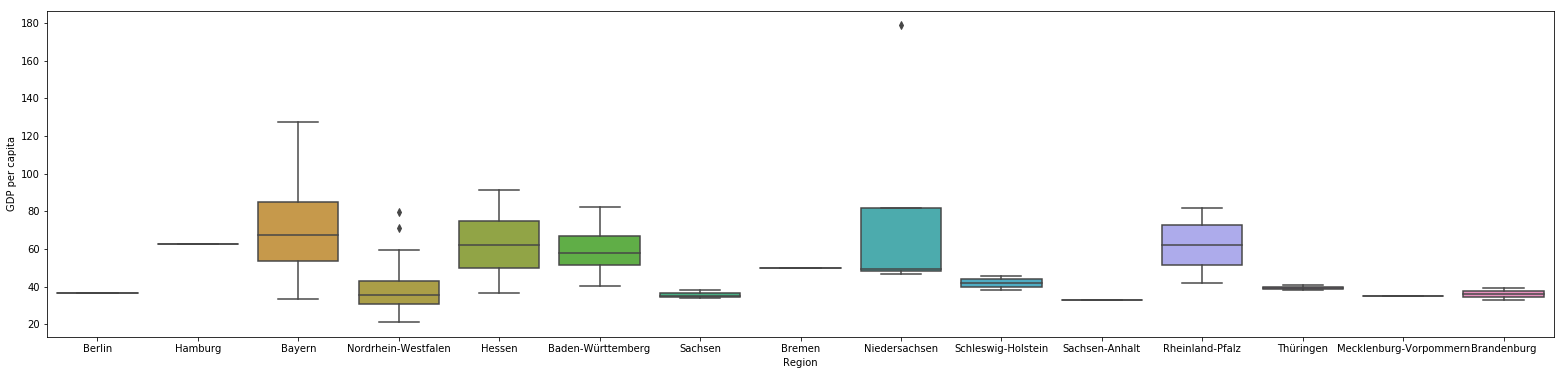

In [22]:
df_all_2 = df_all[['GDP per capita','Region']]

x = 'Region'
y = 'GDP per capita'

plt.figure(figsize=(27,6))
ax= sns.boxplot(x=x,y=y ,data= df_all_2)
plt.show()

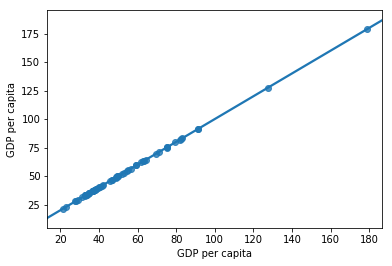

In [23]:
df_all_3 = df_all[['GDP per capita']]
sns.regplot(x="GDP per capita", y="GDP per capita", data=df_all_3)

In [24]:
df_all.head(1)

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,GDP in MIO,GDP per capita,Avearage GDP per capita (Region),Latitude,Longitude
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798,40.568,52.517037,13.38886


In [25]:
map_germany = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, label in zip(df_all['Latitude'], df_all['Longitude'], df_all['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_germany)   
    
map_germany

In [26]:
df_all.head(1) 

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,GDP in MIO,GDP per capita,Avearage GDP per capita (Region),Latitude,Longitude
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798,40.568,52.517037,13.38886


In [27]:
limit = 100
df_incidents = df_all.iloc[0:limit, :]
df_incidents.shape
latitude = 52.51
longitude = 13.38

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=5)
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Latitude, df_incidents.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)


In [28]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Latitude, df_incidents.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Latitude)
longitudes = list(df_incidents.Longitude)
labels = list(df_incidents.City)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [29]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Latitude, df_incidents.Longitude, df_incidents.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [30]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Latitude, df_incidents.Longitude, df_incidents.City):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [31]:
df_all.dtypes

City                                  object
Inhabitants_2018                      object
Area km²(2016)                        object
Inahb./km²(2018)                      object
Region                                object
GDP in MIO                           float64
GDP per capita                       float64
 Avearage GDP per capita (Region)    float64
Latitude                             float64
Longitude                            float64
dtype: object

Start Foursquare

In [32]:
CLIENT_ID = 'J422IGTTMTRBDOW01Q20CKM1Y3Q1YFKJQMTDDDDDQGJYCVFN' # your Foursquare ID
CLIENT_SECRET = 'NQ45HHOHM3IXOPCSAX3UOAIB3WELE141EHEDHBKWQGYYF3UX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J422IGTTMTRBDOW01Q20CKM1Y3Q1YFKJQMTDDDDDQGJYCVFN
CLIENT_SECRET:NQ45HHOHM3IXOPCSAX3UOAIB3WELE141EHEDHBKWQGYYF3UX


In [41]:
df_all.head(1)

,City,Inhabitants_2018,Area km²(2016),Inahb./km²(2018),Region,GDP in MIO,GDP per capita,Avearage GDP per capita (Region),Latitude,Longitude
0,Berlin,3.644.826,89168,4.088,Berlin,130.537,36.798,40.568,52.517037,13.38886


In [33]:
address = 'Mannheim'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.489591 8.467236


In [34]:
#search query 
search_query = 'Sushi-Bar'
radius = 2500

In [35]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=J422IGTTMTRBDOW01Q20CKM1Y3Q1YFKJQMTDDDDDQGJYCVFN&client_secret=NQ45HHOHM3IXOPCSAX3UOAIB3WELE141EHEDHBKWQGYYF3UX&ll=49.489591,8.467236&v=20180604&query=Sushi-Bar&radius=2500&limit=200'

In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dcefb6092393500220e1b6b'},
 'response': {'venues': [{'id': '4ca31b7a554b236a0e7f2348',
    'name': 'Ajino Sushi-Bar',
    'location': {'address': 'O7, 27',
     'lat': 49.48469126184201,
     'lng': 8.471310896659045,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.48469126184201,
       'lng': 8.471310896659045}],
     'distance': 619,
     'postalCode': '68161',
     'cc': 'DE',
     'city': 'Mannheim',
     'state': 'Baden-Württemberg',
     'country': 'Deutschland',
     'formattedAddress': ['O7, 27', '68161 Mannheim', 'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d1d2941735',
      'name': 'Sushi Restaurant',
      'pluralName': 'Sushi Restaurants',
      'shortName': 'Sushi',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1573845892',
    'hasPerk': False},
   {'id': '4bab43d6f964a5206f9c3ae3',
    'name': 'Tokyo S

In [37]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)


In [38]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered = dataframe_filtered[['name','categories','address','city','distance', 'lat', 'lng', 'state']]
dataframe_filtered

,name,categories,address,city,distance,lat,lng,state
0,Ajino Sushi-Bar,Sushi Restaurant,"O7, 27",Mannheim,619,49.484691,8.471311,Baden-Württemberg
1,Tokyo Sushi Bar,Sushi Restaurant,"Q4, 12-16",Mannheim,318,49.487580,8.470372,Baden-Württemberg
2,Kyoto Sushi Bar,Sushi Restaurant,"P4, 4-6",Mannheim,297,49.487345,8.469453,Baden-Württemberg
3,Fuji Sushi-Bar,Sushi Restaurant,"R3, 1",Mannheim,181,49.488556,8.469169,Baden-Württemberg
4,Takeshi Sushibar,None,Moltkestr. 3,Mannheim,906,49.482597,8.473649,Baden-Württemberg
5,Sushi Huang,Sushi Restaurant,"Q2, 17",Mannheim,207,49.487841,8.468226,Baden-Württemberg
6,Dolceamaro Caffé & Bar,Café,Friedrichsplatz 13,Mannheim,1000,49.483850,8.477874,Baden-Württemberg
7,Sushi Circle,Sushi Restaurant,"Q7, 16",Mannheim,741,49.485525,8.475357,Baden-Württemberg
8,Speicher 7 Harbour Hotel & Bar,Hotel,Rheinvorlandstr. 7,Mannheim,1073,49.484902,8.454260,Baden-Württemberg
9,Dejavu Lounge Nargile Bar,Hookah Bar,NaN,Mannheim,179,49.490519,8.469263,Baden-Württemberg


In [39]:
#search query 
search_query = 'Club'
radius = 2500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1 = dataframe_filtered1[['name','categories','address','city','distance', 'lat', 'lng', 'state']]

In [83]:
foursqare_data =    pd.concat([dataframe_filtered,dataframe_filtered1],ignore_index=True)
foursqare_data.drop(foursqare_data.index, inplace=True)
foursqare_data.head()

,name,categories,address,city,distance,lat,lng,state


In [84]:
CLIENT_ID = 'J422IGTTMTRBDOW01Q20CKM1Y3Q1YFKJQMTDDDDDQGJYCVFN' # your Foursquare ID
CLIENT_SECRET = 'NQ45HHOHM3IXOPCSAX3UOAIB3WELE141EHEDHBKWQGYYF3UX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 400
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J422IGTTMTRBDOW01Q20CKM1Y3Q1YFKJQMTDDDDDQGJYCVFN
CLIENT_SECRET:NQ45HHOHM3IXOPCSAX3UOAIB3WELE141EHEDHBKWQGYYF3UX


In [85]:
i = 0
while i < len(df_all.index):
    address = df_all['City'][i]
    print(address)
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = 'Café'
    radius = 500
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    dataframe_filtered = dataframe_filtered[['name','categories','address','city','distance', 'lat', 'lng', 'state']]
    foursqare_data = pd.concat([foursqare_data,dataframe_filtered],ignore_index=True)
    print(foursqare_data.shape)
    i = i+1
    print(i)
    time.sleep(1)

Berlin
(38, 8)
1
Hamburg
(67, 8)
2
München
(117, 8)
3
Nürnberg
(159, 8)
4
Augsburg
(190, 8)
5
Regensburg
(227, 8)
6
Ingolstadt
(253, 8)
7
Würzburg
(284, 8)
8
Fürth
(292, 8)
9
Erlangen
(314, 8)
10
Köln
(343, 8)
11
Düsseldorf
(379, 8)
12
Dortmund
(409, 8)
13
Essen
(433, 8)
14
Duisburg
(450, 8)
15
Bochum
(474, 8)
16
Wuppertal
(475, 8)
17
Bielefeld
(497, 8)
18
Bonn
(533, 8)
19
Münster
(536, 8)
20
Gelsenkirchen
(544, 8)
21
Krefeld
(561, 8)
22
Oberhausen


KeyError: "['state', 'city', 'address'] not in index"

In [86]:
foursqare_data

,name,categories,address,city,distance,lat,lng,state
0,Café Einstein,Café,Unter den Linden 42,Berlin,206,52.516953,13.385810,Berlin
1,Café Ursprung,Café,Friedrichstr. 90,Berlin,145,52.518289,13.389474,Berlin
2,ZDF Cafe,Café,Unter der Linden 36,Berlin,132,52.517327,13.386961,Berlin
3,Café Leon,Café,S-Bahnbogen 202,Berlin,323,52.519938,13.389139,Berlin
4,Atrium Café at Sofitel Berlin Gendarmenmarkt,None,Charlottenstrasse 50-52,Berlin,233,52.515333,13.390862,Berlin
5,Café Konzerthaus,Café,Gendarmenmarkt 2,Berlin,406,52.513877,13.391862,Berlin
6,Café Madrid Restaurant,Breakfast Spot,Friedrichstr. 103,Berlin,517,52.521643,13.387862,Berlin
7,Café Lebensart,Café,Unter den Linden 69 a+b,Berlin,459,52.516445,13.382150,Berlin
8,Galerie im Café Einstein,Art Gallery,Unter den Linden 42,Berlin,13,52.517146,13.388938,Berlin
9,Café Chagall,Café,Georgenstr. 185,Berlin,445,52.520222,13.392844,Berlin


In [93]:
i = 56
while i < len(df_all.index):
    address = df_all['City'][i]
    print(address)
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    search_query = 'Café'
    radius = 500
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    dataframe_filtered = dataframe_filtered[['name','categories','address','city','distance', 'lat', 'lng', 'state']]
    foursqare_data = pd.concat([foursqare_data,dataframe_filtered],ignore_index=True)
    print(foursqare_data.shape)
    i = i+1
    print(i)
    time.sleep(1)

Koblenz
(1180, 8)
57
Trier
(1198, 8)
58
Erfurt
(1235, 8)
59
Jena
(1255, 8)
60
Rostock
(1258, 8)
61
Potsdam
(1274, 8)
62
Cottbus
(1283, 8)
63


In [95]:
sanfran_map_1 = folium.Map(location = [latitude, longitude], zoom_start = 5)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map_1)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(foursqare_data.lat, foursqare_data.lng, foursqare_data.categories):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map_1